In [17]:
# !pip install yfinance
# import yfinance as yf

In [18]:
# import requests
# import pandas as pd
# import yfinance as yf
# from bs4 import BeautifulSoup
# from datetime import datetime

# # Step 1: Scrape the Current S&P 500 Component Stocks Table
# def get_current_sp500_tickers():
#     # Wikipedia URL for S&P 500 components
#     url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, "html.parser")

#     # Find the table with S&P 500 current components
#     table = soup.find("table", {"id": "constituents"})

#     # Extract the data into a DataFrame
#     tickers = []
#     rows = table.find_all("tr")[1:]  # Skip header row
#     for row in rows:
#         cols = row.find_all("td")
#         ticker = cols[0].text.strip()
#         ticker = ticker.replace(".", "-")  # Yahoo Finance uses '-' instead of '.' for tickers like BRK.B
#         company = cols[1].text.strip()
#         gics_sector = cols[3].text.strip()
#         date_added = cols[5].text.strip()
#         tickers.append({
#             "Ticker": ticker,
#             "Company": company,
#             "GICS Sector": gics_sector,
#             "Date Added": date_added,
#         })

#     df_tickers = pd.DataFrame(tickers)
#     return df_tickers

# # Step 2: Download Historical Data for Tickers in the Formation Period
# def fetch_historical_data(tickers, start_date, end_date):
#     price_data = {}
#     for ticker in tickers:
#         try:
#             stock = yf.Ticker(ticker)
#             hist = stock.history(start=start_date, end=end_date)
#             if not hist.empty:
#                 price_data[ticker] = hist['Close']
#         except Exception as e:
#             print(f"Error processing {ticker}: {e}")

#     price_df = pd.DataFrame(price_data)

#     #missing
#     minimum_required_data_points = 0.8 * len(price_df)  # 80% availability required
#     valid_price_df = price_df.dropna(axis=1, thresh=minimum_required_data_points)
#     print(f"Step 3: Price data ready for pairs trading with {valid_price_df.shape[1]} tickers.")

#     # Interpolate missing values
#     price_df = price_df.interpolate(method='linear', limit_direction='forward')

#     return price_df

# # Step 3: Main Function to Prepare Data for Pairs Trading
# def prepare_pairs_trading_data(start_date, end_date):
#     print("Step 1: Scraping current S&P 500 components from Wikipedia...")
#     current_tickers_df = get_current_sp500_tickers()

#     print(f"Step 2: Fetching historical price data for {len(current_tickers_df)} tickers...")
#     valid_tickers = current_tickers_df['Ticker'].tolist()

#     # Fetch price data for the valid tickers
#     price_df = fetch_historical_data(valid_tickers, start_date, end_date)

#     return price_df

# # Set the parameters for the period of interest
# start_date = '2000-01-01'
# end_date = datetime.today().strftime('%Y-%m-%d')

# # Prepare the data for pairs trading formation period
# price_data_for_pairs_trading = prepare_pairs_trading_data(start_date, end_date)

# # Save data to CSV for analysis
# price_data_for_pairs_trading.to_csv("pairs_trading_price_data.csv")
# print("Price data saved to 'pairs_trading_price_data.csv'")

In [19]:
import pandas as pd

price_df = pd.read_csv('pairs_trading_price_data.csv', index_col='Date', parse_dates=True)
price_df.index = pd.to_datetime(price_df.index, utc=True)
print("shape:", price_df.shape)
print(price_df.head())
# df.reindex()

# explore missing values
missing_values = price_df.isnull().sum() / price_df.shape[0]
missing_columns = missing_values[missing_values > 0]  # Filter for columns with missing values

print(missing_columns) #i think it means the nan values are from before the stock became tradeable

shape: (6273, 503)
                                 MMM       AOS       ABT  ABBV  ACN  \
Date                                                                  
2000-01-03 05:00:00+00:00  19.709011  2.311836  8.288181   NaN  NaN   
2000-01-04 05:00:00+00:00  18.925884  2.278525  8.051376   NaN  NaN   
2000-01-05 05:00:00+00:00  19.474079  2.271863  8.036578   NaN  NaN   
2000-01-06 05:00:00+00:00  21.040354  2.238552  8.317781   NaN  NaN   
2000-01-07 05:00:00+00:00  21.458031  2.331823  8.406583   NaN  NaN   

                                ADBE     AMD        AES       AFL          A  \
Date                                                                           
2000-01-03 05:00:00+00:00  16.274673  15.500  24.847673  6.814988  43.463024   
2000-01-04 05:00:00+00:00  14.909400  14.625  23.862337  6.634147  40.142937   
2000-01-05 05:00:00+00:00  15.204175  15.000  24.119377  6.596074  37.652863   
2000-01-06 05:00:00+00:00  15.328290  16.000  24.312166  6.729324  36.219196   
200

In [20]:
import pandas as pd
import numpy as np

def calculate_returns(price_df, return_type="simple"):
    """
    Calculate returns DataFrame (simple or log returns) from a price DataFrame.

    Parameters:
        price_df (pd.DataFrame): DataFrame with stock prices (columns as assets).
        return_type (str): Type of returns to calculate ("simple" or "log").

    Returns:
        pd.DataFrame: DataFrame containing the calculated returns.
    """
    if return_type == "simple":
        # Calculate simple returns
        returns_df = price_df.pct_change()
    elif return_type == "log":
        # Calculate log returns
        returns_df = np.log(price_df / price_df.shift(1))
    else:
        raise ValueError("Invalid return_type. Choose 'simple' or 'log'.")

    return returns_df

log_returns = calculate_returns(price_df, return_type="log")
log_prices = np.log(price_df)
print("log returns:\n", log_returns.head())

log returns:
                                 MMM       AOS       ABT  ABBV  ACN      ADBE  \
Date                                                                           
2000-01-03 05:00:00+00:00       NaN       NaN       NaN   NaN  NaN       NaN   
2000-01-04 05:00:00+00:00 -0.040545 -0.014514 -0.028988   NaN  NaN -0.087618   
2000-01-05 05:00:00+00:00  0.028554 -0.002928 -0.001840   NaN  NaN  0.019578   
2000-01-06 05:00:00+00:00  0.077358 -0.014771  0.034392   NaN  NaN  0.008130   
2000-01-07 05:00:00+00:00  0.019657  0.040821  0.010620   NaN  NaN  0.047440   

                                AMD       AES       AFL         A  ...  \
Date                                                               ...   
2000-01-03 05:00:00+00:00       NaN       NaN       NaN       NaN  ...   
2000-01-04 05:00:00+00:00 -0.058108 -0.040463 -0.026894 -0.079464  ...   
2000-01-05 05:00:00+00:00  0.025318  0.010714 -0.005755 -0.064038  ...   
2000-01-06 05:00:00+00:00  0.064539  0.007961  0.020000

### Correlation Analysis to Select Pairs

In [21]:
import pandas as pd
import numpy as np

def calculate_correlation_matrix(df, start_date, num_days, min_valid_ratio=0.8):
    """
    Calculate correlation matrix for DataFrame columns with >80% non-NaN values,
    filling zeros where criteria are not met. This is to account for how stocks
    become tradeable at different dates

    Parameters:
        df (pd.DataFrame): DataFrame with data.
        start_date (str or pd.Timestamp): Start date for analysis.
        num_days (int): Number of days to consider after the start_date.
        min_valid_ratio (float): Minimum valid data ratio required (default=0.8).

    Returns:
        pd.DataFrame: Correlation matrix with zeros where conditions aren't met.
    """
    # Ensure datetime conversion
    start_date = pd.to_datetime(start_date, utc=True)
    end_date = start_date + pd.Timedelta(days=num_days - 1)

    # Filter the relevant date range
    filtered_data = df.loc[start_date:end_date]

    # Find the first valid index for each column
    first_valid_indices = filtered_data.dropna(how='all').index

    if first_valid_indices.empty:
        print("No valid data found for the specified date range.")
        return pd.DataFrame(0, index=df.columns, columns=df.columns)

    # Start from the first row where at least one column has data
    first_valid_index = first_valid_indices[0]

    # Filter from the first valid index onward
    valid_data = filtered_data.loc[first_valid_index:]

    # Check non-NaN ratios for each column
    valid_ratios = valid_data.notna().mean()

    # Keep only columns with >=80% valid data
    valid_columns = valid_ratios[valid_ratios >= min_valid_ratio].index.tolist()

    if len(valid_columns) < 2:
        print("Not enough columns with valid data for correlation calculation.")
        # Return a zero matrix
        return pd.DataFrame(0.0, index=df.columns, columns=df.columns)

    # Calculate the correlation matrix
    correlation_matrix = valid_data[valid_columns].corr()

    # Fill missing columns with zero rows and columns
    complete_corr_matrix = pd.DataFrame(
        0.0, index=df.columns, columns=df.columns
    )
    complete_corr_matrix.loc[valid_columns, valid_columns] = correlation_matrix
    return complete_corr_matrix
#calculate_correlation_matrix(df, '2000-01-01', 365)

correlation_pairs shape: (126253, 3)
most highly correlated pair:
 Variable 1          AVB
Variable 2          BXP
Correlation    0.992443
Name: 24803, dtype: object
      Variable 1 Variable 2  Correlation
53781         ED         SO     0.818579
top pairs shape: (282, 3)


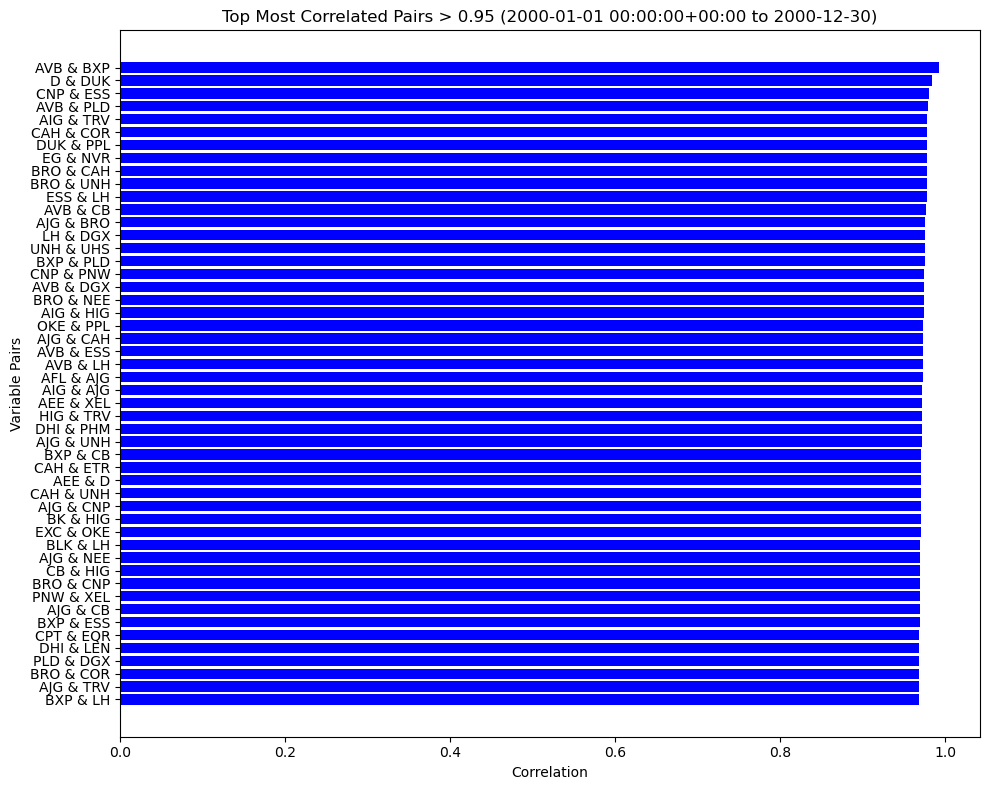

In [22]:
from itertools import combinations
import matplotlib.pyplot as plt

def calculate_corr(data, start_date, num_days=365):
    """
    Calculate correlations over a specified period and plot the top 50 correlated pairs.

    Parameters:
        data (pd.DataFrame): DataFrame of stock prices or returns with columns as assets and index as dates.
        start_date (str): Start date for the period (format: 'YYYY-MM-DD').
        num_days (int): Number of days to consider starting from the start_date.

    Returns:
        pd.DataFrame: DataFrame containing the top 50 correlated pairs.
    """
    # Filter data for the specified period
    end_date = pd.to_datetime(start_date, utc=True) + pd.Timedelta(days=num_days - 1)
    filtered_data = data.loc[start_date:end_date]

    # Check if the filtered_data has sufficient data
    if filtered_data.empty:
        raise ValueError(f"No data available for the specified period: {start_date} to {end_date}")

    # Calculate the correlation matrix
    correlation_matrix = calculate_correlation_matrix(data, start_date, num_days)

    # Extract the upper triangle of the correlation matrix, excluding the diagonal
    correlation_pairs = (
        correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
    print("correlation_pairs shape:", correlation_pairs.shape)
    # print(np.argmax(correlation_pairs['Correlation']))
    print("most highly correlated pair:\n", correlation_pairs.loc[np.argmax(correlation_pairs['Correlation'])])

    # check what ED and SO correlation is -- sanity check since this was top 1 pair in the paper for 2000
    result = correlation_pairs[
        (correlation_pairs['Variable 1'] == "ED") &
        (correlation_pairs['Variable 2'] == "SO")
    ]
    print(result)

    # Sort by absolute value of correlation in descending order
    # Filter for correlations > 0.9
    high_corr_pairs = correlation_pairs[correlation_pairs['Correlation'] > 0.95]

    # Sort by correlation in descending order
    top_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)
    print("top pairs shape:", top_pairs.shape)

    # Plot the top pairs
    top_50_pairs = top_pairs.head(50)
    plt.figure(figsize=(10, 8))
    plt.barh(
        top_50_pairs.apply(lambda x: f"{x['Variable 1']} & {x['Variable 2']}", axis=1),
        top_50_pairs['Correlation'],
        color=np.where(top_50_pairs['Correlation'] > 0, 'blue', 'red'),
    )
    plt.xlabel("Correlation")
    plt.ylabel("Variable Pairs")
    plt.title(f"Top Most Correlated Pairs > 0.95 ({start_date} to {end_date.strftime('%Y-%m-%d')})")
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest correlation at the top
    plt.tight_layout()
    plt.show()

    # # Sort by correlation in descending order
    # sorted_pairs = correlation_pairs.sort_values(by='Correlation', ascending=False)
    # print("sorted_pairs shape:", sorted_pairs.shape)

    # # Extract the top 25 pairs
    # top_pairs = sorted_pairs.head(500)

    # # Plot the top 25 pairs
    # plt.figure(figsize=(10, 8))
    # plt.barh(
    #     top_pairs.apply(lambda x: f"{x['Variable 1']} & {x['Variable 2']}", axis=1),
    #     top_pairs['Correlation'],
    #     color='blue',
    # )
    # plt.xlabel("Correlation")
    # plt.ylabel("Variable Pairs")
    # plt.title(f"Top 25 Most Correlated Pairs ({start_date} to {end_date.strftime('%Y-%m-%d')})")
    # plt.gca().invert_yaxis()  # Invert y-axis to display the highest correlation at the top
    # plt.tight_layout()
    # plt.show()

    return top_pairs

top_pairs_in_2000 = calculate_corr(log_prices, pd.Timestamp("2000-01-01", tz="UTC"))

### Cointegration Analysis to Select Pairs

In [23]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

# Define a function to perform cointegration analysis
def cointegration_analysis(data, top_pairs, start_date, num_days=365):
  # the input data to this function should be filtered for correlation already

    start_date = pd.to_datetime(start_date, utc=True)
    end_date = start_date + pd.Timedelta(days=num_days - 1)
    filtered_data = data.loc[start_date:end_date]
    cointegration_results = []

    for _, row in top_pairs.iterrows():
        asset1, asset2 = row['Variable 1'], row['Variable 2']

        # Find first valid index where both assets are non-NaN
        valid_data = filtered_data[[asset1, asset2]].dropna()
        # Perform cointegration test
        result = coint(valid_data[asset1], valid_data[asset2])
        p_value = result[1]
        score = result[0]
        crit = result[2]
        spread = valid_data[asset1] - valid_data[asset2]

        if p_value < 0.05:  # Check for p-value significance
          cointegration_results.append({
              'Asset 1': asset1,
              'Asset 2': asset2,
              'T Statistic': score,
              'P-Value': p_value,
              'Volatility': spread.std()
        })

    # Convert to DataFrame
    coint_df = pd.DataFrame(cointegration_results)

    # Sort by trace statistic and keep the top 20 pairs
    coint_df.sort_values(by='T Statistic', ascending=True, inplace=True)
    top_coint_pairs = coint_df.head(20)

    coint_df.sort_values(by='Volatility', ascending=False, inplace=True)
    top_volatile_pairs = coint_df.head(20)
    return top_coint_pairs, top_volatile_pairs

In [24]:
cointegrated_pairs, top_volatile_pairs = cointegration_analysis(log_prices, top_pairs_in_2000, start_date="2000-01-01")

In [25]:
# plot spread
def plot_coint_spreads(data, cointegrated_pairs, start_date, num_days=365*2):
    if data.index.tz is None:
        data.index = data.index.tz_localize('UTC')
    start_date = pd.to_datetime(start_date, utc=True)
    end_date = start_date + pd.Timedelta(days=num_days - 1)
    filtered_data = data.loc[start_date:end_date]

    plt.figure(figsize=(12, 6))
    for _, row in cointegrated_pairs.iterrows():
        asset1, asset2 = row['Asset 1'], row['Asset 2']
        # Calculate the spread
        spread = filtered_data[asset1] - filtered_data[asset2]
        normalized_spread = (spread - spread.mean()) / spread.std()
        plt.plot(filtered_data.index, normalized_spread, label=f"{asset1} - {asset2}")

    plt.title('Normalized Spread between Cointegrated Pairs')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [26]:
len(top_pairs_in_2000)

282

In [27]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def filter_stationary_pairs(data, top_pairs, start_date, num_days=365, significance_level=0.05):
    """
    Filter top pairs to ensure their spreads are stationary using the ADF test.

    Parameters:
        data (pd.DataFrame): DataFrame of stock prices.
        top_pairs (pd.DataFrame): DataFrame containing stock pairs with 'Stock 1' and 'Stock 2' columns.
        significance_level (float): The threshold p-value for stationarity (default=0.05).

    Returns:
        pd.DataFrame: DataFrame of stationary pairs with ADF test results.
    """
    stationary_results = []
    start_date = pd.to_datetime(start_date, utc=True)
    end_date = start_date + pd.Timedelta(days=num_days - 1)
    filtered_data = data.loc[start_date:end_date]
    for _, row in top_pairs.iterrows():
        stock1, stock2 = row['Variable 1'], row['Variable 2']

        # Calculate the spread
        spread = filtered_data[stock1] - filtered_data[stock2]
        spread = spread.dropna()  # Remove NaN values

        # Perform the ADF test
        adf_result = adfuller(spread)
        adf_stat = adf_result[0]  # Test statistic
        p_value = adf_result[1]   # p-value

        # Check if the spread is stationary
        if p_value < significance_level:
            stationary_results.append({
                'Variable 1': stock1,
                'Variable 2': stock2,
                'ADF Statistic': adf_stat,
                'P-Value': p_value
            })

    # Convert results to DataFrame
    stationary_df = pd.DataFrame(stationary_results)

    if stationary_df.empty:
        print("No stationary pairs found.")
        return pd.DataFrame(columns=['Variable 1', 'Variable 2', 'ADF Statistic', 'P-Value'])

    return stationary_df

top_stationary_in_2000 = filter_stationary_pairs(log_prices, top_pairs_in_2000, "2000-01-01")

In [28]:
print(top_stationary_in_2000.shape)
print(top_stationary_in_2000)

(88, 4)
   Variable 1 Variable 2  ADF Statistic   P-Value
0         AVB        BXP      -5.084618  0.000015
1          EG        NVR      -4.247239  0.000548
2         BRO        CAH      -3.537617  0.007072
3         BRO        UNH      -4.268726  0.000503
4          LH        DGX      -2.896230  0.045788
..        ...        ...            ...       ...
83        AEE          J      -3.798799  0.002920
84        AJG        ETR      -3.027259  0.032426
85        AEE        BAX      -4.088166  0.001013
86        BAX        XEL      -4.166768  0.000750
87        AIG         GD      -3.696674  0.004160

[88 rows x 4 columns]


In [29]:
print(cointegrated_pairs.shape)
print(cointegrated_pairs)
print(top_volatile_pairs)

(20, 5)
    Asset 1 Asset 2  T Statistic   P-Value  Volatility
30      BXP     DGX    -5.849283  0.000003    0.369416
66       BK      CB    -5.740298  0.000006    0.172380
22       BK     HIG    -5.705842  0.000007    0.118364
119      CB     PEP    -5.335103  0.000038    0.200422
62      ETR       J    -5.212853  0.000066    0.120781
0       AVB     BXP    -5.159991  0.000083    0.017570
61        J     PNC    -5.152038  0.000086    0.070560
6       BRO     UNH    -5.007970  0.000159    0.065096
23      EXC     OKE    -4.978855  0.000180    0.062889
115     AIG     FMC    -4.915695  0.000235    0.058394
56      AJG     BAX    -4.906936  0.000243    0.161663
64      BRO     PNC    -4.905872  0.000244    0.073783
124     BAX     TRV    -4.903441  0.000247    0.122381
97       EG       J    -4.898808  0.000252    0.190738
117     PEP     UNH    -4.854323  0.000302    0.148481
155     AVB     PEP    -4.850566  0.000307    0.043122
19      CAH     ETR    -4.838664  0.000322    0.072487
12

In [30]:
##Stationary: no regimes
cointegrated_pairs_stationary, volatile_pairs_stationary = cointegration_analysis(log_prices, top_stationary_in_2000, start_date="2000-01-01")

In [31]:
print(cointegrated_pairs_stationary)
print(volatile_pairs_stationary)

   Asset 1 Asset 2  T Statistic   P-Value  Volatility
0      AVB     BXP    -5.159991  0.000083    0.017570
25       J     PNC    -5.152038  0.000086    0.070560
3      BRO     UNH    -5.007970  0.000159    0.065096
11     EXC     OKE    -4.978855  0.000180    0.062889
44     AIG     FMC    -4.915695  0.000235    0.058394
26     BRO     PNC    -4.905872  0.000244    0.073783
62     AVB     PEP    -4.850566  0.000307    0.043122
8      CAH     ETR    -4.838664  0.000322    0.072487
47     PLD     REG    -4.831946  0.000331    0.026800
13      CB     LMT    -4.804922  0.000370    0.121963
1       EG     NVR    -4.791897  0.000390    0.075560
29     AFL     NEE    -4.769756  0.000427    0.057897
27      BA     WBA    -4.735810  0.000489    0.079985
34     AFL       J    -4.718450  0.000524    0.082364
23     NVR     WRB    -4.597736  0.000842    0.088756
56     AVB     BAX    -4.573915  0.000923    0.049693
5      BRO     NEE    -4.566527  0.000950    0.067470
2      BRO     CAH    -4.458

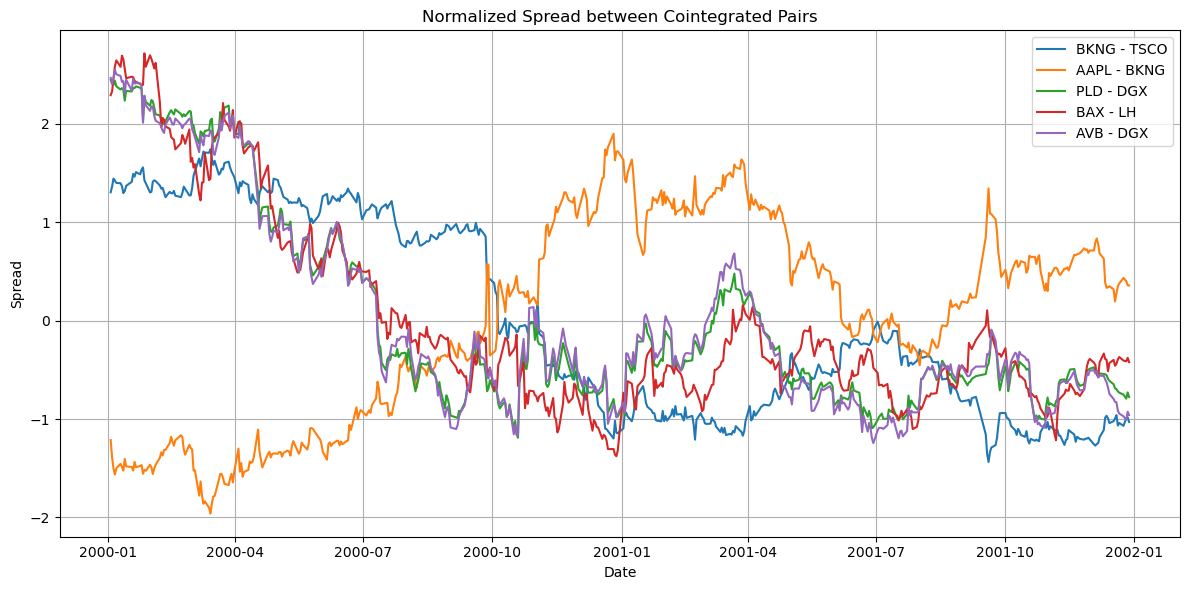

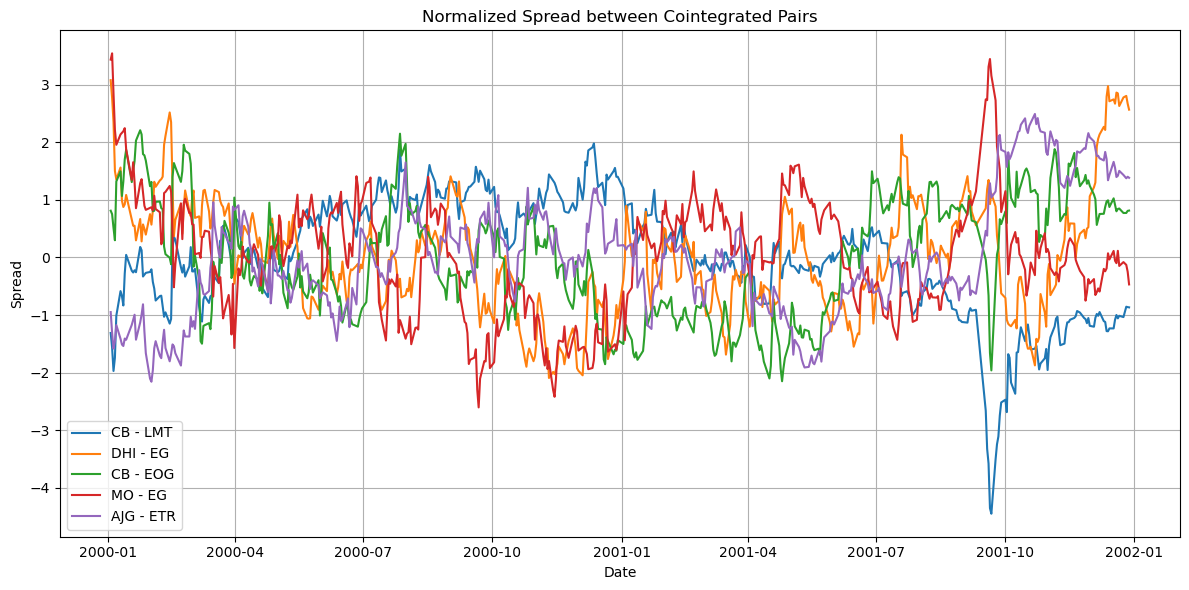

In [32]:
#pairs formed with highest volatility
plot_coint_spreads(log_prices, top_volatile_pairs[:5], start_date="2000-01-01")
plot_coint_spreads(log_prices, volatile_pairs_stationary[:5], start_date="2000-01-01")

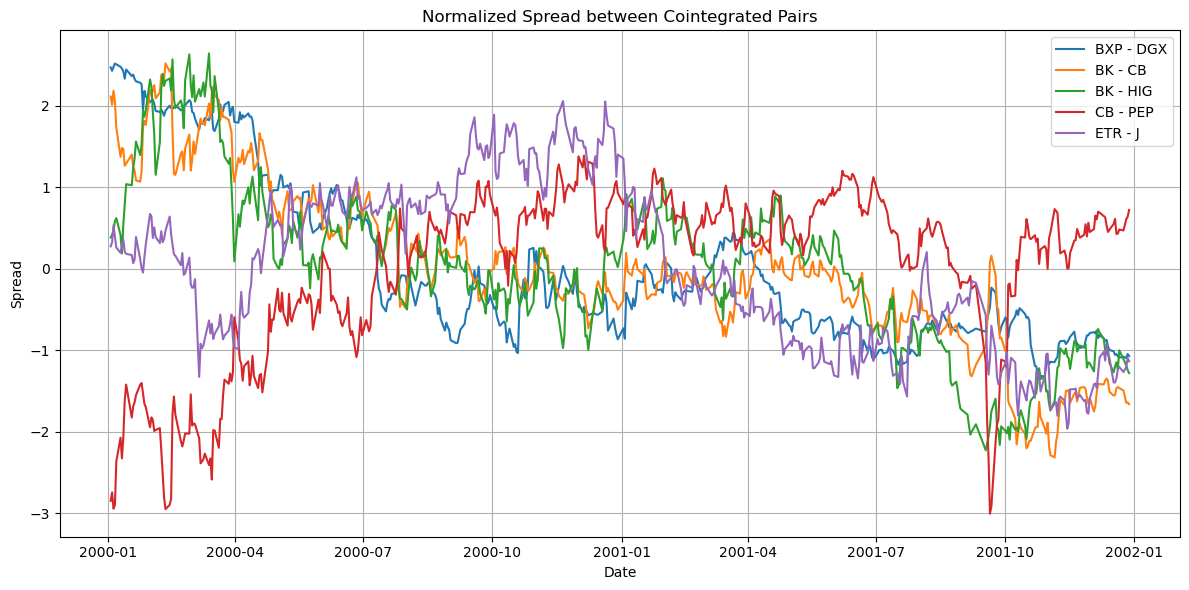

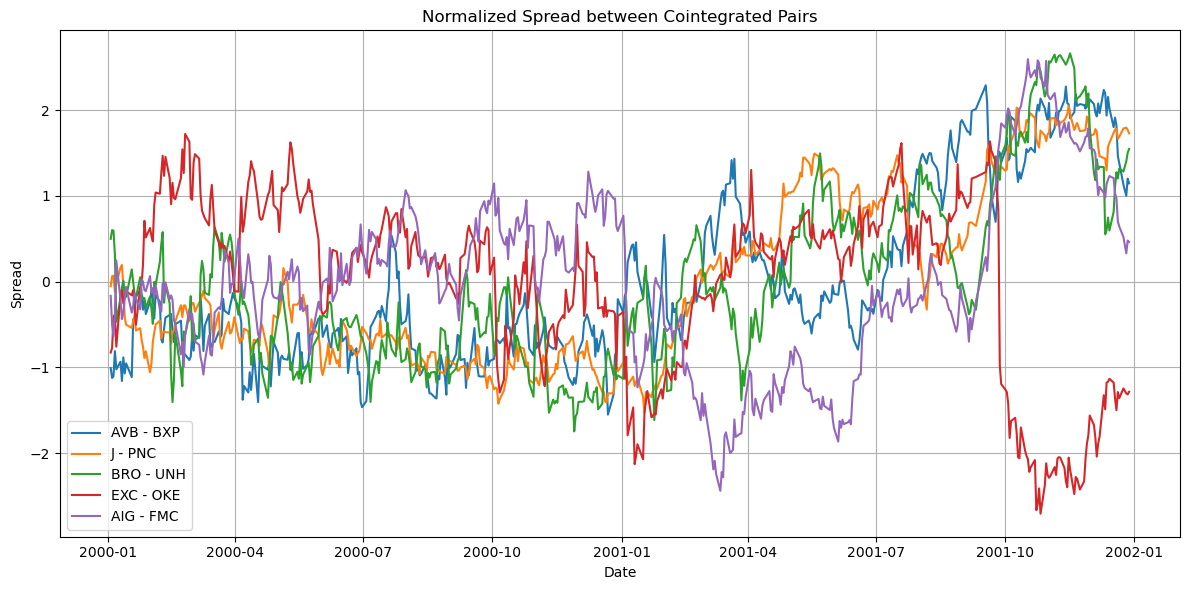

In [33]:
#cointegration pairs formed with lowest t statistic
plot_coint_spreads(log_prices, cointegrated_pairs[:5], start_date="2000-01-01")
plot_coint_spreads(log_prices, cointegrated_pairs_stationary[:5], start_date="2000-01-01")

### SSD Analysis to Select Pairs

In [34]:
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_ssd(data, start_date, num_days=365, top_n=20, min_valid_ratio=0.8):
    """
    Calculate SSD (Sum of Squared Differences) for all stock pairs meeting >80% valid data threshold.
    Start SSD calculation from the first valid index where both stocks are non-NaN.

    Parameters:
        data (pd.DataFrame): DataFrame of stock prices or returns with columns as assets and index as dates.
        start_date (str or pd.Timestamp): Start date for the period (format: 'YYYY-MM-DD').
        num_days (int): Number of days to consider starting from the start_date.
        top_n (int): Number of top pairs to return based on the smallest SSD.
        min_valid_ratio (float): Minimum valid data ratio required (default=0.8).

    Returns:
        pd.DataFrame: DataFrame containing the top N pairs with the smallest SSD.
    """
    # Ensure datetime conversion
    start_date = pd.to_datetime(start_date, utc=True)
    end_date = start_date + pd.Timedelta(days=num_days - 1)

    # Filter the relevant date range
    filtered_data = data.loc[start_date:end_date][1:]
    # print(filtered_data)

    # Check if filtered data is available
    if filtered_data.empty:
        raise ValueError(f"No data available for the specified period: {start_date} to {end_date}")

    # only process stocks that don't have missing values
    cleaned_df = filtered_data.loc[:, ~filtered_data.isna().any()]
    # print(cleaned_df.shape)

    # Step 1: Compute the pairwise differences matrix
    cleaned_data = cleaned_df.values
    n_stocks = cleaned_data.shape[1]

    # Create a 3D array where each slice is the difference between a pair of columns
    diff_matrix = cleaned_data[:, :, None] - cleaned_data[:, None, :]  # Shape: (n_rows, n_stocks, n_stocks)

    # Step 2: Compute SSD matrix
    ssd_matrix = np.nansum(diff_matrix ** 2, axis=0)  # Shape: (n_stocks, n_stocks)

    # Step 3: Extract upper triangle of SSD matrix (to avoid duplicate pairs)
    stock_names = cleaned_df.columns
    i, j = np.triu_indices(n_stocks, k=1)  # Indices for the upper triangle
    ssd_results = pd.DataFrame({
        'Stock 1': stock_names[i],
        'Stock 2': stock_names[j],
        'SSD': ssd_matrix[i, j]
    })

    # Convert results to DataFrame
    ssd_df = pd.DataFrame(ssd_results)

    if ssd_df.empty:
        raise ValueError("No valid pairs found with sufficient data.")

    # Sort by SSD in ascending order and select the top N pairs
    top_pairs = ssd_df.sort_values(by='SSD', ascending=True).head(top_n)

    # Plot the SSD of the top N pairs
#     plt.figure(figsize=(10, 8))
#     plt.barh(
#         top_pairs.apply(lambda x: f"{x['Stock 1']} & {x['Stock 2']}", axis=1),
#         top_pairs['SSD'],
#         color='green'
#     )
#     plt.xlabel("SSD (Sum of Squared Differences)")
#     plt.ylabel("Stock Pairs")
#     plt.title(f"Top {top_n} Pairs with Smallest SSD ({start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')})")
#     plt.gca().invert_yaxis()  # Invert y-axis to display the lowest SSD at the top
#     plt.tight_layout()
#     plt.show()

    return top_pairs

In [35]:
# Normalize prices
# normalized_price = (price_df - price_df.mean()) / price_df.std()
# i dont think this ^ is the right way to normalize -- i changed it to the paper's formula

# Calculate daily returns from prices
returns_df = price_df.pct_change()

# Calculate normalized prices (cumulative product of returns + 1)
normalized_prices = (1 + returns_df).cumprod()
# print(normalized_prices)

# Ensure normalized prices start at 1 for the first available data point
# normalized_prices = normalized_prices * price_df.iloc[0]
# print(normalized_prices)

print("Finished normalizing...")
# print(normalized_prices.head())

Finished normalizing...


In [36]:
top_ssd_2000 = calculate_ssd(normalized_prices, pd.Timestamp("2000-01-01", tz="UTC"))
top_ssd_2010 = calculate_ssd(normalized_prices, pd.Timestamp("2010-01-01", tz="UTC"))
top_ssd_2020 = calculate_ssd(normalized_prices, pd.Timestamp("2020-01-01", tz="UTC"))

In [37]:
print(top_ssd_2000.head())
print(normalized_prices.shape)
print(top_ssd_2000.shape)

      Stock 1 Stock 2       SSD
12730     AVB     BXP  0.202789
19915     CPT     REG  0.272440
19764     CPT     EQR  0.327203
49828     KIM     PLD  0.364820
3877      ARE     CPT  0.433844
(6273, 503)
(20, 3)


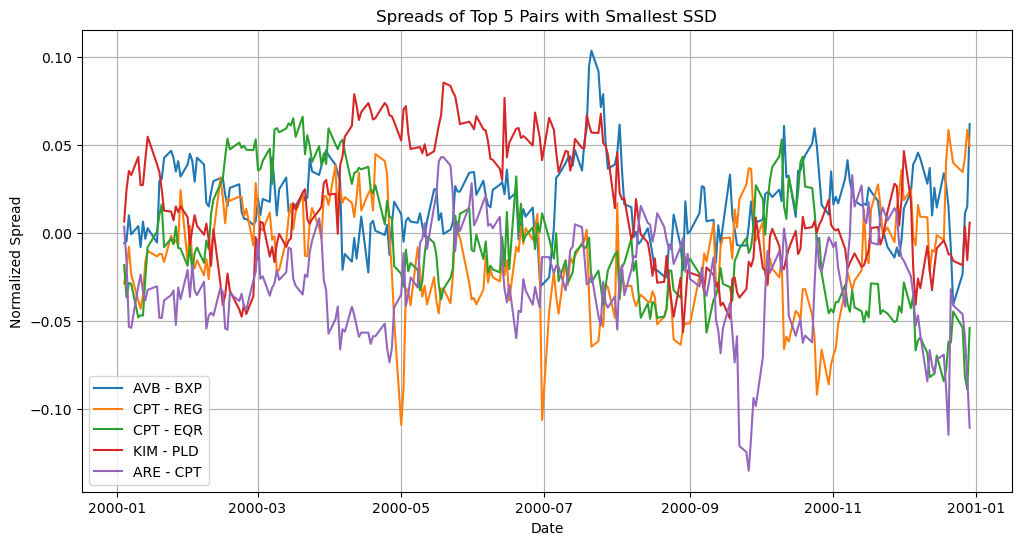

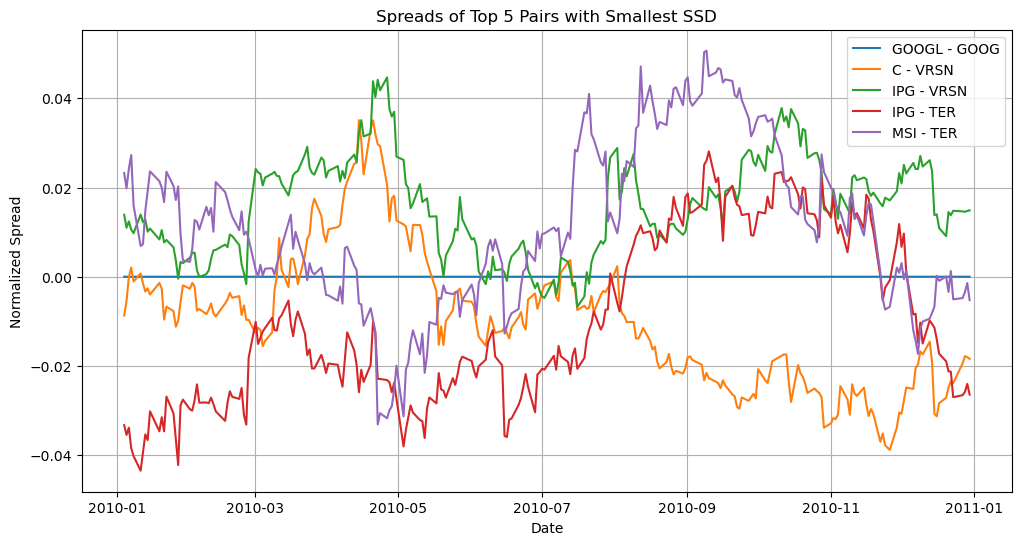

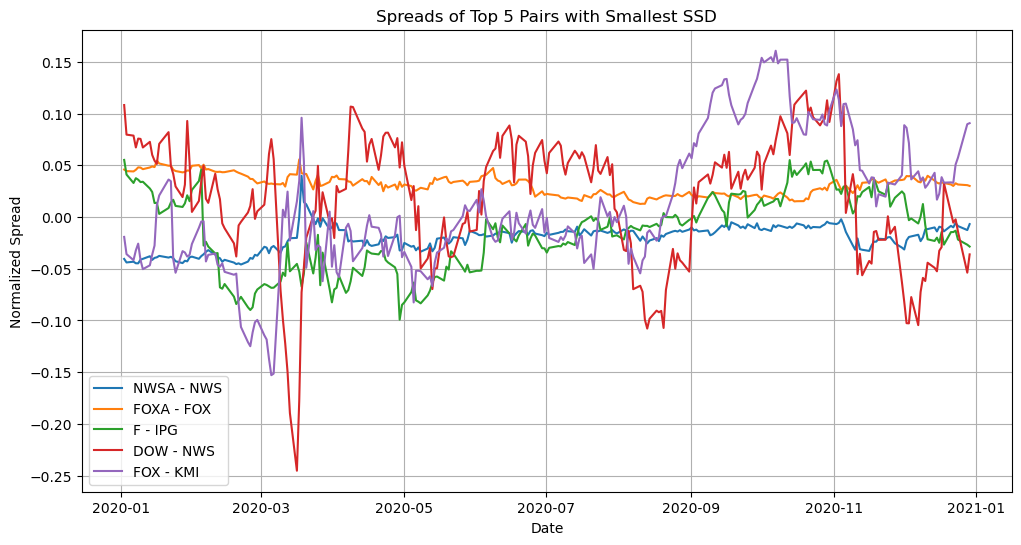

In [38]:
def plot_spreads_from_ssd(normalized_data, top_ssd_pairs, start_date, num_days=365):
    """
    Plot the spreads for the top pairs with smallest SSD.

    Parameters:
        data (pd.DataFrame): DataFrame of stock prices or returns with columns as assets and index as dates.
        top_ssd_pairs (pd.DataFrame): DataFrame containing top SSD pairs ('Stock 1', 'Stock 2').
        start_date (str or pd.Timestamp): Start date for the period (format: 'YYYY-MM-DD').
        num_days (int): Number of days to consider starting from the start_date.
"""
    start_date = pd.to_datetime(start_date, utc=True)
    end_date = start_date + pd.Timedelta(days=num_days - 1)
    filtered_data = normalized_data.loc[start_date:end_date]

    # Plot spreads for the top SSD pairs
    plt.figure(figsize=(12, 6))
    for _, row in top_ssd_pairs.iterrows():
        stock1, stock2 = row['Stock 1'], row['Stock 2']
        spread = filtered_data[stock1] - filtered_data[stock2]
        # spread_normalized = (spread - spread.mean()) / spread.std()
        plt.plot(filtered_data.index, spread, label=f"{stock1} - {stock2}")

    plt.title(f"Spreads of Top 5 Pairs with Smallest SSD")
    plt.xlabel("Date")
    plt.ylabel("Normalized Spread")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_spreads_from_ssd(normalized_prices, top_ssd_2000[0:5], start_date="2000-01-01")
plot_spreads_from_ssd(normalized_prices, top_ssd_2010[0:5], start_date="2010-01-01")
plot_spreads_from_ssd(normalized_prices, top_ssd_2020[0:5], start_date="2020-01-01")

#notice how some companies go public at differing dates

### Gaussian HMM (2-Regime) Fitting

In [39]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from os import statvfs_result
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the HMM modeling function
def model(df, stock_a, stock_b, start_date, num_days=365, states=2):
    """
    Apply Gaussian HMM to model spread between two stocks.

    Parameters:
        df (pd.DataFrame): DataFrame with stock price data.
        stock_a (str): Ticker for the first stock.
        stock_b (str): Ticker for the second stock.
        start_date (str or pd.Timestamp): Start date of analysis.
        num_days (int): Number of days to include in the analysis.

    Returns:
        None: Displays model parameters and plots the spread and hidden states.
    """

    # Ensure the DataFrame index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # Filter data for the specified period
    start_date = pd.to_datetime(start_date, utc=True)
    end_date = start_date + pd.Timedelta(days=num_days - 1)
    filtered_data = df.loc[start_date:end_date]
    filtered_data = filtered_data[[stock_a, stock_b]].dropna()

    # Calculate the spread
    spread = filtered_data[stock_a] - filtered_data[stock_b]
    spread_data = spread.values.reshape(-1, 1)

    # Initialize and fit the Gaussian HMM model
    hmm_model = hmm.GaussianHMM(n_components=states, covariance_type="diag", n_iter=100)
    hmm_model.fit(spread_data)

    # Extract hidden states
    hidden_states = hmm_model.predict(spread_data)

    # Display estimated parameters
    print("Transition Probabilities:\n", hmm_model.transmat_)
    print("Means (Regime Means):\n", hmm_model.means_.flatten())
    print("Covariances (Spread Variances):\n", hmm_model.covars_.flatten())

    # Plot the spread and estimated regimes
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data.index, spread, label="Spread")
    plt.step(filtered_data.index, hidden_states, where='mid', linestyle="--", label="Hidden States")
    plt.title(f"Estimated Regime Switching States for {stock_a} & {stock_b}")
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid(True)
    plt.show()


Transition Probabilities:
 [[9.95038704e-01 1.84646155e-46 4.96129611e-03]
 [2.52347540e-46 9.92397003e-01 7.60299737e-03]
 [2.89741201e-02 5.54764722e-10 9.71025879e-01]]
Means (Regime Means):
 [0.55489264 0.03616578 0.34901059]
Covariances (Spread Variances):
 [0.00627585 0.0112523  0.00545283]


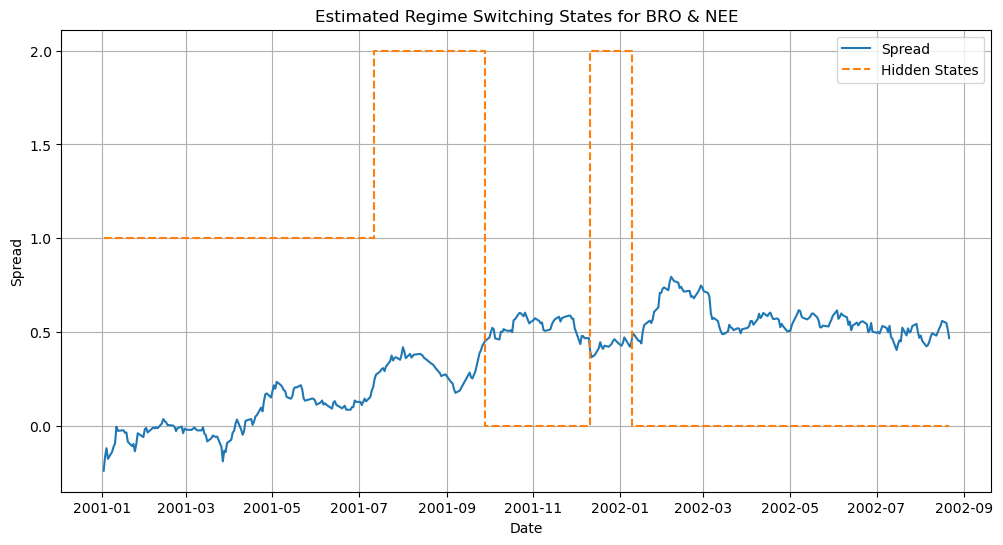

In [41]:
model(log_prices, 'BRO', 'NEE', start_date='2000-12-31', num_days=600, states=3) #ssd


Transition Probabilities:
 [[0.99689688 0.00310312]
 [0.02408533 0.97591467]]
Means (Regime Means):
 [-1.08422316 -0.80758598]
Covariances (Spread Variances):
 [0.00796622 0.00486833]


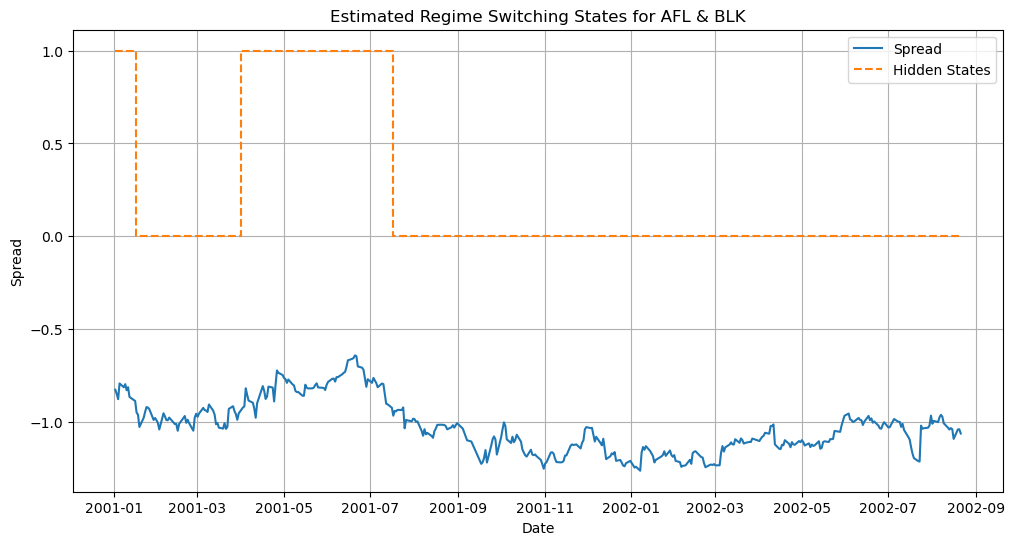

In [42]:
model(log_prices, 'AFL', 'BLK', start_date='2000-12-31', num_days=600) #volatile, stationary

Transition Probabilities:
 [[9.99921917e-01 7.80834941e-05]
 [5.82576034e-03 9.94174240e-01]]
Means (Regime Means):
 [2.39220602 3.450056  ]
Covariances (Spread Variances):
 [0.29563376 0.15425116]


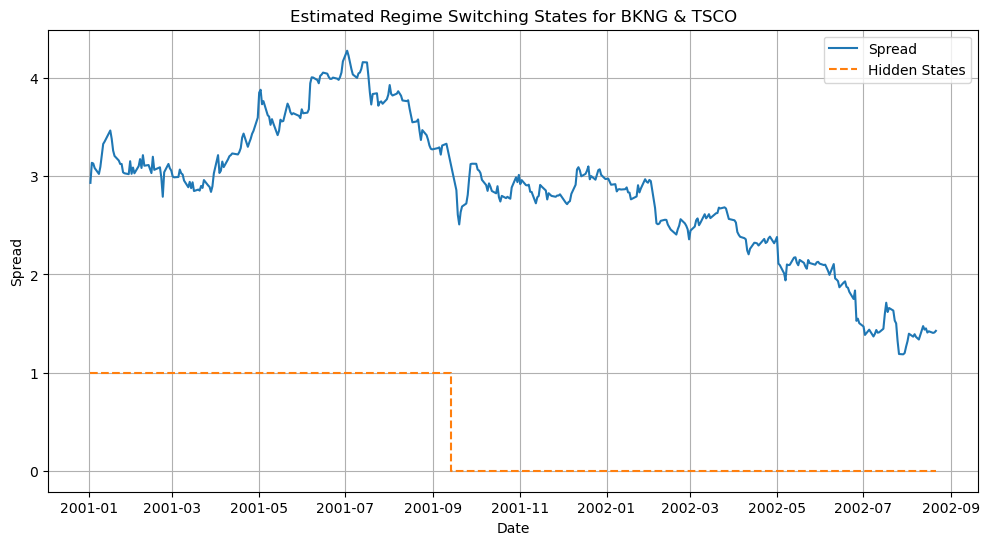

In [43]:
# Example usage
model(log_prices, 'BKNG', 'TSCO', start_date='2000-12-31', num_days=600) #volatile, nonstationary

Transition Probabilities:
 [[0.60786966 0.39213034]
 [0.90424589 0.09575411]]
Means (Regime Means):
 [-1.09438011 -1.09806962]
Covariances (Spread Variances):
 [0.01452313 0.0149531 ]


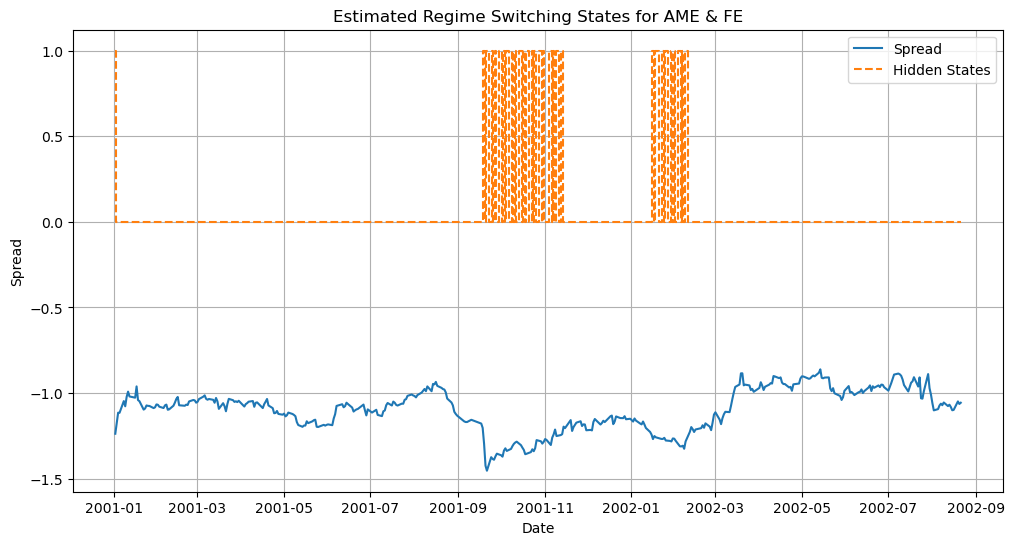

In [44]:
model(log_prices, 'AME', 'FE', start_date='2000-12-31', num_days=600) #low t stat, stationary

In [45]:
#In order to generate proﬁts in a pair-trade, the priceratio between the two stocks needs to have a constantmean and a constant volatility over time.
# => regimes have diff mean and volatility

In [46]:
#https://www.tandfonline.com/doi/full/10.1080/00036846.2014.975417 pairs trading methods
#yang https://www.sciencedirect.com/science/article/pii/S1059056015001860
#correlation matrix
#k means cluster: securites closely related to each other
#SSD as well, try both
#acknowledge that strategy is on some subset of stocks ie
#robustness: pair becomes delisted...?
#regime shift has upper threshold helps
#stat arb very nice >:D
#backtesting brother what
#
#####################################
#good paper i j found: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4128453


In [47]:
df_2000 = price_df.loc[price_df.index.year == 2000]
print(df_2000.shape)

df_2000_jan = price_df.loc[(price_df.index.year == 2000) & (price_df.index.month == 1)]
print(df_2000_jan.shape)

# conclusion: each year has 252 trading days and each month has 20 trading days

(252, 503)
(20, 503)


### Vasicek Spread Model + 2-Regime HMM Model
We tried two variations of this.


The first block of code fits a regime switching MLE at the same time as the Vasicek model. Honestly not super sure how it did it (ChatGPT wrote the code), so we ended up dropping this code since it wasn't fitting correctly.

The second block of code fits an 2-state HMM to the formation period data and then fits Vasicek models after, to each regime. We were able to fit Vasicek models for each regime but the parameters + trading rule resulted in continuous sell signals, and we weren't sure how to fix this. 

In the end, neither of these models ended up working, so we ended up dropping the Vasicek spread fitting and used a simpler distance method trading rule instead.

In [48]:
# # import pandas as pd
# # import numpy as np
# # import matplotlib.pyplot as plt
# # from itertools import combinations
# # from scipy.optimize import minimize
# # from scipy.stats import norm

# # # Step 1: SSD-Based Pair Selection (in method calculate_ssd(data, start_date, num_days=365, top_n=20, min_valid_ratio=0.8))

# # # Step 2: Maximum Likelihood Regime-Switching Model
# # class RegimeSwitchingMLE:
# #     def __init__(self, spread):
# #         self.spread = np.array(spread)
# #         self.n = len(spread)

# #     def likelihood(self, params):
# #         kappa_low, theta_low, sigma_low, kappa_high, theta_high, sigma_high, p_11, p_22 = params
# #         p_12, p_21 = 1 - p_11, 1 - p_22
# #         regime_probs = np.zeros((self.n, 2))
# #         regime_probs[0] = [0.5, 0.5]
# #         log_likelihood = 0

# #         for t in range(1, self.n):
# #             f_low = norm.pdf(
# #                 self.spread[t],
# #                 loc=kappa_low * (theta_low + self.spread[t - 1]),
# #                 scale=sigma_low
# #             )
# #             f_high = norm.pdf(
# #                 self.spread[t],
# #                 loc=kappa_high * (theta_high + self.spread[t - 1]),
# #                 scale=sigma_high
# #             )

# #             p_low = f_low * (p_11 * regime_probs[t - 1, 0] + p_21 * regime_probs[t - 1, 1])
# #             p_high = f_high * (p_12 * regime_probs[t - 1, 0] + p_22 * regime_probs[t - 1, 1])
# #             total_prob = p_low + p_high

# #             regime_probs[t, 0] = p_low / total_prob
# #             regime_probs[t, 1] = p_high / total_prob
# #             log_likelihood += np.log(total_prob)

# #         return -log_likelihood

# #     def fit(self, initial_params):
# #         result = minimize(
# #             self.likelihood,
# #             initial_params,
# #             bounds=[
# #                 (0.01, 1), (-5, 5), (0.01, 5),
# #                 (0.01, 1), (-5, 5), (0.01, 5),
# #                 (0.7, 1), (0.7, 1)
# #             ],
# #             method='L-BFGS-B'
# #         )
# #         params = result.x
# #         self.params = {
# #             "kappa_low": params[0],
# #             "theta_low": params[1],
# #             "sigma_low": params[2],
# #             "kappa_high": params[3],
# #             "theta_high": params[4],
# #             "sigma_high": params[5],
# #             "p_11": params[6],
# #             "p_22": params[7],
# #             "p_12": 1 - params[6],
# #             "p_21": 1 - params[7]
# #         }
# #         return result


# # # Step 3: Rolling Window Estimation
# # # def estimate_parameters_with_1_day_move(spread, window=365):
# # #     parameter_history = []
# # #     for start in range(len(spread) - window):
# # #         print(f"Iteration {start}\n")
# # #         rolling_spread = spread[start:start + window]
# # #         rs_model = RegimeSwitchingMLE(rolling_spread)
# # #         initial_params = [0.5, 0, 1, 0.5, 0, 1, 0.9, 0.9]
# # #         rs_model.fit(initial_params)
# # #         parameter_history.append(rs_model.params)
# # #     return parameter_history

# # def estimate_parameters_with_1_day_move(spread, window=365):
# #     """
# #     Optimized rolling window parameter estimation for RegimeSwitchingMLE.
# #     """
# #     parameter_history = []
# #     rolling_spread = spread.loc[:window]  # Initial rolling window
# #     rs_model = RegimeSwitchingMLE(rolling_spread)
# #     initial_params = [0.5, 0, 1, 0.5, 0, 1, 0.9, 0.9]
# #     rs_model.fit(initial_params)
# #     parameter_history.append(rs_model.params)

# #     print(f"Initial window completed with parameters: {rs_model.params}\n")

# #     # Use the initial window and update iteratively
# #     for start in range(1, len(spread) - window):
# #         print(f"Iteration {start}\n")
# #         new_value = spread.loc[start + window - 1]  # New value entering the window
# #         old_value = spread.loc[start - 1]          # Old value leaving the window

# #         # Update the spread (efficient memory handling)
# #         rolling_spread = np.roll(rolling_spread, -1)  # Shift left
# #         rolling_spread[-1] = new_value                # Update the last value

# #         # Fit model for updated spread
# #         rs_model = RegimeSwitchingMLE(rolling_spread)
# #         rs_model.fit(initial_params)
# #         parameter_history.append(rs_model.params)

# #         if start % 10 == 0:  # Print progress every 10 iterations
# #             print(f"Iteration {start}: Params - {rs_model.params}")

# #     return parameter_history


# import numpy as np
# from scipy.stats import norm
# from scipy.optimize import minimize


# class RegimeSwitchingMLE:
#     def __init__(self, spread):
#         self.spread = np.array(spread)
#         self.n = len(spread)

#     def likelihood(self, params, spread=None):
#         """
#         Calculate the likelihood for the regime-switching Vasicek model.
#         Accepts a `spread` argument for flexibility; defaults to `self.spread`.
#         """
#         if spread is None:
#             spread = self.spread
#         spread = np.array(spread)
#         n = len(spread)

#         kappa_low, theta_low, sigma_low, kappa_high, theta_high, sigma_high, p_11, p_22 = params
#         p_12, p_21 = 1 - p_11, 1 - p_22

#         # Initialize probabilities
#         regime_probs = np.zeros((n, 2))
#         regime_probs[0] = [0.5, 0.5]  # Equal probability at start

#         log_likelihood = 0
#         for t in range(1, n):
#             # Regime densities
#             f_low = norm.pdf(spread[t], loc=kappa_low * (theta_low + spread[t - 1]), scale=sigma_low)
#             f_high = norm.pdf(spread[t], loc=kappa_high * (theta_high + spread[t - 1]), scale=sigma_high)

#             # Regime probabilities
#             p_low = f_low * (p_11 * regime_probs[t - 1, 0] + p_21 * regime_probs[t - 1, 1])
#             p_high = f_high * (p_12 * regime_probs[t - 1, 0] + p_22 * regime_probs[t - 1, 1])
#             total_prob = p_low + p_high + 1e-10  # Prevent division by very small numbers

#             regime_probs[t, 0] = p_low / total_prob
#             regime_probs[t, 1] = p_high / total_prob
#             log_likelihood += np.log(total_prob)

#         return -log_likelihood

#     def fit(self, initial_params):
#         """
#         Fit the model using maximum likelihood estimation.
#         """
#         bounds = [
#             (-5,5), (0,10), (0, 10),   # kappa_low, theta_low, sigma_low
#             (-5,5), (10,20), (0, 10),   # kappa_high, theta_high, sigma_high
#             (0, 1), (0, 1)                   # p_11, p_22
#         ]

# #         # Clip initial parameters to be within bounds
# #         initial_params = np.clip(
# #             initial_params,
# #             [b[0] for b in bounds],
# #             [b[1] for b in bounds]
# #         )

#         # Pass likelihood as a callable with fixed `spread`
#         result = minimize(
#             fun=lambda params: self.likelihood(params, spread=self.spread),
#             x0=initial_params,
#             bounds=bounds,
#             method='L-BFGS-B'
#         )

#         # Diagnostics
#         print(f"Optimization success: {result.success}, Message: {result.message}")
#         if not result.success:
#             raise ValueError(f"Optimization failed: {result.message}")

#         params = result.x
#         self.params = {
#             "kappa_low": params[0],
#             "theta_low": params[1],
#             "sigma_low": params[2],
#             "kappa_high": params[3],
#             "theta_high": params[4],
#             "sigma_high": params[5],
#             "p_11": params[6],
#             "p_22": params[7],
#         }

#         return self.params

# def estimate_parameters_with_rolling_update(spread, window=365):
#     """
#     Estimate parameters for rolling windows with efficient updates.
#     """
#     # Initialize rolling window
#     rolling_spread = spread.iloc[:window]
#     initial_params = [0.5, 0, 1, 0.5, 0, 1, 0.9, 0.9]

#     # Fit the first window
#     print("Fitting initial window...")
#     model = RegimeSwitchingMLE(rolling_spread)
#     params = model.fit(initial_params)
#     parameter_history = [params]
#     print(f"Initial window params: {params}")

#     # Efficient rolling updates
#     for i in range(1, len(spread) - window):
#         # Update the rolling spread: shift left and append the new value
#         rolling_spread = np.roll(rolling_spread, -1)
#         rolling_spread[-1] = spread.iloc[i + window - 1]

#         # Fit the updated window
#         model = RegimeSwitchingMLE(rolling_spread)
#         params = model.fit(initial_params)
#         parameter_history.append(params)

#         if i % 10 == 0:  # Progress update every 10 iterations
#             print(f"Window {i}: Params - {params}")

#     return parameter_history


# # Step 4: Generate Trading Signals
# def generate_signals(spread, params, delta=1.96):
#     signals = []
#     for t in range(1, len(spread)):
#         prev_spread = spread[t - 1]
#         curr_spread = spread[t]

#         high_threshold_low = params["kappa_low"] * (params["theta_low"] + prev_spread) + delta * params["sigma_low"]
#         low_threshold_low = params["kappa_low"] * (params["theta_low"] + prev_spread) - delta * params["sigma_low"]
#         high_threshold_high = params["kappa_high"] * (params["theta_high"] + prev_spread) + delta * params["sigma_high"]
#         low_threshold_high = params["kappa_high"] * (params["theta_high"] + prev_spread) - delta * params["sigma_high"]

#         if curr_spread >= high_threshold_low:
#             signals.append(-1)  # Sell
#         elif curr_spread <= low_threshold_low:
#             signals.append(1)  # Buy
#         else:
#             signals.append(0)  # Hold
#     return signals


# # Step 5: Evaluate Strategy
# def evaluate_strategy(prices, signals, pair, risk_free_rate=0.05 / 252):
#     """
#     Evaluate trading strategy performance for a given pair, focusing on excess returns.

#     Arguments:
#         prices: DataFrame of stock prices.
#         signals: List of trading signals (-1, 0, 1).
#         pair: Tuple of stock tickers (stock1, stock2).
#         risk_free_rate: Daily risk-free rate (default: 5% annualized).

#     Returns:
#         cumulative_excess_returns: Cumulative excess returns for the trading period.
#         excess_returns: Daily excess returns.
#     """
#     stock1, stock2 = pair
#     daily_returns = []

#     # Calculate daily strategy returns based on signals
#     for t in range(1, len(signals)):
#         if signals[t] == 1:  # Buy spread
#             daily_returns.append(prices[stock1].pct_change().iloc[t] - prices[stock2].pct_change().iloc[t])
#         elif signals[t] == -1:  # Sell spread
#             daily_returns.append(prices[stock2].pct_change().iloc[t] - prices[stock1].pct_change().iloc[t])
#         else:  # Hold
#             daily_returns.append(0)

#     # Subtract risk-free rate to compute excess returns
#     excess_returns = np.array(daily_returns) - risk_free_rate

#     # Cumulative excess returns
#     cumulative_excess_returns = np.cumsum(excess_returns)

#     return cumulative_excess_returns, excess_returns

# # Step 6: Full Pipeline with SSD Pair Selection
# def pairs_trading_pipeline(prices_data, normalized_data, formation_window=365, trading_window=31, step=31, top_n_pairs=1, risk_free_rate=0.05 / 252):
#     """
#     Full pipeline for pairs trading, outputting excess returns as the performance metric.

#     Arguments:
#         data: DataFrame of normalized stock prices.
#         formation_window: Number of days in the formation period (default: 252).
#         trading_window: Number of days in the trading period (default: 21).
#         step: Step size to roll the formation window forward (default: 21 days).
#         top_n_pairs: Number of pairs to select based on smallest SSD.
#         risk_free_rate: Daily risk-free rate (default: 5% annualized).

#     Returns:
#         results: List of dictionaries with excess returns for each pair and period.
#     """
#     results = []
#     parameter_table = []

#     print(f"Starting pairs trading pipeline with the following settings:")
#     print(f"  Formation Window: {formation_window} days")
#     print(f"  Trading Window: {trading_window} days")
#     print(f"  Step Size: {step} days")
#     print(f"  Top N Pairs: {top_n_pairs}")
#     print(f"  Risk-Free Rate (daily): {risk_free_rate:.6f}\n")

#     for start in range(0, len(prices_data) - formation_window - trading_window, step):
#         print(f"Processing window starting at index {start}...")
#         formation_start_date = prices_data.index[start]
#         print(f"  Formation Period Start Date: {formation_start_date}")

#         # Select top pairs based on SSD
#         print("  Calculating SSD for top pairs...")
#         try:
#             ssd_pairs = calculate_ssd(normalized_data, formation_start_date, num_days=formation_window, top_n=top_n_pairs)
#             print(f"    Found {len(ssd_pairs)} valid pairs.")
#         except ValueError as e:
#             print(f"    No valid pairs found: {e}")
#             continue

#         for _, row in ssd_pairs.iterrows():
#             stock1, stock2 = row["Stock 1"], row["Stock 2"]
#             print(f"    Evaluating pair: {stock1} & {stock2}")
#             normalized_spread = normalized_data[stock1] - normalized_data[stock2]
#             # print(spread)

#             # Estimate parameters with 1-day rolling windows
#             print("    Estimating parameters using rolling windows...")
#             simple_spread = prices_data[stock1] - prices_data[stock2]
#             parameter_history = estimate_parameters_with_rolling_update(simple_spread[formation_start_date:], window=formation_window)
#             final_params = parameter_history[-1]
#             print(f"      Final Parameters: {final_params}")

#             # Trading Period
#             trading_data = prices_data.iloc[start + formation_window:start + formation_window + trading_window]
#             trading_spread = trading_data[stock1] - trading_data[stock2]
#             print("    Generating trading signals...")
#             signals = generate_signals(trading_spread, final_params)
#             print(f"      Generated {len(signals)} signals.")

#             # Evaluate Strategy with Excess Returns
#             print("    Evaluating strategy...")
#             cumulative_excess_returns, excess_returns = evaluate_strategy(
#                 trading_data, signals, (stock1, stock2), risk_free_rate=risk_free_rate
#             )
#             print(f"      Cumulative Excess Returns: {cumulative_excess_returns[-1]:.6f}")
#             print(f"      Average Daily Excess Return: {np.mean(excess_returns):.6f}")

#             # Append Results
#             results.append({
#                 "pair": (stock1, stock2),
#                 "formation_period": (start, start + formation_window),
#                 "trading_period": (start + formation_window, start + formation_window + trading_window),
#                 "cumulative_excess_returns": cumulative_excess_returns[-1] if len(cumulative_excess_returns) > 0 else 0,
#                 "average_excess_return": np.mean(excess_returns) if len(excess_returns) > 0 else 0,
#             })

#         print(f"  Completed processing for window starting at index {start}.\n")

#     print("Pairs trading pipeline completed.")
#     print(f"Total evaluation windows processed: {len(results)}")
#     return results


In [49]:
# import numpy as np
# import pandas as pd
# from hmmlearn.hmm import GaussianHMM
# from scipy.optimize import minimize
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Step 1: Fit a 2-State HMM
# def fit_hmm(data):
#     """
#     Fit a 2-state Hidden Markov Model to the data.
#     """
#     print("Fitting HMM...")
#     model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=100, random_state=42)
#     model.fit(data.reshape(-1, 1))
#     states = model.predict(data.reshape(-1, 1))
#     print(f"Transition probabilities: p_11={model.transmat_[0, 0]:.4f}, p_22={model.transmat_[1, 1]:.4f}")
#     return model, states

# # def plot_hmm_regimes(spread, regimes, start_date, end_date, stock1, stock2):
# #     """
# #     Plot the spread with the fitted HMM regimes.
# #     """
# #     plt.figure(figsize=(10, 6))
# #     plt.plot(spread.index, spread, label="Spread", color="blue", alpha=0.7)
# #     plt.scatter(spread.index, spread, c=regimes, cmap="viridis", label="HMM Regimes", alpha=0.6)
# #     plt.title(f"HMM-Fitted Regimes for {stock1}-{stock2} Spread ({start_date} to {end_date})")
# #     plt.xlabel("Date")
# #     plt.ylabel("Spread")
# #     plt.legend()
# #     plt.show()

# def plot_hmm_regimes(spread, regimes, start_date, end_date, stock1, stock2):
#     """
#     Plot the spread with the fitted HMM regimes, using shaded regions for each regime.
#     """
#     plt.figure(figsize=(12, 6))
    
#     # Plot the spread as a line
#     plt.plot(spread.index, spread, label="Spread", color="blue", linewidth=1.5)

#     # Shade the regimes
#     regime_colors = {0: "lightblue", 1: "lightgray"}  # Colors for regimes
#     for regime in np.unique(regimes):
#         regime_mask = regimes == regime
#         plt.fill_between(
#             spread.index,
#             spread.min(), spread.max(),  # Fill vertically
#             where=regime_mask,
#             facecolor=regime_colors[regime],
#             alpha=0.3,
#             label=f"Regime {regime}"
#         )
    
#     # Titles and labels
#     plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date} to {end_date})", fontsize=14)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Spread", fontsize=12)
#     plt.legend()
#     plt.grid(alpha=0.5)
#     plt.show()


# # Step 2: Define the Vasicek Model Likelihood Function
# def vasicek_likelihood(params, data):
#     """
#     Compute the negative log-likelihood for the Vasicek model given the parameters.
#     """
#     kappa, theta, sigma = params
#     n = len(data)
#     likelihood = 0
#     for t in range(1, n):
#         mean = theta + (data[t - 1] - theta) * np.exp(-kappa)
#         variance = sigma**2 * (1 - np.exp(-2 * kappa)) / (2 * kappa)
#         likelihood += -0.5 * (np.log(2 * np.pi * variance) + ((data[t] - mean) ** 2) / variance)
#     return -likelihood

# # Step 3: Fit Vasicek Parameters for Each State
# def fit_vasicek(data):
#     """
#     Fit Vasicek parameters using Maximum Likelihood Estimation.
#     """
#     initial_params = [0.1, data.mean(), data.std()]  # Initial guess for kappa, theta, sigma
#     bounds = [(-1,1), (data.min(), data.max()), (0.01, 10)]  # Reasonable bounds
#     result = minimize(vasicek_likelihood, initial_params, args=(data,), bounds=bounds, method="L-BFGS-B")
    
#     if not result.success:
#         print(f"Vasicek fitting failed: {result.message}")
#     return result.x

# def fit_vasicek_moving_window(data, window_size=30):
#     """
#     Estimate Vasicek parameters using a moving window approach.
#     """
# #     print(f"Estimating Vasicek parameters with a moving window of size {window_size}...")
#     n = len(data)
# #     print(n)
# #     input()
#     params_windows = []

#     for start in range(n - window_size + 1):
#         window_data = data[start:start + window_size]
#         params = fit_vasicek(window_data)
#         params_windows.append(params)

# #         if start % 50 == 0:  # Log progress every 50 iterations
# #             print(f"Window {start + 1}/{n - window_size + 1}: kappa={params[0]:.4f}, theta={params[1]:.4f}, sigma={params[2]:.4f}")
        
#         final_params = params_windows[-1] if params_windows else [None, None, None]
#         print(f"    Fit parameters: kappa={final_params[0]:.4f}, theta={final_params[1]:.4f}, sigma={final_params[2]:.4f}")
# #     print("Moving window estimation complete.")
#     return parameters

# # Step 4: Generate Trading Signals
# def generate_signals(spread, params, predicted_states, delta=1.96):
#     """
#     Generate trading signals based on the predicted regime and the Vasicek parameters.
    
#     Arguments:
#         spread: The observed spread data (array).
#         params: Dictionary containing Vasicek parameters for each regime.
#         predicted_states: Array of HMM-predicted states for the trading period.
#         delta: The confidence interval multiplier (e.g., 1.96 for 95% CI).
    
#     Returns:
#         signals: Array of trading signals (-1, 0, +1).
#     """
    
#     if predicted_states is None:
#         print("Generating trading signals based on one regime...")
        
#         signals = []
        
#         # Single-regime Vasicek logic
#         for t in range(1, len(spread)):
#             prev_spread = spread[t - 1]
#             curr_spread = spread[t]

#             high_threshold = params["kappa"] * (params["theta"] + prev_spread) + delta * params["sigma"]
#             low_threshold = params["kappa"] * (params["theta"] + prev_spread) - delta * params["sigma"]

#             # Determine the signal based on the thresholds
#             if curr_spread >= high_threshold:
#                 signals.append(-1)  # Sell
#             elif curr_spread <= low_threshold:
#                 signals.append(1)  # Buy
#             else:
#                 signals.append(0)  # Hold

#         print(f"Signals generated: {len(signals)}")
#         return signals
        
        
#     else:
#         print("Generating trading signals based on two regimes...")
#         signals = []

#         for t in range(1, len(spread)):
#             prev_spread = spread[t - 1]
#             curr_spread = spread[t]
#             regime = predicted_states[t]  # Predicted regime at time t

#             if regime == 0:  # Low mean regime
#                 high_threshold = params["kappa_low"] * (params["theta_low"] + prev_spread) + delta * params["sigma_low"]
#                 low_threshold = params["kappa_low"] * (params["theta_low"] + prev_spread) - delta * params["sigma_low"]
#             elif regime == 1:  # High mean regime
#                 high_threshold = params["kappa_high"] * (params["theta_high"] + prev_spread) + delta * params["sigma_high"]
#                 low_threshold = params["kappa_high"] * (params["theta_high"] + prev_spread) - delta * params["sigma_high"]
#             else:
#                 raise ValueError(f"Invalid regime: {regime}")

#             # Determine the signal based on the thresholds
#             if curr_spread >= high_threshold:
#                 signals.append(-1)  # Sell
#             elif curr_spread <= low_threshold:
#                 signals.append(1)  # Buy
#             else:
#                 signals.append(0)  # Hold

#         print(f"Signals generated: {len(signals)}")
#     return signals

# # Step 5: Evaluate Strategy
# def evaluate_strategy(prices, signals, pair, risk_free_rate=0.05 / 252):
#     print("Evaluating trading strategy...")
#     stock1, stock2 = pair
#     daily_returns = []

#     for t in range(1, len(signals)):
#         if signals[t] == 1:
#             daily_returns.append(prices[stock1].pct_change().iloc[t] - prices[stock2].pct_change().iloc[t])
#         elif signals[t] == -1:
#             daily_returns.append(prices[stock2].pct_change().iloc[t] - prices[stock1].pct_change().iloc[t])
#         else:
#             daily_returns.append(0)

#     excess_returns = np.array(daily_returns) - risk_free_rate
#     cumulative_excess_returns = np.cumsum(excess_returns)

# #     print(f"Strategy evaluated. Cumulative excess returns: {cumulative_excess_returns[-1]:.6f}")
#     return cumulative_excess_returns, excess_returns

# # Step 6: Pairs Trading Pipeline
# def pairs_trading_pipeline(prices_data, normalized_data, formation_window=365, trading_window=30, step=21, top_n_pairs=1, risk_free_rate=0.05 / 252):
#     print("Starting pairs trading pipeline...")
#     results = []

#     for start in range(0, len(prices_data) - formation_window - trading_window, step):
#         formation_start_date = prices_data.index[start]
#         formation_end_date = formation_start_date + pd.Timedelta(days=formation_window - 1)

#         # Filter the relevant date range
#         formation_data = prices_data.loc[formation_start_date:formation_end_date][1:]
#         print(f"----------Formation period: {formation_start_date} to {formation_end_date}----------")

#         # Select top pairs based on SSD
#         print("Calculating SSD and selecting top pairs...")
#         # note that calculate_ssd will filter the data for the correct formation period
#         ssd_pairs = calculate_ssd(normalized_data, formation_start_date, num_days=formation_window, top_n=top_n_pairs)

#         for _, row in ssd_pairs.iterrows():
#             stock1, stock2 = row["Stock 1"], row["Stock 2"]
#             print(f"Processing pair: {stock1} & {stock2}")
#             simple_spread = formation_data[stock1] - formation_data[stock2]
# #             print("HIIIII:", len(simple_spread))
            
#             # Check for NaN values in the spread -- this should not throw an error because calculate_ssd already checks
#             if simple_spread.isna().any():
#                 nan_locations = simple_spread[simple_spread.isna()].index
#                 print(f"NaN values detected in spread for pair {stock1}-{stock2}. Locations: {nan_locations}")
#                 raise ValueError(f"NaN detected in spread for pair {stock1}-{stock2}. Please clean the data.")

#             # Step 1: Fit HMM
#             hmm_model, regimes = fit_hmm(simple_spread.values)
            
#             # Plot the HMM-fitted regimes on the spread
#             plot_hmm_regimes(simple_spread, regimes, formation_start_date, formation_end_date, stock1, stock2)
            
#             regime_0_data = simple_spread[regimes == 0]
# #             print("HIIIII:", len(regime_0_data))
#             regime_1_data = simple_spread[regimes == 1]
# #             print("HIIIII:", len(regime_1_data))

#             # Step 2: Fit Vasicek Parameters for Each Regime 
#             # these few lines did not use moving windows to fit -- it used the entire formation period data at once
# #             print("Estimating Vasicek parameters for regime 0...")
# #             params_0 = fit_vasicek(regime_0_data.values)
# #             print("Estimating Vasicek parameters for regime 1...")
# #             params_1 = fit_vasicek(regime_1_data.values)
            
#             # Step 2: Fit Vasicek Parameters for Each Regime using Moving Windows
#             print("Estimating Vasicek parameters for regime 0...")
#             params_0_windows = (
#                 fit_vasicek_moving_window(regime_0_data.values, window_size=step)
#                 if len(regime_0_data) > step
#                 else None
#             )
#             print("Estimating Vasicek parameters for regime 1...")
#             params_1_windows = (
#                 fit_vasicek_moving_window(regime_1_data.values, window_size=step)
#                 if len(regime_1_data) > step
#                 else None
#             )
            
#             if params_0_windows is None and params_1_windows is None:
#                 print(f"No data assigned to any regime for pair {stock1}-{stock2}. Skipping.")
#                 continue
#             elif params_1_windows is None:
#                 params_0 = params_0_windows[-1]  # Latest parameters for regime 0
#                 final_params = {
#                     "kappa": params_0[0],
#                     "theta": params_0[1],
#                     "sigma": params_0[2]
#                 }
#                 single_regime = True
                
#             elif params_0_windows is None:
#                 params_1 = params_1_windows[-1]  # Latest parameters for regime 1
#                 final_params = {
#                     "kappa": params_1[0],
#                     "theta": params_1[1],
#                     "sigma": params_1[2]
#                 }
#                 single_regime = True
#             else:
#                 params_0 = params_0_windows[-1]  # Latest parameters for regime 0
#                 params_1 = params_1_windows[-1]  # Latest parameters for regime 1
#                 final_params = {
#                     "kappa_low": params_0[0], "theta_low": params_0[1], "sigma_low": params_0[2],
#                     "kappa_high": params_1[0], "theta_high": params_1[1], "sigma_high": params_1[2]
#                 }
#                 single_regime = False


# #             # Step 3: Trading Period and Signals
# #             trading_data = prices_data.iloc[start + formation_window:start + formation_window + trading_window]
# #             trading_spread = trading_data[stock1] - trading_data[stock2]
# #             signals = generate_signals(trading_spread.values, final_params)

#             # Step 3: Predict Regimes for the Trading Period
#             trading_start_date = formation_end_date + pd.Timedelta(days=1)
#             trading_end_date = trading_start_date + pd.Timedelta(days=trading_window - 1)

#             # Filter the relevant date range for the trading period
#             trading_data = prices_data.loc[trading_start_date:trading_end_date]
# #             print("LOL:",len(trading_data))
# #             if len(trading_data) < trading_window:
# #                 print(f"Not enough data for trading period: {trading_start_date} to {trading_end_date}. Skipping.")
# #                 continue

#             trading_spread = trading_data[stock1] - trading_data[stock2]
    
#             # If using single-regime model, no regime prediction is needed
#             if single_regime:
#                 predicted_states = None  # No regimes in single-regime model
                
#             else:
#                 predicted_states = hmm_model.predict(trading_spread.values.reshape(-1, 1))

#             # Step 4: Generate Trading Signals
#             signals = generate_signals(trading_spread.values, final_params, predicted_states)

#             # Step 5: Evaluate Strategy
#             cumulative_excess_returns, excess_returns = evaluate_strategy(
#                 trading_data, signals, (stock1, stock2), risk_free_rate=risk_free_rate
#             )

#             results.append({
#                 "pair": (stock1, stock2),
#                 "formation_period": (start, start + formation_window),
#                 "trading_period": (start + formation_window, start + formation_window + trading_window),
#                 "cumulative_excess_returns": cumulative_excess_returns[-1] if len(cumulative_excess_returns) > 0 else 0,
#                 "average_excess_return": np.mean(excess_returns) if len(excess_returns) > 0 else 0,
#             })

#             print(f"Results for {stock1}-{stock2}: Cumulative Excess Returns={cumulative_excess_returns[-1]:.6f}")
    
#     # Calculate and report overall cumulative results
#     print("\nPipeline completed. Reporting cumulative results...\n")
#     cumulative_df = pd.DataFrame(results)

#     # Calculate aggregate metrics
#     total_cumulative_returns = cumulative_df["cumulative_excess_returns"].sum()
#     average_return_per_pair = cumulative_df["average_excess_return"].mean()
#     total_pairs_evaluated = len(cumulative_df["pair"].unique())
#     total_windows_evaluated = len(cumulative_df)

#     # Print summary
#     print("Cumulative Results Summary:")
#     print(f"  Total Cumulative Excess Returns: {total_cumulative_returns:.6f}")
#     print(f"  Average Excess Return per Pair: {average_return_per_pair:.6f}")
#     print(f"  Total Pairs Evaluated: {total_pairs_evaluated}")
#     print(f"  Total Evaluation Windows: {total_windows_evaluated}")

#     return results

In [50]:
# results = pairs_trading_pipeline(price_df, normalized_prices)
# pd.DataFrame(results)

In [51]:
# results_df["cumulative_excess_returns"].sum()

In [52]:
# cumulative_per_pair = results_df.groupby("pair")[["cumulative_excess_returns"]].sum()

In [53]:
# min_results = cumulative_per_pair.nsmallest(5, "cumulative_excess_returns")
    
# print("Details of 5 Minimum Average Excess Returns:")
# print(min_results)

In [54]:
# max_results = cumulative_per_pair.nlargest(5, "cumulative_excess_returns")
    
# print("Details of 5 Maximum Average Excess Returns:")
# print(max_results)

In [55]:
# results_df_1 = pd.DataFrame(results)
# cumulative_per_pair = results_df_1.groupby("pair")[["cumulative_excess_returns"]].sum()

In [56]:
# import numpy as np
# import pandas as pd
# from hmmlearn.hmm import GaussianHMM
# from scipy.optimize import minimize
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Step 1: Fit a 2-State HMM
# def fit_hmm(data):
#     """
#     Fit a 2-state Hidden Markov Model to the data.
#     """
#     print("Fitting HMM...")
#     model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=500, random_state=42)
#     model.fit(data.reshape(-1, 1))
#     states = model.predict(data.reshape(-1, 1))
#     print(f"Transition probabilities: p_11={model.transmat_[0, 0]:.4f}, p_22={model.transmat_[1, 1]:.4f}")
#     return model, states

# # def plot_hmm_regimes(spread, regimes, start_date, end_date, stock1, stock2):
# #     """
# #     Plot the spread with the fitted HMM regimes.
# #     """
# #     plt.figure(figsize=(10, 6))
# #     plt.plot(spread.index, spread, label="Spread", color="blue", alpha=0.7)
# #     plt.scatter(spread.index, spread, c=regimes, cmap="viridis", label="HMM Regimes", alpha=0.6)
# #     plt.title(f"HMM-Fitted Regimes for {stock1}-{stock2} Spread ({start_date} to {end_date})")
# #     plt.xlabel("Date")
# #     plt.ylabel("Spread")
# #     plt.legend()
# #     plt.show()

# def plot_hmm_regimes(spread, regimes, start_date, end_date, stock1, stock2):
#     """
#     Plot the spread with the fitted HMM regimes, using shaded regions for each regime.
#     """
#     plt.figure(figsize=(5,2))
    
#     # Plot the spread as a line
#     plt.plot(spread.index, spread, label="Spread", color="blue", linewidth=1.5)

#     # Shade the regimes
#     regime_colors = {0: "lightblue", 1: "lightgray"}  # Colors for regimes
# #     regime_colors = {0: "lightblue", 1: "lightgray", 2: "lightpink"}  # Colors for regimes
#     for regime in np.unique(regimes):
#         regime_mask = regimes == regime
#         plt.fill_between(
#             spread.index,
#             spread.min(), spread.max(),  # Fill vertically
#             where=regime_mask,
#             facecolor=regime_colors[regime],
#             alpha=0.3,
#             label=f"Regime {regime}"
#         )
    
#     # Titles and labels
#     plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date} to {end_date})", fontsize=14)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Spread", fontsize=12)
#     plt.legend()
#     plt.grid(alpha=0.5)
#     plt.show()


# # Step 2: Define the Vasicek Model Likelihood Function
# def vasicek_likelihood(params, data):
#     """
#     Compute the negative log-likelihood for the Vasicek model given the parameters.
#     """
#     kappa, theta, sigma = params
#     n = len(data)
#     likelihood = 0
#     for t in range(1, n):
#         mean = theta + (data[t - 1] - theta) * np.exp(-kappa)
#         variance = sigma**2 * (1 - np.exp(-2 * kappa)) / (2 * kappa)
#         likelihood += -0.5 * (np.log(2 * np.pi * variance) + ((data[t] - mean) ** 2) / variance)
#     return -likelihood

# # Step 3: Fit Vasicek Parameters for Each State
# def fit_vasicek(data):
#     """
#     Fit Vasicek parameters using Maximum Likelihood Estimation.
#     """
#     initial_params = [0.1, data.mean(), 0.01]  # Initial guess for kappa, theta, sigma
#     bounds = [(-1,1), (data.min(), data.max()), (0.01, 0.5)]  # Reasonable bounds
#     result = minimize(vasicek_likelihood, initial_params, args=(data,), bounds=bounds, method="L-BFGS-B")
    
#     if not result.success:
#         print(f"Vasicek fitting failed: {result.message}")
#     return result.x

# def fit_vasicek_moving_window(data, window_size=90):
#     """
#     Estimate Vasicek parameters using a moving window approach.
#     """
# #     print(f"Estimating Vasicek parameters with a moving window of size {window_size}...")
#     n = len(data)
# #     print(n)
# #     input()
        
#     params_windows = []

#     for start in range(n - window_size + 1):
#         window_data = data[start:start + window_size]
#         params = fit_vasicek(window_data)
#         params_windows.append(params)

# #         if start % 50 == 0:  # Log progress every 50 iterations
# #             print(f"Window {start + 1}/{n - window_size + 1}: kappa={params[0]:.4f}, theta={params[1]:.4f}, sigma={params[2]:.4f}")
        
#     final_params = params_windows[-1] if params_windows else [None, None, None]
#     print(f"    Fit parameters: kappa={final_params[0]:.4f}, theta={final_params[1]:.4f}, sigma={final_params[2]:.4f}")
# #     print("Moving window estimation complete.")
#     return params_windows

# # Step 4: Generate Trading Signals
# def generate_signals(spread, params, predicted_states, delta=1.96):
#     """
#     Generate trading signals based on the predicted regime and the Vasicek parameters.
    
#     Arguments:
#         spread: The observed spread data (array).
#         params: Dictionary containing Vasicek parameters for each regime.
#         predicted_states: Array of HMM-predicted states for the trading period.
#         delta: The confidence interval multiplier (e.g., 1.96 for 95% CI).
    
#     Returns:
#         signals: Array of trading signals (-1, 0, +1).
#     """
#     print("generate signals predicted states:", predicted_states)
#     if predicted_states is None:
#         print("Generating trading signals based on one regime...")
        
#         signals = []
        
#         # Single-regime Vasicek logic
#         for t in range(1, len(spread)):
#             prev_spread = spread[t - 1]
#             curr_spread = spread[t]

#             high_threshold = params["kappa"] * (params["theta"] + prev_spread) + delta * params["sigma"]
#             low_threshold = params["kappa"] * (params["theta"] + prev_spread) - delta * params["sigma"]

#             # Determine the signal based on the thresholds
#             if curr_spread >= high_threshold:
#                 signals.append(-1)  # Sell
#             elif curr_spread <= low_threshold:
#                 signals.append(1)  # Buy
#             else:
#                 signals.append(0)  # Hold

#         print(f"Signals generated: {len(signals)}")
#         return signals
        
        
#     else:
#         print("Generating trading signals based on two regimes...")
#         signals = []

#         for t in range(1, len(spread)):
#             prev_spread = spread[t - 1]
#             curr_spread = spread[t]
#             regime = predicted_states[t]  # Predicted regime at time t

#             if regime == 0:  # Low mean regime
#                 print("im in low")
#                 high_threshold = params["kappa_low"] * (params["theta_low"] + prev_spread) + delta * params["sigma_low"]
#                 low_threshold = params["kappa_low"] * (params["theta_low"] + prev_spread) - delta * params["sigma_low"]
#             elif regime == 1:  # High mean regime
#                 print("im in high")
#                 high_threshold = params["kappa_high"] * (params["theta_high"] + prev_spread) + delta * params["sigma_high"]
#                 low_threshold = params["kappa_high"] * (params["theta_high"] + prev_spread) - delta * params["sigma_high"]
#             else:
#                 raise ValueError(f"Invalid regime: {regime}")

#             # Determine the signal based on the thresholds
#             print(f"Spread: {curr_spread}, High Threshold: {high_threshold}, Low Threshold: {low_threshold}")
#             if curr_spread >= high_threshold:
#                 signals.append(-1)  # Sell
#             elif curr_spread <= low_threshold:
#                 signals.append(1)  # Buy
#             else:
#                 signals.append(0)  # Hold

#         print(f"Signals generated: {signals}")
#     return signals

# # Step 5: Evaluate Strategy
# def evaluate_strategy(prices, signals, pair, risk_free_rate=0.05 / 252):
#     print("Evaluating trading strategy...")
#     stock1, stock2 = pair
#     daily_returns = []

#     signals[-1] = 0  # Force last signal to be 0 (close all positions)

#     for t in range(1, len(signals)):
#         if signals[t] == 1:  # Buy spread
#             return_t = prices[stock1].pct_change().iloc[t] - prices[stock2].pct_change().iloc[t]
#         elif signals[t] == -1:  # Sell spread
#             return_t = prices[stock2].pct_change().iloc[t] - prices[stock1].pct_change().iloc[t]
#         else:  # Hold (including forced close at the end)
#             return_t = 0

#         # Adjust for risk-free rate to compute excess returns
#         daily_returns.append(return_t - risk_free_rate)

#     # Calculate cumulative excess returns
#     excess_returns = np.array(daily_returns)
#     cumulative_excess_returns = np.cumsum(excess_returns)

#     return cumulative_excess_returns, excess_returns

# # Step 6: Pairs Trading Pipeline
# def pairs_trading_pipeline(prices_data, normalized_data, formation_window=365, trading_window=30, step=21, top_n_pairs=1, risk_free_rate=0.05 / 252):
#     print("Starting pairs trading pipeline...")
#     results = []

#     for start in range(0, len(prices_data) - formation_window - trading_window, step):
#         formation_start_date = prices_data.index[start]
#         formation_end_date = formation_start_date + pd.Timedelta(days=formation_window - 1)
#         plotted_end_date = formation_start_date + pd.Timedelta(days=formation_window + trading_window - 1)

#         # Filter the relevant date range
#         formation_data = prices_data.loc[formation_start_date:formation_end_date][1:]
#         plotted_data = prices_data.loc[formation_start_date:plotted_end_date][1:]
#         print(f"----------Formation period: {formation_start_date} to {formation_end_date}----------")

#         # Select top pairs based on SSD
# #         print("Calculating SSD and selecting top pairs...")
#         # note that calculate_ssd will filter the data for the correct formation period
# #         ssd_pairs = calculate_ssd(normalized_data, formation_start_date, num_days=formation_window, top_n=top_n_pairs)
        
#         # test SO, ED for sanity check
#         ssd_results = pd.DataFrame({
#             'Stock 1': ["ED"],
#             'Stock 2': ["SO"],
#             'SSD': [0]
#         })
#         ssd_pairs = pd.DataFrame(ssd_results)
        
#         for _, row in ssd_pairs.iterrows():
#             stock1, stock2 = row["Stock 1"], row["Stock 2"]
#             print(f"Processing pair: {stock1} & {stock2}")
#             simple_spread = formation_data[stock1] - formation_data[stock2]
# #             print("HIIIII:", len(simple_spread))
            
#             # Check for NaN values in the spread -- this should not throw an error because calculate_ssd already checks
#             if simple_spread.isna().any():
#                 nan_locations = simple_spread[simple_spread.isna()].index
#                 print(f"NaN values detected in spread for pair {stock1}-{stock2}. Locations: {nan_locations}")
#                 raise ValueError(f"NaN detected in spread for pair {stock1}-{stock2}. Please clean the data.")

#             # Step 1: Fit HMM
#             hmm_model, regimes = fit_hmm(simple_spread.values)
            
#             # Plot the HMM-fitted regimes on the spread
# #             plotted_spread = plotted_data[stock1] - plotted_data[stock2]
#             plot_hmm_regimes(simple_spread, regimes, formation_start_date, formation_end_date, stock1, stock2)
            
#             regime_0_data = simple_spread[regimes == 0]
# #             print("HIIIII:", len(regime_0_data))
#             regime_1_data = simple_spread[regimes == 1]
# #             print("HIIIII:", len(regime_1_data))

#             # Step 2: Fit Vasicek Parameters for Each Regime 
#             # these few lines did not use moving windows to fit -- it used the entire formation period data at once
# #             print("Estimating Vasicek parameters for regime 0...")
# #             params_0 = fit_vasicek(regime_0_data.values)
# #             print("Estimating Vasicek parameters for regime 1...")
# #             params_1 = fit_vasicek(regime_1_data.values)
            
#             # Step 2: Fit Vasicek Parameters for Each Regime using Moving Windows
#             print("Estimating Vasicek parameters for regime 0...")
#             params_0_windows = (
#                 fit_vasicek_moving_window(regime_0_data.values, window_size=step)
#                 if len(regime_0_data) > step
#                 else None
#             )
#             print("Estimating Vasicek parameters for regime 1...")
#             params_1_windows = (
#                 fit_vasicek_moving_window(regime_1_data.values, window_size=step)
#                 if len(regime_1_data) > step
#                 else None
#             )
            
#             if params_0_windows is None and params_1_windows is None:
#                 print(f"No data assigned to any regime for pair {stock1}-{stock2}. Skipping.")
#                 continue
#             elif params_1_windows is None:
#                 params_0 = params_0_windows[-1]  # Latest parameters for regime 0
#                 final_params = {
#                     "kappa": params_0[0],
#                     "theta": params_0[1],
#                     "sigma": params_0[2]
#                 }
#                 single_regime = True
                
#             elif params_0_windows is None:
#                 params_1 = params_1_windows[-1]  # Latest parameters for regime 1
#                 final_params = {
#                     "kappa": params_1[0],
#                     "theta": params_1[1],
#                     "sigma": params_1[2]
#                 }
#                 single_regime = True
#             else:
#                 params_0 = params_0_windows[-1]  # Latest parameters for regime 0
#                 params_1 = params_1_windows[-1]  # Latest parameters for regime 1
#                 final_params = {
#                     "kappa_low": params_0[0], "theta_low": params_0[1], "sigma_low": params_0[2],
#                     "kappa_high": params_1[0], "theta_high": params_1[1], "sigma_high": params_1[2]
#                 }
#                 single_regime = False


# #             # Step 3: Trading Period and Signals
# #             trading_data = prices_data.iloc[start + formation_window:start + formation_window + trading_window]
# #             trading_spread = trading_data[stock1] - trading_data[stock2]
# #             signals = generate_signals(trading_spread.values, final_params)

#             # Step 3: Predict Regimes for the Trading Period
#             trading_start_date = formation_end_date + pd.Timedelta(days=1)
#             trading_end_date = trading_start_date + pd.Timedelta(days=trading_window - 1)
#             print(f"----------Formation period: {trading_start_date} to {trading_end_date}----------")

#             # Filter the relevant date range for the trading period
#             trading_data = prices_data.loc[trading_start_date:trading_end_date]
# #             print("LOL:",len(trading_data))
# #             if len(trading_data) < trading_window:
# #                 print(f"Not enough data for trading period: {trading_start_date} to {trading_end_date}. Skipping.")
# #                 continue

#             trading_spread = trading_data[stock1] - trading_data[stock2]
    
#             # If using single-regime model, no regime prediction is needed
#             if single_regime:
#                 predicted_states = None  # No regimes in single-regime model
                
#             else:
#                 predicted_states = hmm_model.predict(trading_spread.values.reshape(-1, 1))

#             # Step 4: Generate Trading Signals
#             print("bruh:", predicted_states)
# #             final_params = {
# #                     "kappa_low": 0.1, "theta_low": params_0[1], "sigma_low": 0.02,
# #                     "kappa_high": 0, "theta_high": params_1[1], "sigma_high": 0.0014
# #                 }
#             signals = generate_signals(trading_spread.values, final_params, predicted_states)

#             # Step 5: Evaluate Strategy
#             cumulative_excess_returns, excess_returns = evaluate_strategy(
#                 trading_data, signals, (stock1, stock2), risk_free_rate=risk_free_rate
#             )

#             results.append({
#                 "pair": (stock1, stock2),
#                 "formation_period": (start, start + formation_window),
#                 "trading_period": (start + formation_window, start + formation_window + trading_window),
#                 "cumulative_excess_returns": cumulative_excess_returns[-1] if len(cumulative_excess_returns) > 0 else 0,
#                 "average_excess_return": np.mean(excess_returns) if len(excess_returns) > 0 else 0,
#             })

#             print(f"Results for {stock1}-{stock2}: Cumulative Excess Returns={cumulative_excess_returns[-1]:.6f}")
    
#     # Calculate and report overall cumulative results
#     print("\nPipeline completed. Reporting cumulative results...\n")
#     cumulative_df = pd.DataFrame(results)

#     # Calculate aggregate metrics
#     total_cumulative_returns = cumulative_df["cumulative_excess_returns"].sum()
#     average_return_per_pair = cumulative_df["average_excess_return"].mean()
#     total_pairs_evaluated = len(cumulative_df["pair"].unique())
#     total_windows_evaluated = len(cumulative_df)

#     # Print summary
#     print("Cumulative Results Summary:")
#     print(f"  Total Cumulative Excess Returns: {total_cumulative_returns:.6f}")
#     print(f"  Average Excess Return per Pair: {average_return_per_pair:.6f}")
#     print(f"  Total Pairs Evaluated: {total_pairs_evaluated}")
#     print(f"  Total Evaluation Windows: {total_windows_evaluated}")

#     return results

### Distance Method + 2-State HMM Model on SSD Pairs

This model ended up working (ish?). It fits two regimes to the formation period data then finds the mean and stdev of each regime and sets 1.96 z-score thresholds for each. Then, for each day in the trading period, it predicts what regime that day is in, compares the spread to the thresholds for that regime, and generates a signal (+1, 0, or -1) based on the comparison. At the end of each trading period, all positions are closed.

The next two (big) blocks of code contain the process for, specifically, the ED-SO pair of stocks which the paper mentions and then for the TOP 1 SSD pair selected during every formation period (so the pair that is traded could change every single trading period).

In [57]:
# import numpy as np
# import pandas as pd
# from hmmlearn.hmm import GaussianHMM
# import matplotlib.pyplot as plt


# # Step 1: Fit a 2-State HMM
# def fit_hmm(data):
#     """
#     Fit a 2-state Hidden Markov Model to the data.
#     """
#     print("Fitting HMM...")
#     model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=500, random_state=42)
#     model.fit(data.reshape(-1, 1))
#     states = model.predict(data.reshape(-1, 1))
#     print(f"Transition probabilities: p_11={model.transmat_[0, 0]:.4f}, p_22={model.transmat_[1, 1]:.4f}")
#     return model, states


# # Step 2: Plot HMM Regimes
# def plot_hmm_regimes(spread, regimes, start_date, end_date, stock1, stock2):
#     """
#     Plot the spread with the fitted HMM regimes, using shaded regions for each regime.
#     """
#     plt.figure(figsize=(10, 6))
#     plt.plot(spread.index, spread, label="Spread", color="blue", linewidth=1.5)

#     # Shade the regimes
#     regime_colors = {0: "lightblue", 1: "lightgray"}
#     for regime in np.unique(regimes):
#         regime_mask = regimes == regime
#         plt.fill_between(
#             spread.index,
#             spread.min(), spread.max(),  # Fill vertically
#             where=regime_mask,
#             facecolor=regime_colors[regime],
#             alpha=0.3,
#             label=f"Regime {regime}"
#         )

#     plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date} to {end_date})", fontsize=14)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Spread", fontsize=12)
#     plt.legend()
#     plt.grid(alpha=0.5)
#     plt.show()


# # Step 3: Generate Trading Signals Based on Distance from Mean
# def generate_signals_distance_method(spread, means, stds, predicted_states, delta=1.96):
#     """
#     Generate trading signals based on the distance from the mean for each regime.
#     """
#     print("Generating trading signals...")
#     signals = []

#     for t in range(len(spread)):
#         curr_spread = spread[t]
#         regime = predicted_states[t]  # Predicted regime at time t

#         # Determine thresholds based on the regime
#         high_threshold = means[regime] + delta * stds[regime]
#         low_threshold = means[regime] - delta * stds[regime]

#         # Determine the signal based on the thresholds
#         if curr_spread >= high_threshold:
#             signals.append(-1)  # Sell
#         elif curr_spread <= low_threshold:
#             signals.append(1)  # Buy
#         else:
#             signals.append(0)  # Hold

#         print(f"Spread: {curr_spread}, Predicted Regime: {regime}, High Threshold: {high_threshold}, Low Threshold: {low_threshold}")

#     print(f"Signals generated: {signals}")
#     return signals

# import matplotlib.pyplot as plt

# # def plot_trading_period(spread, signals, predicted_states, trading_start, trading_end, pair_name):
# #     """
# #     Plot the spread during a trading period with markers for long and short entry points,
# #     and shaded regions for predicted regimes.

# #     Arguments:
# #         spread: Array of spread values during the trading period.
# #         signals: Array of trading signals (-1 for short, 1 for long, 0 for hold).
# #         predicted_states: Array of predicted regime states (0 for low, 1 for high).
# #         trading_period_index: The index or identifier of the trading period (e.g., 1st, 2nd, etc.).
# #         pair_name: The name of the stock pair (e.g., "StockA-StockB").
# #     """
# #     # Generate indices for long and short entry points
# #     long_entries = [i for i, signal in enumerate(signals) if signal == 1]  # Long entry
# #     short_entries = [i for i, signal in enumerate(signals) if signal == -1]  # Short entry

# #     # Create the plot
# #     plt.figure(figsize=(12, 6))
# #     plt.plot(spread, label='Spread', color='blue')

# #     # Add long and short entry markers
# #     plt.scatter(long_entries, [spread[i] for i in long_entries], color='red', marker='v', label='Long Entry')
# #     plt.scatter(short_entries, [spread[i] for i in short_entries], color='green', marker='^', label='Short Entry')

# #     # Add shaded regions for regimes
# #     for i in range(len(predicted_states)):
# #         if predicted_states[i] == 0:  # Low mean regime
# #             plt.axvspan(i - 0.5, i + 0.5, color='lightblue', alpha=0.3)
# #         elif predicted_states[i] == 1:  # High mean regime
# #             plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)

# #     # Add labels and legend
# #     plt.title(f"Spread and Entry Points for {pair_name} (Trading Period: {trading_start} to {trading_end})")        
# #     plt.xlabel("Time")
# #     plt.ylabel("Spread")
# #     plt.legend()
# #     plt.grid()

# #     # Show the plot
# #     plt.show()

# def plot_combined_regimes_and_signals(
#     formation_spread, formation_regimes, trading_spread, trading_signals, predicted_states,
#     regime_means, regime_stds, start_date, end_date, stock1, stock2
# ):
#     """
#     Plot the spread with the fitted HMM regimes for the formation period and trading period,
#     including buy/sell signals and high/low thresholds for each regime.
    
#     Modifications:
#     - Added a vertical line separating formation and trading periods.
#     - Extended shaded regions for regimes across the entire y-axis.
#     - Added horizontal lines for high/low thresholds that extend across the x-axis.
#     - Updated high/low threshold colors based on regimes.
    
#     Arguments:
#         formation_spread: Series of spread data for the formation period.
#         formation_regimes: Array of HMM-predicted regimes for the formation period.
#         trading_spread: Series of spread data for the trading period.
#         trading_signals: Array of trading signals (-1, 0, +1) for the trading period.
#         predicted_states: Array of HMM-predicted states for the trading period.
#         regime_means: Dict of means for each regime (keys: 0, 1).
#         regime_stds: Dict of standard deviations for each regime (keys: 0, 1).
#         start_date: Start date of the plot.
#         end_date: End date of the plot.
#         stock1: Name of stock 1 in the pair.
#         stock2: Name of stock 2 in the pair.
#     """
#     plt.figure(figsize=(14, 8))

#     # Combine formation and trading spread
#     combined_spread = pd.concat([formation_spread, trading_spread])
#     combined_index = combined_spread.index

#     # Determine overall y-axis range
#     y_min = combined_spread.min() - 0.1 * combined_spread.std()
#     y_max = combined_spread.max() + 0.1 * combined_spread.std()

#     # Plot the spread
#     plt.plot(combined_index, combined_spread, label="Spread", color="black", linewidth=1.5)

#     # Plot formation period regimes (extended across the y-axis)
#     regime_colors = {0: "lightblue", 1: "lightgray"}
#     for regime in np.unique(formation_regimes):
#         regime_mask = formation_regimes == regime
#         plt.fill_between(
#             formation_spread.index,
#             y_min-0.25, y_max+0.25,  # Extend shading across the y-axis
#             where=regime_mask,
#             facecolor=regime_colors[regime],
#             alpha=0.3,
#             label=f"Regime {regime}"
#         )

#     # Plot trading period regimes (extended across the y-axis)
#     for regime in np.unique(predicted_states):
#         regime_mask = predicted_states == regime
#         plt.fill_between(
#             trading_spread.index,
#             y_min-0.25, y_max+0.25,  # Extend shading across the y-axis
#             where=regime_mask,
#             facecolor=regime_colors[regime],
#             alpha=0.3
#         )

#     # Draw vertical line to separate formation and trading periods
#     trading_start_date = trading_spread.index[0]
#     plt.axvline(x=trading_start_date, color="red", linestyle="-", linewidth=1, label="Start of Trading Period")

#     # Plot high and low thresholds for each regime
#     for regime in regime_means.keys():
#         high_threshold = regime_means[regime] + 1.96 * regime_stds[regime]
#         low_threshold = regime_means[regime] - 1.96 * regime_stds[regime]
#         threshold_color = "lightblue" if regime == 0 else "lightgray"
#         plt.axhline(y=high_threshold, color=threshold_color, linestyle="--", linewidth=1.5, label=f"Regime {regime} Threshold")
#         plt.axhline(y=low_threshold, color=threshold_color, linestyle="--", linewidth=1.5)

#     # Add trading signals
#     long_entries = [i for i, signal in enumerate(trading_signals) if signal == 1]
#     short_entries = [i for i, signal in enumerate(trading_signals) if signal == -1]

#     plt.scatter(trading_spread.index[long_entries],
#                 trading_spread.values[long_entries], color="green", marker="^", label="Long Entry")

#     plt.scatter(trading_spread.index[short_entries],
#                 trading_spread.values[short_entries], color="red", marker="v", label="Short Entry")

#     # Add labels and legend
#     plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date} to {end_date})", fontsize=16)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Spread", fontsize=12)
#     plt.xlim(combined_index[0], combined_index[-1])
#     plt.ylim([y_min-0.25, y_max+0.25])  # Ensure consistent y-axis
#     plt.legend(loc="upper left", fontsize=10)
#     plt.grid(alpha=0.5)
#     plt.show()


# # Step 4: Evaluate Strategy
# # def evaluate_strategy(prices, signals, pair, risk_free_rate=0.05 / 252):
# #     """
# #     Evaluate the trading strategy's performance.
# #     """
# #     print("Evaluating trading strategy...")
# #     stock1, stock2 = pair
# #     daily_returns = []

# #     signals[-1] = 0  # Force last signal to be 0 (close all positions)

# #     for t in range(1, len(signals)):
# #         if signals[t] == 1:  # Buy spread
# #             return_t = prices[stock1].pct_change().iloc[t] - prices[stock2].pct_change().iloc[t]
# #         elif signals[t] == -1:  # Sell spread
# #             return_t = prices[stock2].pct_change().iloc[t] - prices[stock1].pct_change().iloc[t]
# #         else:  # Hold
# #             return_t = 0

# #         # Adjust for risk-free rate to compute excess returns
# #         daily_returns.append(return_t - risk_free_rate)

# #     # Calculate cumulative excess returns
# #     excess_returns = np.array(daily_returns)
# #     cumulative_excess_returns = np.cumsum(excess_returns)

# #     return cumulative_excess_returns, excess_returns

# # Step 4: Backtest Strategy Without Portfolio Value
# # def backtest_strategy(trading_spread, signals):
# #     """
# #     Backtest the trading strategy using spread changes and signals.
# #     """
# #     print("Backtesting strategy without portfolio context...")
    
# #     # Prepare DataFrame to store results
# #     results = pd.DataFrame(index=trading_spread.index)
# #     results["Spread"] = trading_spread.values
# #     signals = np.array(signals)  # Ensure signals is a numpy array
# #     results["Signals"] = signals
# #     results["Long_Entry"] = (signals == 1).astype(int)
# #     results["Short_Entry"] = (signals == -1).astype(int)
# #     results["Long_Exit"] = ((signals == 0) & (np.roll(signals, 1) == 1)).astype(int)
# #     results["Short_Exit"] = ((signals == 0) & (np.roll(signals, 1) == -1)).astype(int)
# #     results["Daily_Return"] = 0
# #     results["Cumulative_Returns"] = 0

# #     # Initialize variables
# #     cumulative_return = 1  # Start at 1 (100% of initial value)
# #     position = 0

# #     for i in range(1, len(results)):
# #         # Calculate daily return based on position
# #         if position == 1:  # Long position
# #             daily_return = (results.iloc[i]["Spread"] - results.iloc[i - 1]["Spread"]) / abs(results.iloc[i - 1]["Spread"])
# #             if results.iloc[i]["Long_Exit"] == 1:
# #                 position = 0
# #         elif position == -1:  # Short position
# #             daily_return = (results.iloc[i - 1]["Spread"] - results.iloc[i]["Spread"]) / abs(results.iloc[i - 1]["Spread"])
# #             if results.iloc[i]["Short_Exit"] == 1:
# #                 position = 0
# #         else:  # No position
# #             daily_return = 0

# #         # Update cumulative return
# #         cumulative_return *= (1 + daily_return)
# #         results.iloc[i]["Daily_Return"] = daily_return
# #         results.iloc[i]["Cumulative_Returns"] = cumulative_return - 1

# #         # Check for new positions if none are open
# #         if position == 0:
# #             if results.iloc[i]["Long_Entry"] == 1:
# #                 position = 1
# #             elif results.iloc[i]["Short_Entry"] == 1:
# #                 position = -1
# #     print("HIIII:", results)
# #     return results

# # # Updated evaluation within the pipeline
# # def evaluate_strategy_with_backtest(prices_data, trading_spread, signals, pair):
# #     """
# #     Evaluate strategy using the custom backtest method.
    
# #     Arguments:
# #         prices_data: DataFrame of stock prices.
# #         trading_spread: Spread for the trading period.
# #         signals: Generated trading signals.
# #         pair: The stock pair being evaluated.

# #     Returns:
# #         results: DataFrame of backtesting results.
# #     """
# #     # Backtest the strategy
# #     results = backtest_strategy(prices_data, trading_spread, signals, pair)

# #     # Compute total returns and profit
# #     total_returns = results["Returns"].sum()
# #     print(f"Total Returns for {pair[0]}-{pair[1]}: {total_returns * 100:.2f}%")

# #     # Plot the results
# #     fig, axs = plt.subplots(2, figsize=(12, 8))

# #     # Plot the Spread, Long_Entry, and Short_Entry
# #     axs[0].plot(results.index, results["Spread"], color="blue", label="Spread")
# #     axs[0].plot(results[results["Long_Entry"] == 1].index, results[results["Long_Entry"] == 1]["Spread"], 'g^', label="Long Entry")
# #     axs[0].plot(results[results["Short_Entry"] == 1].index, results[results["Short_Entry"] == 1]["Spread"], 'rv', label="Short Entry")
# #     axs[0].set_title(f"Spread and Entry Points for {pair[0]}-{pair[1]}")
# #     axs[0].set_xlabel("Date")
# #     axs[0].set_ylabel("Spread")
# #     axs[0].legend()

# #     # Plot the Profit
# #     axs[1].plot(results.index, results["Profit"], color="purple", label="Profit")
# #     axs[1].set_title(f"Profit Over Time for {pair[0]}-{pair[1]}")
# #     axs[1].set_xlabel("Date")
# #     axs[1].set_ylabel("Profit")
# #     axs[1].legend()

# #     plt.tight_layout()
# #     plt.show()

# #     return results

# # import pandas as pd
# # import numpy as np
# # import matplotlib.pyplot as plt

# # def evaluate_strategy_v2(prices, signals, pair, risk_free_rate=0.05 / 252):
# #     """
# #     Evaluate a trading strategy's performance with cumulative returns and visualization.
# #     Compatible with the given pipeline, avoiding chained assignment warnings.
# #     """
# #     stock1, stock2 = pair
# #     results = pd.DataFrame(index=prices.index)

# #     # Add columns to the results DataFrame
# #     results['Price1'] = prices[stock1]
# #     results['Price2'] = prices[stock2]
# #     results['Signal'] = signals
# #     results['Daily_Returns'] = 0.0
# #     results['Cumulative_Returns'] = 0.0
# #     position = 0  # Tracks current position (1: long spread, -1: short spread, 0: no position)
# #     entry_spread = 0  # Tracks the entry spread

# #     for t in range(1, len(signals)):
# #         print("step:", t)
# #         # Check if we need to exit an active position
# #         if position != 0 and signals[t] == 0:
# #             if position == 1:  # Closing a long spread
# #                 print(f"close long spread at spread {prices[stock1].iloc[t] - prices[stock2].iloc[t]}")
# #                 results.loc[results.index[t], 'Daily_Returns'] = (
# #                     prices[stock1].iloc[t] - prices[stock2].iloc[t]
# #                 ) - entry_spread
# #             elif position == -1:  # Closing a short spread
# #                 print(f"close short spread at spread {prices[stock1].iloc[t] - prices[stock2].iloc[t]}")
# #                 results.loc[results.index[t], 'Daily_Returns'] = entry_spread - (
# #                     prices[stock1].iloc[t] - prices[stock2].iloc[t]
# #                 )
# #             position = 0  # Reset position after exiting

# #         # Check if we need to enter a new position
# #         if position == 0 and signals[t] != 0:
# #             position = signals[t]  # Update position
# #             entry_spread = prices[stock1].iloc[t] - prices[stock2].iloc[t]  # Record entry spread
# #             print(f"entering at spread {entry_spread}")

# #         # Update cumulative returns
# #         if t > 0:
# #             results.loc[results.index[t], 'Cumulative_Returns'] = (
# #                 results.loc[results.index[t - 1], 'Cumulative_Returns']
# #                 + results.loc[results.index[t], 'Daily_Returns']
# #             )


# #     return results

# def evaluate_strategy_v2(prices, signals, pair, risk_free_rate=0.05 / 252):
#     """
#     Evaluate a trading strategy's performance, ensuring all positions are closed by the last trading day.
#     """
#     stock1, stock2 = pair
#     results = pd.DataFrame(index=prices.index)
#     results['Price1'] = prices[stock1]
#     results['Price2'] = prices[stock2]
#     results['Signal'] = signals
#     results['Daily_Returns'] = 0.0
#     results['Cumulative_Returns'] = 0.0

#     position = 0  # Tracks current position (1: long spread, -1: short spread, 0: no position)
#     entry_spread = 0  # Tracks the spread when entering a position

#     for t in range(0, len(signals)):
#         print("Step:", t)
#         # Exit an active position if signal indicates to close or it's the last day
#         if position != 0 and (signals[t] == 0 or t == len(signals) - 1):
#             current_spread = prices[stock1].iloc[t] - prices[stock2].iloc[t]
#             if position == 1:  # Closing a long spread
#                 print(f"Closing long spread at spread {current_spread}")
#                 results.loc[results.index[t], 'Daily_Returns'] = (current_spread - entry_spread) / np.abs(entry_spread)
#             elif position == -1:  # Closing a short spread
#                 print(f"Closing short spread at spread {current_spread}")
#                 results.loc[results.index[t], 'Daily_Returns'] = (entry_spread - current_spread) / np.abs(entry_spread)
#             position = 0  # Reset position after exiting

#         # Enter a new position if signal indicates to do so
#         if position == 0 and signals[t] != 0:
#             position = signals[t]
#             entry_spread = prices[stock1].iloc[t] - prices[stock2].iloc[t]
#             print(f"Entering {'long' if position == 1 else 'short'} spread at spread {entry_spread}")

#         # Update cumulative returns
#         if t > 0:
#             results.loc[results.index[t], 'Cumulative_Returns'] = (
#                 results.loc[results.index[t - 1], 'Cumulative_Returns']
#                 + results.loc[results.index[t], 'Daily_Returns']
#             )

#     return results



# # Step 5: Pairs Trading Pipeline
# def pairs_trading_pipeline(prices_data, normalized_prices, formation_window=365, trading_window=30, step=21, top_n_pairs=1, risk_free_rate=0.05 / 252):
#     """
#     Main pipeline for pairs trading with HMM-based regime detection.
#     """
#     print("Starting pairs trading pipeline...")
#     all_results = []

#     for start in range(0, len(prices_data) - formation_window - trading_window, step):
#         formation_start_date = prices_data.index[start]
#         formation_end_date = formation_start_date + pd.Timedelta(days=formation_window - 1)
#         trading_start_date = formation_end_date + pd.Timedelta(days=1)
#         trading_end_date = trading_start_date + pd.Timedelta(days=trading_window - 1)
#         plotted_end_date = trading_end_date  # Adjusted for plotting combined formation/trading data

#         # Filter the relevant date range for formation and trading periods
#         formation_data = prices_data.loc[formation_start_date:formation_end_date]
#         trading_data = prices_data.loc[trading_start_date:trading_end_date]
#         plotted_data = prices_data.loc[formation_start_date:plotted_end_date]

#         print(f"----------Formation period: {formation_start_date} to {formation_end_date}----------")

#         # Select top pairs based on SSD (replace with actual SSD calculation logic)
#         ssd_results = pd.DataFrame({
#             'Stock 1': ["ED"],
#             'Stock 2': ["SO"],
#             'SSD': [0]
#         })
#         ssd_pairs = pd.DataFrame(ssd_results)

#         for _, row in ssd_pairs.iterrows():
#             stock1, stock2 = row["Stock 1"], row["Stock 2"]
#             print(f"Processing pair: {stock1} & {stock2}")
#             formation_spread = formation_data[stock1] - formation_data[stock2]
#             trading_spread = trading_data[stock1] - trading_data[stock2]

#             # Check for NaN values in the spread
#             if formation_spread.isna().any():
#                 nan_locations = formation_spread[formation_spread.isna()].index
#                 print(f"NaN values detected in spread for pair {stock1}-{stock2}. Locations: {nan_locations}")
#                 raise ValueError(f"NaN detected in spread for pair {stock1}-{stock2}. Please clean the data.")

#             # Step 1: Fit HMM
#             hmm_model, regimes = fit_hmm(formation_spread.values)

#             # Plot the HMM-fitted regimes on the spread
#             # plot_hmm_regimes(formation_spread, regimes, formation_start_date, formation_end_date, stock1, stock2)

#             # Calculate mean and standard deviation for each regime
#             print("Calculating regime statistics...")
#             regime_means = {regime: formation_spread[regimes == regime].mean() for regime in np.unique(regimes)}
#             regime_stds = {regime: formation_spread[regimes == regime].std() for regime in np.unique(regimes)}

#             print(f"Regime Means: {regime_means}")
#             print(f"Regime Stds: {regime_stds}")

#             # Step 2: Predict Regimes for the Trading Period
#             print(f"----------Trading period: {trading_start_date} to {trading_end_date}----------")
#             predicted_states = hmm_model.predict(trading_spread.values.reshape(-1, 1))

#             # Step 3: Generate Trading Signals
#             signals = generate_signals_distance_method(
#                 trading_spread.values, regime_means, regime_stds, predicted_states
#             )

#             # Plot combined regimes and trading signals
#             if start/step % 10 == 0:
#                 plot_combined_regimes_and_signals(
#                     formation_spread=formation_spread,
#                     formation_regimes=regimes,
#                     trading_spread=trading_spread,
#                     trading_signals=signals,
#                     predicted_states=predicted_states,
#                     regime_means=regime_means,
#                     regime_stds=regime_stds,
#                     start_date=formation_start_date,
#                     end_date=trading_end_date,
#                     stock1=stock1,
#                     stock2=stock2
#                 )

#             # Step 4: Evaluate Strategy
#             # cumulative_excess_returns, excess_returns = evaluate_strategy(
#             #     prices_data.loc[trading_start_date:trading_end_date], signals, (stock1, stock2), risk_free_rate
#             # )
#             # print(f"Trading period returns for {stock1}-{stock2}: {cumulative_excess_returns[-1]:.4f}")
#             # results.append({
#             #     "pair": (stock1, stock2),
#             #     "formation_period": (formation_start_date, formation_end_date),
#             #     "trading_period": (trading_start_date, trading_end_date),
#             #     "cumulative_excess_returns": cumulative_excess_returns[-1],
#             #     "average_excess_return": np.mean(excess_returns) if len(excess_returns) > 0 else 0,
#             # })

#             # Step 4: Backtest Strategy
#             results = evaluate_strategy_v2(
#                 prices_data.loc[trading_start_date:trading_end_date], signals, (stock1, stock2)
#             )
#             # backtest_results = backtest_strategy(trading_spread, signals)

#             # Collect results
#             all_results.append({
#                 "pair": (stock1, stock2),
#                 "formation_period": (formation_start_date, formation_end_date),
#                 "trading_period": (trading_start_date, trading_end_date),
#                 "cumulative_returns": results["Cumulative_Returns"].iloc[-1],
#             })

#             print(f"Results for {stock1}-{stock2}: Cumulative Returns={results['Cumulative_Returns'].iloc[-1]:.6f}")


#     # print("Pairs trading pipeline completed.")
#     # return results

#             # print(f"Results for {stock1}-{stock2}: Cumulative Excess Returns={cumulative_excess_returns[-1]:.6f}")

#     # Calculate and report overall cumulative results
#     print("\nPipeline completed. Reporting cumulative results...\n")
#     cumulative_df = pd.DataFrame(all_results)

#    # Calculate aggregate metrics
#     total_cumulative_returns = cumulative_df["cumulative_returns"].sum()
#     average_return_per_pair = cumulative_df["cumulative_returns"].mean()
#     total_pairs_evaluated = len(cumulative_df["pair"].unique())
#     total_windows_evaluated = len(cumulative_df)

#     # Print summary
#     print("Cumulative Results Summary:")
#     print(f"  Total Cumulative Returns: {total_cumulative_returns:.6f}")
#     print(f"  Average Return per Pair: {average_return_per_pair:.6f}")
#     print(f"  Total Pairs Evaluated: {total_pairs_evaluated}")
#     print(f"  Total Windows Evaluated: {total_windows_evaluated}")

#     # Optional: Save results to a CSV for further analysis
#     cumulative_df.to_csv("trading_strategy_results.csv", index=False)
#     print("\nDetailed results saved to 'trading_strategy_results.csv'.")


In [58]:
# results = pairs_trading_pipeline(price_df[price_df.index >= "2006-01-01"], normalized_prices)
# pd.DataFrame(results)

In [59]:
# np.random.seed(42)
# kappa, theta, sigma = 0.2, 0, 0.1
# spread_synthetic = [0]
# for _ in range(1000):
#     spread_synthetic.append(
#         spread_synthetic[-1] + kappa * (theta - spread_synthetic[-1]) + sigma * np.random.randn()
#     )
# spread_synthetic = np.array(spread_synthetic)
# result = fit_vasicek_moving_window(spread_synthetic)
# result[-1]

In [ ]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt


# Step 1: Fit a 2-State HMM
def fit_hmm(data):
    """
    Fit a 2-state Hidden Markov Model to the data.
    """
    print("Fitting HMM...")
    model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=500, random_state=42)
    model.fit(data.reshape(-1, 1))
    states = model.predict(data.reshape(-1, 1))
    print(f"Transition probabilities: p_11={model.transmat_[0, 0]:.4f}, p_22={model.transmat_[1, 1]:.4f}")
    return model, states


# Step 2: Plot HMM Regimes
def plot_hmm_regimes(spread, regimes, start_date, end_date, stock1, stock2):
    """
    Plot the spread with the fitted HMM regimes, using shaded regions for each regime.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(spread.index, spread, label="Spread", color="blue", linewidth=1.5)

    # Shade the regimes
    regime_colors = {0: "lightblue", 1: "lightgray"}
    for regime in np.unique(regimes):
        regime_mask = regimes == regime
        plt.fill_between(
            spread.index,
            spread.min(), spread.max(),  # Fill vertically
            where=regime_mask,
            facecolor=regime_colors[regime],
            alpha=0.3,
            label=f"Regime {regime}"
        )

    plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date} to {end_date})", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Spread", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


# Step 3: Generate Trading Signals Based on Distance from Mean
def generate_signals_distance_method(spread, means, stds, predicted_states, delta=1.96):
    """
    Generate trading signals based on the distance from the mean for each regime.
    """
    print("Generating trading signals...")
    signals = []

    for t in range(len(spread)):
        curr_spread = spread[t]

        if len(means) == 1: # only one regime fitted in the formation period
            regime = 0
        else: # two regimes fitted
            regime = predicted_states[t]  # Predicted regime at time t

        # Determine thresholds based on the regime
        high_threshold = means[regime] + delta * stds[regime]
        low_threshold = means[regime] - delta * stds[regime]

        # Determine the signal based on the thresholds
        if curr_spread >= high_threshold:
            signals.append(-1)  # Sell
        elif curr_spread <= low_threshold:
            signals.append(1)  # Buy
        else:
            signals.append(0)  # Hold

        # print(f"Spread: {curr_spread}, Predicted Regime: {regime}, High Threshold: {high_threshold}, Low Threshold: {low_threshold}")

    signals[-1] = 0
    print(f"Signals generated: {signals}")
    return signals

import matplotlib.pyplot as plt

# def plot_trading_period(spread, signals, predicted_states, trading_start, trading_end, pair_name):
#     """
#     Plot the spread during a trading period with markers for long and short entry points,
#     and shaded regions for predicted regimes.

#     Arguments:
#         spread: Array of spread values during the trading period.
#         signals: Array of trading signals (-1 for short, 1 for long, 0 for hold).
#         predicted_states: Array of predicted regime states (0 for low, 1 for high).
#         trading_period_index: The index or identifier of the trading period (e.g., 1st, 2nd, etc.).
#         pair_name: The name of the stock pair (e.g., "StockA-StockB").
#     """
#     # Generate indices for long and short entry points
#     long_entries = [i for i, signal in enumerate(signals) if signal == 1]  # Long entry
#     short_entries = [i for i, signal in enumerate(signals) if signal == -1]  # Short entry

#     # Create the plot
#     plt.figure(figsize=(12, 6))
#     plt.plot(spread, label='Spread', color='blue')

#     # Add long and short entry markers
#     plt.scatter(long_entries, [spread[i] for i in long_entries], color='red', marker='v', label='Long Entry')
#     plt.scatter(short_entries, [spread[i] for i in short_entries], color='green', marker='^', label='Short Entry')

#     # Add shaded regions for regimes
#     for i in range(len(predicted_states)):
#         if predicted_states[i] == 0:  # Low mean regime
#             plt.axvspan(i - 0.5, i + 0.5, color='lightblue', alpha=0.3)
#         elif predicted_states[i] == 1:  # High mean regime
#             plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)

#     # Add labels and legend
#     plt.title(f"Spread and Entry Points for {pair_name} (Trading Period: {trading_start} to {trading_end})")        
#     plt.xlabel("Time")
#     plt.ylabel("Spread")
#     plt.legend()
#     plt.grid()

#     # Show the plot
#     plt.show()

def plot_combined_regimes_and_signals(
    formation_spread, formation_regimes, trading_spread, trading_signals, predicted_states,
    regime_means, regime_stds, start_date, end_date, stock1, stock2
):
    """
    Plot the spread with the fitted HMM regimes for the formation period and trading period,
    including buy/sell signals and high/low thresholds for each regime.
    
    Modifications:
    - Added a vertical line separating formation and trading periods.
    - Extended shaded regions for regimes across the entire y-axis.
    - Added horizontal lines for high/low thresholds that extend across the x-axis.
    - Updated high/low threshold colors based on regimes.
    
    Arguments:
        formation_spread: Series of spread data for the formation period.
        formation_regimes: Array of HMM-predicted regimes for the formation period.
        trading_spread: Series of spread data for the trading period.
        trading_signals: Array of trading signals (-1, 0, +1) for the trading period.
        predicted_states: Array of HMM-predicted states for the trading period.
        regime_means: Dict of means for each regime (keys: 0, 1).
        regime_stds: Dict of standard deviations for each regime (keys: 0, 1).
        start_date: Start date of the plot.
        end_date: End date of the plot.
        stock1: Name of stock 1 in the pair.
        stock2: Name of stock 2 in the pair.
    """
    plt.figure(figsize=(14, 8))

    # Combine formation and trading spread
    combined_spread = pd.concat([formation_spread, trading_spread])
    combined_index = combined_spread.index

    # Determine overall y-axis range
    y_min = combined_spread.min() - 0.1 * combined_spread.std()
    y_max = combined_spread.max() + 0.1 * combined_spread.std()

    # Plot the spread
    plt.plot(combined_index, combined_spread, label="Spread", color="black", linewidth=1.5)

    # Plot formation period regimes (extended across the y-axis)
    regime_colors = {0: "lightblue", 1: "lightgray"}
    for regime in np.unique(formation_regimes):
        regime_mask = formation_regimes == regime
        plt.fill_between(
            formation_spread.index,
            y_min-0.25, y_max+0.25,  # Extend shading across the y-axis
            where=regime_mask,
            facecolor=regime_colors[regime],
            alpha=0.3,
            label=f"Regime {regime}"
        )

    # Plot trading period regimes (extended across the y-axis)
    for regime in np.unique(predicted_states):
        regime_mask = predicted_states == regime
        plt.fill_between(
            trading_spread.index,
            y_min-0.25, y_max+0.25,  # Extend shading across the y-axis
            where=regime_mask,
            facecolor=regime_colors[regime],
            alpha=0.3
        )

    # Draw vertical line to separate formation and trading periods
    trading_start_date = trading_spread.index[0]
    plt.axvline(x=trading_start_date, color="red", linestyle="-", linewidth=1, label="Start of Trading Period")

    # Plot high and low thresholds for each regime
    for regime in regime_means.keys():
        high_threshold = regime_means[regime] + 1.96 * regime_stds[regime]
        low_threshold = regime_means[regime] - 1.96 * regime_stds[regime]
        threshold_color = "blue" if regime == 0 else "gray"
        plt.axhline(y=high_threshold, color=threshold_color, linestyle="--", linewidth=1.5, label=f"Regime {regime} Threshold")
        plt.axhline(y=low_threshold, color=threshold_color, linestyle="--", linewidth=1.5)

    # Add trading signals
    long_entries = [i for i, signal in enumerate(trading_signals) if signal == 1]
    short_entries = [i for i, signal in enumerate(trading_signals) if signal == -1]

    plt.scatter(trading_spread.index[long_entries],
                trading_spread.values[long_entries], color="green", marker="^", label="Long Entry")

    plt.scatter(trading_spread.index[short_entries],
                trading_spread.values[short_entries], color="red", marker="v", label="Short Entry")

    # Add labels and legend
    plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date} to {end_date})", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Spread", fontsize=12)
    plt.xlim(combined_index[0], combined_index[-1])
    plt.ylim([y_min-0.25, y_max+0.25])  # Ensure consistent y-axis
    plt.legend(loc="upper left", fontsize=10)
    plt.grid(alpha=0.5)
    plt.show()


# Step 4: Evaluate Strategy
# def evaluate_strategy(prices, signals, pair, risk_free_rate=0.05 / 252):
#     """
#     Evaluate the trading strategy's performance.
#     """
#     print("Evaluating trading strategy...")
#     stock1, stock2 = pair
#     daily_returns = []

#     signals[-1] = 0  # Force last signal to be 0 (close all positions)

#     for t in range(1, len(signals)):
#         if signals[t] == 1:  # Buy spread
#             return_t = prices[stock1].pct_change().iloc[t] - prices[stock2].pct_change().iloc[t]
#         elif signals[t] == -1:  # Sell spread
#             return_t = prices[stock2].pct_change().iloc[t] - prices[stock1].pct_change().iloc[t]
#         else:  # Hold
#             return_t = 0

#         # Adjust for risk-free rate to compute excess returns
#         daily_returns.append(return_t - risk_free_rate)

#     # Calculate cumulative excess returns
#     excess_returns = np.array(daily_returns)
#     cumulative_excess_returns = np.cumsum(excess_returns)

#     return cumulative_excess_returns, excess_returns

def evaluate_strategy_v2(prices, signals, pair, risk_free_rate=0.05 / 252):
    """
    Evaluate a trading strategy's performance, ensuring all positions are closed by the last trading day.
    """
    stock1, stock2 = pair
    results = pd.DataFrame(index=prices.index)
    results['Price1'] = prices[stock1]
    results['Price2'] = prices[stock2]
    results['Signal'] = signals
    results['Daily_Returns'] = 0.0
    results['Cumulative_Returns'] = 0.0

    position = 0  # Tracks current position (1: long spread, -1: short spread, 0: no position)
    entry_spread = 0  # Tracks the spread when entering a position

    for t in range(0, len(signals)):
        print("Step:", t)
        # Exit an active position if signal indicates to close or it's the last day
        if position != 0 and (signals[t] == 0 or t == len(signals) - 1):
            current_spread = prices[stock1].iloc[t] - prices[stock2].iloc[t]
            if position == 1:  # Closing a long spread
                print(f"Closing long spread at spread {current_spread}")
                # results.loc[results.index[t], 'Daily_Returns'] = (current_spread - entry_spread) / np.abs(entry_spread)
                results.loc[results.index[t], 'Daily_Returns'] = (current_spread - entry_spread) / np.abs(entry_spread)
            elif position == -1:  # Closing a short spread
                print(f"Closing short spread at spread {current_spread}")
                results.loc[results.index[t], 'Daily_Returns'] = (entry_spread - current_spread) / np.abs(entry_spread)
            position = 0  # Reset position after exiting

        # Enter a new position if signal indicates to do so
        if position == 0 and signals[t] != 0:
            position = signals[t]
            entry_spread = prices[stock1].iloc[t] - prices[stock2].iloc[t]
            print(f"Entering {'long' if position == 1 else 'short'} spread at spread {entry_spread}")

        # Update cumulative returns
        if t > 0:
            results.loc[results.index[t], 'Cumulative_Returns'] = (
                results.loc[results.index[t - 1], 'Cumulative_Returns']
                + results.loc[results.index[t], 'Daily_Returns']
            )

    return results


# Step 5: Pairs Trading Pipeline
def pairs_trading_pipeline(prices_data, normalized_data, formation_window=365, trading_window=30, step=21, top_n_pairs=1, risk_free_rate=0.05 / 252):
    """
    Main pipeline for pairs trading with HMM-based regime detection.
    """
    print("Starting pairs trading pipeline...")
    all_results = []

    for start in range(0, len(prices_data) - formation_window - trading_window, step):
        formation_start_date = prices_data.index[start]
        formation_end_date = formation_start_date + pd.Timedelta(days=formation_window - 1)
        trading_start_date = formation_end_date + pd.Timedelta(days=1)
        trading_end_date = trading_start_date + pd.Timedelta(days=trading_window - 1)
        plotted_end_date = trading_end_date  # Adjusted for plotting combined formation/trading data

        # Filter the relevant date range for formation and trading periods
        formation_data = prices_data.loc[formation_start_date:formation_end_date]
        trading_data = prices_data.loc[trading_start_date:trading_end_date]
        plotted_data = prices_data.loc[formation_start_date:plotted_end_date]

        print(f"----------Formation period: {formation_start_date} to {formation_end_date}----------")

        # testing pair in paper -- ED and SO
        # ssd_results = pd.DataFrame({
        #     'Stock 1': ["ED"],
        #     'Stock 2': ["SO"],
        #     'SSD': [0]
        # })
        # ssd_pairs = pd.DataFrame(ssd_results)

        # Select top pairs based on SSD
        print("  Calculating SSD for top pairs...")
        try:
            ssd_pairs = calculate_ssd(normalized_data, formation_start_date, num_days=formation_window, top_n=top_n_pairs)
            print(f"    Found {len(ssd_pairs)} valid pairs.")
        except ValueError as e:
            print(f"    No valid pairs found: {e}")
            continue

        for _, row in ssd_pairs.iterrows():
            stock1, stock2 = row["Stock 1"], row["Stock 2"]
            print(f"Processing pair: {stock1} & {stock2}")
            formation_spread = formation_data[stock1] - formation_data[stock2]
            trading_spread = trading_data[stock1] - trading_data[stock2]

            # Check for NaN values in the spread
            if formation_spread.isna().any():
                nan_locations = formation_spread[formation_spread.isna()].index
                print(f"NaN values detected in spread for pair {stock1}-{stock2}. Locations: {nan_locations}")
                raise ValueError(f"NaN detected in spread for pair {stock1}-{stock2}. Please clean the data.")

            # Step 1: Fit HMM
            hmm_model, regimes = fit_hmm(formation_spread.values)

            # Plot the HMM-fitted regimes on the spread
            # plot_hmm_regimes(formation_spread, regimes, formation_start_date, formation_end_date, stock1, stock2)

            # Calculate mean and standard deviation for each regime
            print("Calculating regime statistics...")
            regime_means = {regime: formation_spread[regimes == regime].mean() for regime in np.unique(regimes)}
            regime_stds = {regime: formation_spread[regimes == regime].std() for regime in np.unique(regimes)}

            print(f"Regime Means: {regime_means}")
            print(f"Regime Stds: {regime_stds}")

            # Step 2: Predict Regimes for the Trading Period
            print(f"----------Trading period: {trading_start_date} to {trading_end_date}----------")
            predicted_states = hmm_model.predict(trading_spread.values.reshape(-1, 1))
            # print("predicted states:", predicted_states)

            # Step 3: Generate Trading Signals
            signals = generate_signals_distance_method(
                trading_spread.values, regime_means, regime_stds, predicted_states
            )

            # Plot combined regimes and trading signals
            # if start/step % 10 == 0: # only plot every 10 trading periods
            plot_combined_regimes_and_signals(
                formation_spread=formation_spread,
                formation_regimes=regimes,
                trading_spread=trading_spread,
                trading_signals=signals,
                predicted_states=predicted_states,
                regime_means=regime_means,
                regime_stds=regime_stds,
                start_date=formation_start_date,
                end_date=trading_end_date,
                stock1=stock1,
                stock2=stock2
            )

            # Step 4: Backtest Strategy
            results = evaluate_strategy_v2(
                prices_data.loc[trading_start_date:trading_end_date], signals, (stock1, stock2)
            )
            # backtest_results = backtest_strategy(trading_spread, signals)

            # Collect results
            all_results.append({
                "pair": (stock1, stock2),
                "formation_period": (formation_start_date, formation_end_date),
                "trading_period": (trading_start_date, trading_end_date),
                "cumulative_returns": results["Cumulative_Returns"].iloc[-1],
            })

            print(f"Results for {stock1}-{stock2}: Cumulative Returns={results['Cumulative_Returns'].iloc[-1]:.6f}")

    # Calculate and report overall cumulative results
    print("\nPipeline completed. Reporting cumulative results...\n")
    cumulative_df = pd.DataFrame(all_results)

   # Calculate aggregate metrics
    total_cumulative_returns = cumulative_df["cumulative_returns"].sum()
    average_return_per_pair = cumulative_df["cumulative_returns"].mean()
    total_pairs_evaluated = len(cumulative_df["pair"].unique())
    total_windows_evaluated = len(cumulative_df)

    # Print summary
    print("Cumulative Results Summary:")
    print(f"  Total Cumulative Returns: {total_cumulative_returns:.6f}")
    print(f"  Average Return per Pair: {average_return_per_pair:.6f}")
    print(f"  Total Pairs Evaluated: {total_pairs_evaluated}")
    print(f"  Total Windows Evaluated: {total_windows_evaluated}")

    # Optional: Save results to a CSV for further analysis
    cumulative_df.to_csv("trading_strategy_results.csv", index=False)
    print("\nDetailed results saved to 'trading_strategy_results.csv'.")

In [145]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Step 1: Fit a 2-State HMM
def fit_hmm(data):
    """
    Fit a 2-state Hidden Markov Model to the data.
    """
    print("Fitting HMM...")
    model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=500, random_state=42)
    model.fit(data.reshape(-1, 1))
    states = model.predict(data.reshape(-1, 1))
    print(f"Transition probabilities: p_11={model.transmat_[0, 0]:.4f}, p_22={model.transmat_[1, 1]:.4f}")
    return model, states


# Step 2: Plot HMM Regimes
def plot_hmm_regimes(spread, regimes, start_date, end_date, stock1, stock2):
    """
    Plot the spread with the fitted HMM regimes, using shaded regions for each regime.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(spread.index, spread, label="Spread", color="blue", linewidth=1.5)

    # Shade the regimes
    regime_colors = {0: "lightblue", 1: "lightgray"}
    for regime in np.unique(regimes):
        regime_mask = regimes == regime
        plt.fill_between(
            spread.index,
            spread.min(), spread.max(),  # Fill vertically
            where=regime_mask,
            facecolor=regime_colors[regime],
            alpha=0.3,
            label=f"Regime {regime}"
        )

    plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date} to {end_date})", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Spread", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


# Step 3: Generate Trading Signals Based on Distance from Mean
def generate_signals_distance_method(spread, means, stds, predicted_states, delta=1.96):
    """
    Generate trading signals based on the distance from the mean for each regime.
    """
    print("Generating trading signals...")
    signals = []

    for t in range(len(spread)):
        curr_spread = spread[t]

        if len(means) == 1: # only one regime fitted in the formation period
            regime = 0
        else: # two regimes fitted
            regime = predicted_states[t]  # Predicted regime at time t

        # Determine thresholds based on the regime
        high_threshold = means[regime] + delta * stds[regime]
        low_threshold = means[regime] - delta * stds[regime]

        # Determine the signal based on the thresholds
        if curr_spread >= high_threshold:
            signals.append(-1)  # Sell
        elif curr_spread <= low_threshold:
            signals.append(1)  # Buy
        else:
            signals.append(0)  # Hold

        # print(f"Spread: {curr_spread}, Predicted Regime: {regime}, High Threshold: {high_threshold}, Low Threshold: {low_threshold}")

    signals[-1] = 0
    # print(f"Signals generated: {signals}")
    return signals

def plot_combined_regimes_and_signals(
    formation_spread, formation_regimes, trading_spread, trading_signals, predicted_states,
    regime_means, regime_stds, start_date, end_date, stock1, stock2
):
    """
    Plot the spread with the fitted HMM regimes for the formation period and trading period,
    including buy/sell signals and high/low thresholds for each regime.
    
    Modifications:
    - Added a vertical line separating formation and trading periods.
    - Extended shaded regions for regimes across the entire y-axis.
    - Added horizontal lines for high/low thresholds that extend across the x-axis.
    - Updated high/low threshold colors based on regimes.
    
    Arguments:
        formation_spread: Series of spread data for the formation period.
        formation_regimes: Array of HMM-predicted regimes for the formation period.
        trading_spread: Series of spread data for the trading period.
        trading_signals: Array of trading signals (-1, 0, +1) for the trading period.
        predicted_states: Array of HMM-predicted states for the trading period.
        regime_means: Dict of means for each regime (keys: 0, 1).
        regime_stds: Dict of standard deviations for each regime (keys: 0, 1).
        start_date: Start date of the plot.
        end_date: End date of the plot.
        stock1: Name of stock 1 in the pair.
        stock2: Name of stock 2 in the pair.
    """
    plt.figure(figsize=(14,8))

    # Combine formation and trading spread
    combined_spread = pd.concat([formation_spread, trading_spread])
    combined_index = combined_spread.index

    # Determine overall y-axis range
    y_min = combined_spread.min() - 0.1 * combined_spread.std()
    y_max = combined_spread.max() + 0.1 * combined_spread.std()

    # Plot the spread
    plt.plot(combined_index, combined_spread, label="Spread", color="black", linewidth=1.5)

    # Plot formation period regimes (extended across the y-axis)
    regime_colors = {0: "lightblue", 1: "lightgray"}
    for regime in np.unique(formation_regimes):
        regime_mask = formation_regimes == regime
        plt.fill_between(
            formation_spread.index,
            y_min-0.25, y_max+0.25,  # Extend shading across the y-axis
            where=regime_mask,
            facecolor=regime_colors[regime],
            alpha=0.3,
            label=f"Regime {regime}"
        )

    # Plot trading period regimes (extended across the y-axis)
    for regime in np.unique(predicted_states):
        regime_mask = predicted_states == regime
        plt.fill_between(
            trading_spread.index,
            y_min-0.25, y_max+0.25,  # Extend shading across the y-axis
            where=regime_mask,
            facecolor=regime_colors[regime],
            alpha=0.3
        )

    # Draw vertical line to separate formation and trading periods
    trading_start_date = trading_spread.index[0]
    plt.axvline(x=trading_start_date, color="red", linestyle="-", linewidth=1, label="Start of Trading Period")

    # Plot high and low thresholds for each regime
    for regime in regime_means.keys():
        high_threshold = regime_means[regime] + 1.96 * regime_stds[regime]
        low_threshold = regime_means[regime] - 1.96 * regime_stds[regime]
        threshold_color = "blue" if regime == 0 else "gray"
        plt.axhline(y=high_threshold, color=threshold_color, linestyle="--", linewidth=1.5, label=f"Regime {regime} Threshold")
        plt.axhline(y=low_threshold, color=threshold_color, linestyle="--", linewidth=1.5)

    # Add trading signals
    long_entries = [i for i, signal in enumerate(trading_signals) if signal == 1]
    short_entries = [i for i, signal in enumerate(trading_signals) if signal == -1]

    plt.scatter(trading_spread.index[long_entries],
                trading_spread.values[long_entries], color="green", marker="^", label="Long Entry")

    plt.scatter(trading_spread.index[short_entries],
                trading_spread.values[short_entries], color="red", marker="v", label="Short Entry")

    # Add labels and legend
    plt.title(f"Spread and Regimes for {stock1}-{stock2} ({start_date.date()} to {end_date.date()})", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Spread", fontsize=12)
    plt.xlim(combined_index[0], combined_index[-1])
    plt.ylim([y_min-0.25, y_max+0.25])  # Ensure consistent y-axis
    plt.legend(loc="upper left", fontsize=10)
    plt.grid(alpha=0.5)
    plt.show()


# Step 4: Evaluate Strategy
# def evaluate_strategy(prices, signals, pair, risk_free_rate=0.05 / 252):
#     """
#     Evaluate the trading strategy's performance.
#     """
#     print("Evaluating trading strategy...")
#     stock1, stock2 = pair
#     daily_returns = []

#     signals[-1] = 0  # Force last signal to be 0 (close all positions)

#     for t in range(1, len(signals)):
#         if signals[t] == 1:  # Buy spread
#             return_t = prices[stock1].pct_change().iloc[t] - prices[stock2].pct_change().iloc[t]
#         elif signals[t] == -1:  # Sell spread
#             return_t = prices[stock2].pct_change().iloc[t] - prices[stock1].pct_change().iloc[t]
#         else:  # Hold
#             return_t = 0

#         # Adjust for risk-free rate to compute excess returns
#         daily_returns.append(return_t - risk_free_rate)

#     # Calculate cumulative excess returns
#     excess_returns = np.array(daily_returns)
#     cumulative_excess_returns = np.cumsum(excess_returns)

#     return cumulative_excess_returns, excess_returns

def evaluate_strategy_v2(prices, signals, pair, risk_free_rate=0.05 / 252):
    """
    Evaluate a trading strategy's performance, ensuring all positions are closed by the last trading day.
    """
    stock1, stock2 = pair
    results = pd.DataFrame(index=prices.index)
    results['Price1'] = prices[stock1]
    results['Price2'] = prices[stock2]
    results['Signal'] = signals
    results['Daily_Returns'] = 0.0
    results['Cumulative_Returns'] = 0.0

    position = 0  # Tracks current position (1: long spread, -1: short spread, 0: no position)
    entry_spread = 0  # Tracks the spread when entering a position

    for t in range(0, len(signals)):
        # print("Step:", t)
        # Exit an active position if signal indicates to close or it's the last day
        if position != 0 and (signals[t] == 0 or t == len(signals) - 1):
            current_spread = prices[stock1].iloc[t] - prices[stock2].iloc[t]
            if position == 1:  # Closing a long spread
                print(f"Closing long spread at spread {current_spread}")
                # results.loc[results.index[t], 'Daily_Returns'] = (current_spread - entry_spread) / np.abs(entry_spread)
                results.loc[results.index[t], 'Daily_Returns'] = (current_spread - entry_spread)
            elif position == -1:  # Closing a short spread
                print(f"Closing short spread at spread {current_spread}")
                results.loc[results.index[t], 'Daily_Returns'] = (entry_spread - current_spread)
            position = 0  # Reset position after exiting

        # Enter a new position if signal indicates to do so
        if position == 0 and signals[t] != 0:
            position = signals[t]
            entry_spread = prices[stock1].iloc[t] - prices[stock2].iloc[t]
            print(f"Entering {'long' if position == 1 else 'short'} spread at spread {entry_spread}")

        # Update cumulative returns
        if t > 0:
            results.loc[results.index[t], 'Cumulative_Returns'] = (
                results.loc[results.index[t - 1], 'Cumulative_Returns']
                + results.loc[results.index[t], 'Daily_Returns']
            )

    return results

def extract_date(filename):
        """
        Extracts the formation end date from the pairs_file name and determines the start date for trading.
        """
        formation_start = filename.split("_")[1]
        formation_end = filename.split("_")[2]  # Assuming "pairs_STARTDATE_ENDDATE.csv"
        formation_end_date = datetime.strptime(formation_end.split(".csv")[0], "%Y-%m-%d")
        formation_end_date = pd.to_datetime(formation_end_date, utc=True)
        formation_start_date = pd.to_datetime(formation_start, utc=True)
        return formation_start_date, formation_end_date

# Step 5: Pairs Trading Pipeline
def pairs_trading_pipeline_ssd(prices_data, normalized_data, formation_window=365, trading_window=30, step=21, top_n_pairs=1, risk_free_rate=0.05 / 252):
    """
    Main pipeline for pairs trading with HMM-based regime detection.
    """
    print("Starting pairs trading pipeline...")
    all_results = []

    for start in range(0, len(prices_data) - formation_window - trading_window, step):
        formation_start_date = prices_data.index[start]
        formation_end_date = formation_start_date + pd.Timedelta(days=formation_window - 1)
        trading_start_date = formation_end_date + pd.Timedelta(days=1)
        trading_end_date = trading_start_date + pd.Timedelta(days=trading_window - 1)
        plotted_end_date = trading_end_date  # Adjusted for plotting combined formation/trading data

        # Filter the relevant date range for formation and trading periods
        formation_data = prices_data.loc[formation_start_date:formation_end_date]
        trading_data = prices_data.loc[trading_start_date:trading_end_date]
        plotted_data = prices_data.loc[formation_start_date:plotted_end_date]

        print(f"----------Formation period: {formation_start_date} to {formation_end_date}----------")

        # testing pair in paper -- ED and SO
        # ssd_results = pd.DataFrame({
        #     'Stock 1': ["ED"],
        #     'Stock 2': ["SO"],
        #     'SSD': [0]
        # })
        # ssd_pairs = pd.DataFrame(ssd_results)

        # Select top pairs based on SSD
        print("Calculating SSD for top pairs...")
        try:
            ssd_pairs = calculate_ssd(normalized_data, formation_start_date, num_days=formation_window, top_n=top_n_pairs)
            print(f"    Found {len(ssd_pairs)} valid pairs.")
        except ValueError as e:
            print(f"    No valid pairs found: {e}")
            continue
        
        i = 0
        for _, row in ssd_pairs.iterrows():
            # print("bruh:", i)
            stock1, stock2 = row["Stock 1"], row["Stock 2"]
            print(f"Processing pair: {stock1} & {stock2}")
            formation_spread = formation_data[stock1] - formation_data[stock2]
            trading_spread = trading_data[stock1] - trading_data[stock2]

            # Check for NaN values in the spread
            if formation_spread.isna().any():
                nan_locations = formation_spread[formation_spread.isna()].index
                print(f"NaN values detected in spread for pair {stock1}-{stock2}. Locations: {nan_locations}")
                raise ValueError(f"NaN detected in spread for pair {stock1}-{stock2}. Please clean the data.")

            # Step 1: Fit HMM
            hmm_model, regimes = fit_hmm(formation_spread.values)

            # Plot the HMM-fitted regimes on the spread
            # plot_hmm_regimes(formation_spread, regimes, formation_start_date, formation_end_date, stock1, stock2)

            # Calculate mean and standard deviation for each regime
            print("Calculating regime statistics...")
            regime_means = {regime: formation_spread[regimes == regime].mean() for regime in np.unique(regimes)}
            regime_stds = {regime: formation_spread[regimes == regime].std() for regime in np.unique(regimes)}

            print(f"Regime Means: {regime_means}")
            print(f"Regime Stds: {regime_stds}")

            # Step 2: Predict Regimes for the Trading Period
            print(f"---Trading period: {trading_start_date} to {trading_end_date}---")
            predicted_states = hmm_model.predict(trading_spread.values.reshape(-1, 1))
            # print("predicted states:", predicted_states)

            # Step 3: Generate Trading Signals
            signals = generate_signals_distance_method(
                trading_spread.values, regime_means, regime_stds, predicted_states
            )

            # Plot combined regimes and trading signals
            if (start/step % 300 == 0) and (i == 0): # only plot every 300 trading periods and first pair
                plot_combined_regimes_and_signals(
                    formation_spread=formation_spread,
                    formation_regimes=regimes,
                    trading_spread=trading_spread,
                    trading_signals=signals,
                    predicted_states=predicted_states,
                    regime_means=regime_means,
                    regime_stds=regime_stds,
                    start_date=formation_start_date,
                    end_date=trading_end_date,
                    stock1=stock1,
                    stock2=stock2
                )

            # Step 4: Backtest Strategy
            results = evaluate_strategy_v2(
                prices_data.loc[trading_start_date:trading_end_date], signals, (stock1, stock2)
            )

            # Collect results
            all_results.append({
                "pair": (stock1, stock2),
                "formation_period": (formation_start_date.date(), formation_end_date.date()),
                "trading_period": (trading_start_date.date(), trading_end_date.date()),
                "cumulative_returns": results["Cumulative_Returns"].iloc[-1],
            })

            print(f"Results for {stock1}-{stock2}: Cumulative Returns={results['Cumulative_Returns'].iloc[-1]:.6f}")

            i += 1

    # Calculate and report overall cumulative results
    print("\nPipeline completed. Reporting cumulative results...\n")
    cumulative_df = pd.DataFrame(all_results)

    # Calculate aggregate metrics
    total_cumulative_returns = cumulative_df["cumulative_returns"].sum()
    average_return_per_pair = cumulative_df["cumulative_returns"].mean()
    total_pairs_evaluated = len(cumulative_df["pair"].unique())
    total_windows_evaluated = len(cumulative_df)

    # Print summary
    print("Cumulative Results Summary:")
    print(f"  Total Cumulative Returns: {total_cumulative_returns:.6f}")
    print(f"  Average Return per Pair: {average_return_per_pair:.6f}")
    print(f"  Total Pairs Evaluated: {total_pairs_evaluated}")
    print(f"  Total Windows Evaluated: {total_windows_evaluated}")
            
    return all_results

Starting pairs trading pipeline...
----------Formation period: 2000-01-03 05:00:00+00:00 to 2001-01-01 05:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: AVB & BXP
Fitting HMM...
Transition probabilities: p_11=0.9922, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 3.2991047725081444, 1: 4.202856086915539}
Regime Stds: {0: 0.27548023859631515, 1: 0.27729678093560617}
---Trading period: 2001-01-02 05:00:00+00:00 to 2001-01-31 05:00:00+00:00---
Generating trading signals...


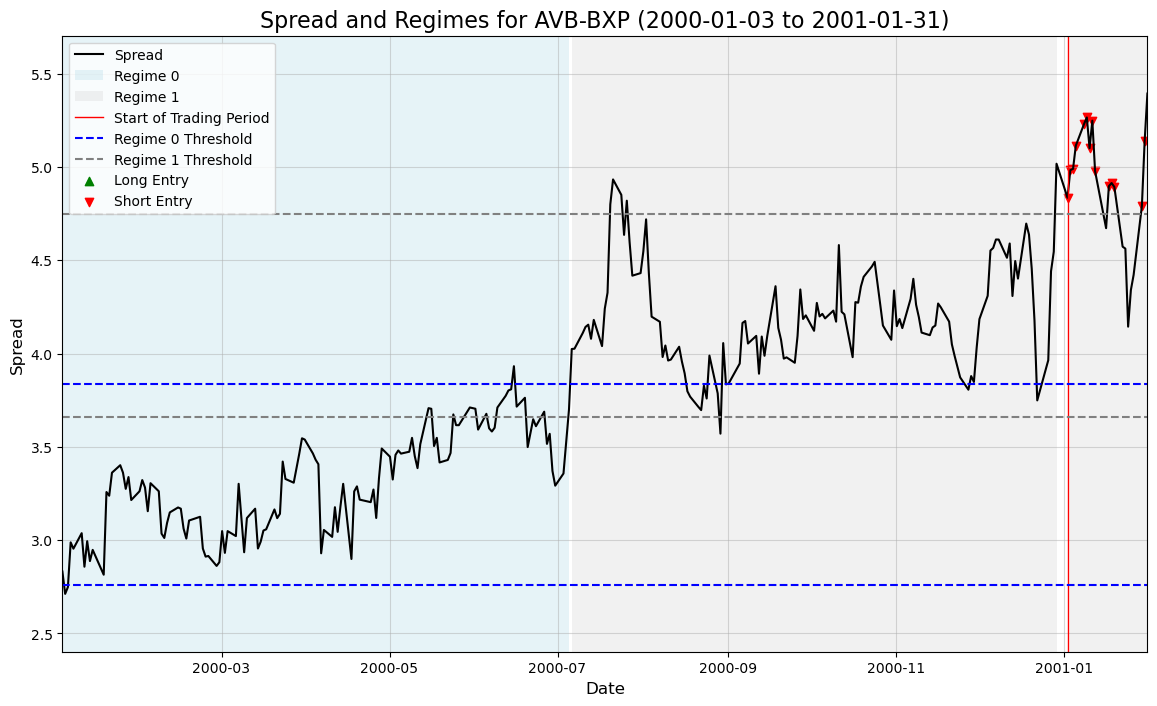

Entering short spread at spread 4.834916114807127
Closing short spread at spread 4.672022819519043
Entering short spread at spread 4.8966798782348615
Closing short spread at spread 4.5730695724487305
Entering short spread at spread 4.7920026779174805
Closing short spread at spread 5.393301963806152
Results for AVB-BXP: Cumulative Returns=-0.114796
----------Formation period: 2000-02-02 05:00:00+00:00 to 2001-01-31 05:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: CPT & REG
Fitting HMM...
Transition probabilities: p_11=0.9896, p_22=0.9818
Calculating regime statistics...
Regime Means: {0: 2.099885340181657, 1: 2.6847333261522195}
Regime Stds: {0: 0.17367862381209398, 1: 0.2028002622667631}
---Trading period: 2001-02-01 05:00:00+00:00 to 2001-03-02 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread 2.802739143371582
Closing short spread at spread 2.7169885635375977
Results for CPT-REG: Cumulative Returns=0.085

Model is not converging.  Current: 859.3464803457045 is not greater than 859.3505601164278. Delta is -0.004079770723251386


    Found 1 valid pairs.
Processing pair: GOOGL & GOOG
Fitting HMM...
Transition probabilities: p_11=1.0000, p_22=0.0000
Calculating regime statistics...
Regime Means: {0: 0.04459976105101079, 1: 0.0627670288085973}
Regime Stds: {0: 0.007471557463969827, 1: nan}
---Trading period: 2009-07-11 04:00:00+00:00 to 2009-08-09 04:00:00+00:00---
Generating trading signals...
Results for GOOGL-GOOG: Cumulative Returns=0.000000
----------Formation period: 2008-08-11 04:00:00+00:00 to 2009-08-10 04:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: GOOGL & GOOG
Fitting HMM...
Transition probabilities: p_11=1.0000, p_22=0.0000
Calculating regime statistics...
Regime Means: {0: 0.04418102143302795}
Regime Stds: {0: 0.006799801289820294}
---Trading period: 2009-08-11 04:00:00+00:00 to 2009-09-09 04:00:00+00:00---
Generating trading signals...
Results for GOOGL-GOOG: Cumulative Returns=0.000000
----------Formation period: 2008-09-10 04:00:00+00:00 to 2009

Model is not converging.  Current: 688.9152800908636 is not greater than 688.9377500345652. Delta is -0.022469943701594275


    Found 1 valid pairs.
Processing pair: GOOGL & GOOG
Fitting HMM...
Transition probabilities: p_11=0.9106, p_22=0.0011
Calculating regime statistics...
Regime Means: {0: 0.11316367069563558, 1: 0.09659957885742188}
Regime Stds: {0: 0.015421908938007586, 1: nan}
---Trading period: 2014-03-14 04:00:00+00:00 to 2014-04-12 04:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.1788616180419922
Closing short spread at spread 0.1966400146484375
Entering short spread at spread 0.20539474487304688
Closing short spread at spread 0.22111129760742188
Results for GOOGL-GOOG: Cumulative Returns=-0.033495
----------Formation period: 2013-04-15 04:00:00+00:00 to 2014-04-14 04:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: GOOGL & GOOG
Fitting HMM...
Transition probabilities: p_11=0.9959, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 0.11544403543277677, 1: 0.30753684043884366}
Regime Stds: {0: 0.0160587101

Model is not converging.  Current: 288.07561368122555 is not greater than 288.07818031289355. Delta is -0.002566631668003083


    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9901, p_22=0.9388
Calculating regime statistics...
Regime Means: {0: 0.33462562936867435, 1: 0.06885680373834144}
Regime Stds: {0: 0.07303230474710537, 1: 0.06409316279276275}
---Trading period: 2014-12-11 05:00:00+00:00 to 2015-01-09 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.45218658447265625
Closing short spread at spread 0.31981658935546875
Entering short spread at spread 0.5233840942382795
Closing short spread at spread 0.4607057571411115
Entering short spread at spread 0.5044384002685565
Closing short spread at spread 0.39059638977050604
Entering short spread at spread 0.4965028762817383
Closing short spread at spread 0.43426036834716797
Results for NWSA-NWS: Cumulative Returns=0.371133
----------Formation period: 2014-01-13 05:00:00+00:00 to 2015-01-12 05:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Process

Model is not converging.  Current: 294.5886837413462 is not greater than 294.5891081917183. Delta is -0.0004244503721224646


    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9726, p_22=0.9783
Calculating regime statistics...
Regime Means: {0: 0.18644454415920575, 1: 0.39454276956242634}
Regime Stds: {0: 0.08945117249547228, 1: 0.05512993570397591}
---Trading period: 2015-05-14 04:00:00+00:00 to 2015-06-12 04:00:00+00:00---
Generating trading signals...
Results for NWSA-NWS: Cumulative Returns=0.000000
----------Formation period: 2014-06-13 04:00:00+00:00 to 2015-06-12 04:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9763, p_22=0.9837
Calculating regime statistics...
Regime Means: {0: 0.39821188468632734, 1: 0.18419996643066414}
Regime Stds: {0: 0.05588302872828751, 1: 0.08290605521535599}
---Trading period: 2015-06-13 04:00:00+00:00 to 2015-07-12 04:00:00+00:00---
Generating trading signals...
Entering long spread at spread 0.10008907318115234
Closi

Model is not converging.  Current: 187.0847019532426 is not greater than 187.08575428555102. Delta is -0.001052332308432824


    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9943, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 0.2727880806758486, 1: -0.15615726128602647}
Regime Stds: {0: 0.13174743604183073, 1: 0.08053357132045172}
---Trading period: 2015-12-11 05:00:00+00:00 to 2016-01-09 05:00:00+00:00---
Generating trading signals...
Entering long spread at spread -0.3342418670654297
Closing long spread at spread -0.4129724502563459
Results for NWSA-NWS: Cumulative Returns=-0.078731
----------Formation period: 2015-01-13 05:00:00+00:00 to 2016-01-12 05:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9935, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 0.24918902154062308, 1: -0.21931634768091074}
Regime Stds: {0: 0.12067585689450584, 1: 0.14635581449579746}
---Trading period: 2016-01-13 05:00:00+00:00 to 2016-02-11 0

Model is not converging.  Current: 332.5482279084241 is not greater than 332.55013666704457. Delta is -0.001908758620459139


    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9365, p_22=0.9454
Calculating regime statistics...
Regime Means: {0: -0.3873138023635087, 1: -0.21276292585788809}
Regime Stds: {0: 0.06900842492094998, 1: 0.04489961413120855}
---Trading period: 2019-01-12 05:00:00+00:00 to 2019-02-10 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread -0.1606435775756836
Closing short spread at spread -0.13269138336181818
Entering short spread at spread -0.12340354919433594
Closing short spread at spread -0.151608467102049
Entering short spread at spread -0.10506725311279297
Closing short spread at spread -0.1425790786743164
Entering short spread at spread -0.11429882049560902
Closing short spread at spread -0.2075214385986328
Results for NWSA-NWS: Cumulative Returns=0.130987
----------Formation period: 2018-02-13 05:00:00+00:00 to 2019-02-12 05:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.

Model is not converging.  Current: 370.8486909260233 is not greater than 370.8546479016982. Delta is -0.0059569756748487634


    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9775, p_22=0.9712
Calculating regime statistics...
Regime Means: {0: -0.2935990414149327, 1: -0.1611439153688762}
Regime Stds: {0: 0.06278050043644096, 1: 0.038150520873073926}
---Trading period: 2023-08-16 04:00:00+00:00 to 2023-09-14 04:00:00+00:00---
Generating trading signals...
Entering long spread at spread -0.4829902648925817
Closing long spread at spread -0.4136829376220703
Entering long spread at spread -0.4334373474121094
Closing long spread at spread -0.6708164215087891
Results for NWSA-NWS: Cumulative Returns=-0.168072
----------Formation period: 2022-09-15 04:00:00+00:00 to 2023-09-14 04:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9827, p_22=0.9584
Calculating regime statistics...
Regime Means: {0: -0.19171350851826285, 1: -0.3893459369609886}
Regime Stds: {0: 0.0

Model is not converging.  Current: 224.9058755532204 is not greater than 224.90708293338395. Delta is -0.0012073801635494874


    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9949, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: -0.22994892524950447, 1: -0.7310468565742921}
Regime Stds: {0: 0.09658839313638623, 1: 0.0973859461140721}
---Trading period: 2023-11-14 05:00:00+00:00 to 2023-12-13 05:00:00+00:00---
Generating trading signals...
Entering long spread at spread -0.9091968536376953
Closing long spread at spread -0.8992977142333984
Entering long spread at spread -0.9293422698974609
Closing long spread at spread -1.0982913970947266
Results for NWSA-NWS: Cumulative Returns=-0.159050
----------Formation period: 2022-12-14 05:00:00+00:00 to 2023-12-13 05:00:00+00:00----------
Calculating SSD for top pairs...
    Found 1 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9936, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: -0.1971025588406119, 1: -0.7254057539270278}
Regime Stds: {0: 0.066

pair          formation_period            trading_period  \
0     (AVB, BXP)  (2000-01-03, 2001-01-01)  (2001-01-02, 2001-01-31)   
1     (CPT, REG)  (2000-02-02, 2001-01-31)  (2001-02-01, 2001-03-02)   
2     (CPT, EQR)  (2000-03-03, 2001-03-02)  (2001-03-03, 2001-04-01)   
3      (NUE, WY)  (2000-04-03, 2001-04-02)  (2001-04-03, 2001-05-02)   
4     (CPT, EQR)  (2000-05-03, 2001-05-02)  (2001-05-03, 2001-06-01)   
..           ...                       ...                       ...   
275  (NWSA, NWS)  (2022-12-14, 2023-12-13)  (2023-12-14, 2024-01-12)   
276  (NWSA, NWS)  (2023-01-17, 2024-01-16)  (2024-01-17, 2024-02-15)   
277  (NWSA, NWS)  (2023-02-15, 2024-02-14)  (2024-02-15, 2024-03-15)   
278  (NWSA, NWS)  (2023-03-17, 2024-03-15)  (2024-03-16, 2024-04-14)   
279  (NWSA, NWS)  (2023-04-18, 2024-04-16)  (2024-04-17, 2024-05-16)   

     cumulative_returns  
0             -0.114796  
1              0.085751  
2             -0.118715  
3              0.093164  
4              0.210027  
..                  ...  
275            0.059429  
276            0.019827  
277            0.000071  
278           -0.000204  
279            0.019949  

[280 rows x 4 columns]

In [146]:
# THIS MODEL FITS TO DATA THAT FINDS TOP 1 SSD PAIRS 1 YEAR + 1 MONTH SHIFT + 1 MONTH TRADE
all_results = pairs_trading_pipeline_ssd(price_df, normalized_prices)
cumulative_df = pd.DataFrame(all_results)

# Save results to a CSV for further analysis
cumulative_df.to_csv("results/ssd_hmm/2000_2024_1mo_top1.csv", index=False)
print("\nDetailed results saved to '2000_2024_1mo_top1.csv'.")

cumulative_df

Starting pairs trading pipeline...
----------Formation period: 2000-01-03 05:00:00+00:00 to 2001-01-01 05:00:00+00:00----------
Calculating SSD for top pairs...
    Found 5 valid pairs.
Processing pair: AVB & BXP
Fitting HMM...
Transition probabilities: p_11=0.9922, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 3.2991047725081444, 1: 4.202856086915539}
Regime Stds: {0: 0.27548023859631515, 1: 0.27729678093560617}
---Trading period: 2001-01-02 05:00:00+00:00 to 2001-01-31 05:00:00+00:00---
Generating trading signals...


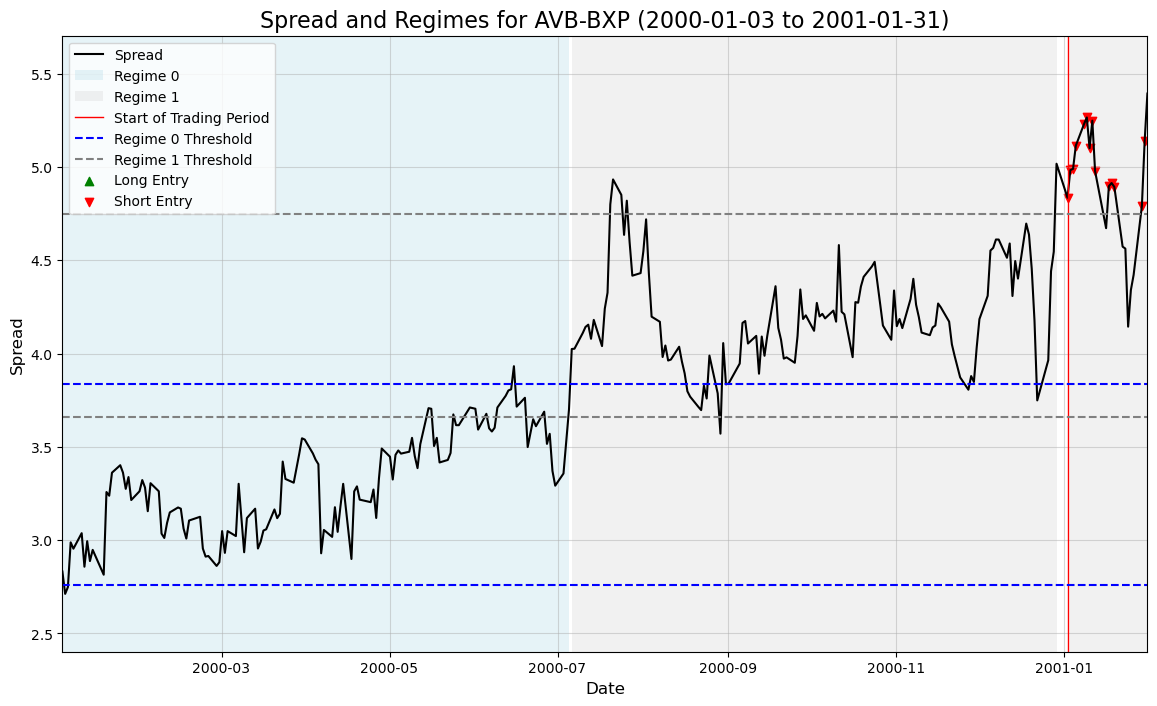

Entering short spread at spread 4.834916114807127
Closing short spread at spread 4.672022819519043
Entering short spread at spread 4.8966798782348615
Closing short spread at spread 4.5730695724487305
Entering short spread at spread 4.7920026779174805
Closing short spread at spread 5.393301963806152
Results for AVB-BXP: Cumulative Returns=-0.114796
Processing pair: CPT & REG
Fitting HMM...
Transition probabilities: p_11=0.9618, p_22=0.9464
Calculating regime statistics...
Regime Means: {0: 2.009551890991019, 1: 2.417597539963261}
Regime Stds: {0: 0.13915500033766878, 1: 0.2131433011296322}
---Trading period: 2001-01-02 05:00:00+00:00 to 2001-01-31 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread 2.8064260482788104
Closing short spread at spread 2.7896795272827166
Entering short spread at spread 2.981539249420166
Closing short spread at spread 2.7890071868896467
Entering short spread at spread 2.8495130538940447
Closing short spread at spread 2.821064949035

Model is not converging.  Current: 52.51909152813148 is not greater than 52.51914311566122. Delta is -5.158752973954961e-05


Transition probabilities: p_11=1.0000, p_22=0.9846
Calculating regime statistics...
Regime Means: {0: -5.714230714634778, 1: -4.983663078454825}
Regime Stds: {0: 0.20609023805108626, 1: 0.16130489532808417}
---Trading period: 2001-04-03 04:00:00+00:00 to 2001-05-02 04:00:00+00:00---
Generating trading signals...
Entering long spread at spread -5.71531867980957
Closing long spread at spread -5.752302646636963
Entering short spread at spread -5.304183006286621
Closing short spread at spread -5.398796558380127
Results for KIM-PLD: Cumulative Returns=0.057630
Processing pair: CAT & MAS
Fitting HMM...
Transition probabilities: p_11=0.8886, p_22=0.0200
Calculating regime statistics...
Regime Means: {0: -0.05600110278186576, 1: -0.37747669219970525}
Regime Stds: {0: 0.5436515156336255, 1: nan}
---Trading period: 2001-04-03 04:00:00+00:00 to 2001-05-02 04:00:00+00:00---
Generating trading signals...
Entering short spread at spread 1.1789464950561523
Closing short spread at spread 1.52912521362

Model is not converging.  Current: 859.3464803457045 is not greater than 859.3505601164278. Delta is -0.004079770723251386


    Found 5 valid pairs.
Processing pair: GOOGL & GOOG
Fitting HMM...
Transition probabilities: p_11=1.0000, p_22=0.0000
Calculating regime statistics...
Regime Means: {0: 0.04459976105101079, 1: 0.0627670288085973}
Regime Stds: {0: 0.007471557463969827, 1: nan}
---Trading period: 2009-07-11 04:00:00+00:00 to 2009-08-09 04:00:00+00:00---
Generating trading signals...
Results for GOOGL-GOOG: Cumulative Returns=0.000000
Processing pair: IPG & TER
Fitting HMM...
Transition probabilities: p_11=0.9798, p_22=0.9866
Calculating regime statistics...
Regime Means: {0: -1.309307297070821, 1: -2.7192687638600668}
Regime Stds: {0: 0.31507853677038367, 1: 0.6128263549353659}
---Trading period: 2009-07-11 04:00:00+00:00 to 2009-08-09 04:00:00+00:00---
Generating trading signals...
Entering long spread at spread -4.105046987533569
Closing long spread at spread -3.798346996307373
Entering long spread at spread -3.9555110931396484
Closing long spread at spread -3.735885858535766
Results for IPG-TER: Cu

Model is not converging.  Current: -341.9992878804476 is not greater than -341.9992878583578. Delta is -2.208980731666088e-08


    Found 5 valid pairs.
Processing pair: GOOGL & GOOG
Fitting HMM...
Transition probabilities: p_11=1.0000, p_22=0.0000
Calculating regime statistics...
Regime Means: {0: 0.07908686447143544}
Regime Stds: {0: 0.008222404577096266}
---Trading period: 2013-03-12 04:00:00+00:00 to 2013-04-10 04:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.09731292724609375
Closing short spread at spread 0.09498405456542969
Entering short spread at spread 0.09539794921875
Closing short spread at spread 0.09519958496094105
Entering short spread at spread 0.09553146362304688
Closing short spread at spread 0.09438133239746449
Entering short spread at spread 0.09560203552246094
Closing short spread at spread 0.09479522705078125
Results for GOOGL-GOOG: Cumulative Returns=0.004484
Processing pair: AKAM & C
Fitting HMM...
Transition probabilities: p_11=0.9627, p_22=0.9627
Calculating regime statistics...
Regime Means: {0: 10.942420439286666, 1: 8.898330565861293}
Regime Stds: {0

Model is not converging.  Current: 688.9152800908636 is not greater than 688.9377500345652. Delta is -0.022469943701594275


    Found 5 valid pairs.
Processing pair: GOOGL & GOOG
Fitting HMM...
Transition probabilities: p_11=0.9106, p_22=0.0011
Calculating regime statistics...
Regime Means: {0: 0.11316367069563558, 1: 0.09659957885742188}
Regime Stds: {0: 0.015421908938007586, 1: nan}
---Trading period: 2014-03-14 04:00:00+00:00 to 2014-04-12 04:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.1788616180419922
Closing short spread at spread 0.1966400146484375
Entering short spread at spread 0.20539474487304688
Closing short spread at spread 0.22111129760742188
Results for GOOGL-GOOG: Cumulative Returns=-0.033495
Processing pair: IPG & VRSN
Fitting HMM...
Transition probabilities: p_11=0.9934, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: -37.30180476359184, 1: -45.10731876486599}
Regime Stds: {0: 1.6139212240027565, 1: 2.5056236282995448}
---Trading period: 2014-03-14 04:00:00+00:00 to 2014-04-12 04:00:00+00:00---
Generating trading signals...
Entering long spr

Model is not converging.  Current: 288.07561368122555 is not greater than 288.07818031289355. Delta is -0.002566631668003083


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9901, p_22=0.9388
Calculating regime statistics...
Regime Means: {0: 0.33462562936867435, 1: 0.06885680373834144}
Regime Stds: {0: 0.07303230474710537, 1: 0.06409316279276275}
---Trading period: 2014-12-11 05:00:00+00:00 to 2015-01-09 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.45218658447265625
Closing short spread at spread 0.31981658935546875
Entering short spread at spread 0.5233840942382795
Closing short spread at spread 0.4607057571411115
Entering short spread at spread 0.5044384002685565
Closing short spread at spread 0.39059638977050604
Entering short spread at spread 0.4965028762817383
Closing short spread at spread 0.43426036834716797
Results for NWSA-NWS: Cumulative Returns=0.371133
Processing pair: AKAM & C
Fitting HMM...
Transition probabilities: p_11=0.9663, p_22=0.9874
Calculating regime statistics...
Regime Means: {0: 13.040494511636

Model is not converging.  Current: 294.5886837413462 is not greater than 294.5891081917183. Delta is -0.0004244503721224646


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9726, p_22=0.9783
Calculating regime statistics...
Regime Means: {0: 0.18644454415920575, 1: 0.39454276956242634}
Regime Stds: {0: 0.08945117249547228, 1: 0.05512993570397591}
---Trading period: 2015-05-14 04:00:00+00:00 to 2015-06-12 04:00:00+00:00---
Generating trading signals...
Results for NWSA-NWS: Cumulative Returns=0.000000
Processing pair: AKAM & C
Fitting HMM...
Transition probabilities: p_11=0.9947, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 20.987993512834823, 1: 31.93621141948397}
Regime Stds: {0: 2.376397100641582, 1: 2.009171327527899}
---Trading period: 2015-05-14 04:00:00+00:00 to 2015-06-12 04:00:00+00:00---
Generating trading signals...
Entering short spread at spread 36.517234802246094
Closing short spread at spread 34.89781188964844
Results for AKAM-C: Cumulative Returns=1.619423
Processing pair: CSCO & EQIX
Fitting HMM...
Transition probabilities

Model is not converging.  Current: 187.0847019532426 is not greater than 187.08575428555102. Delta is -0.001052332308432824


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9943, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 0.2727880806758486, 1: -0.15615726128602647}
Regime Stds: {0: 0.13174743604183073, 1: 0.08053357132045172}
---Trading period: 2015-12-11 05:00:00+00:00 to 2016-01-09 05:00:00+00:00---
Generating trading signals...
Entering long spread at spread -0.3342418670654297
Closing long spread at spread -0.4129724502563459
Results for NWSA-NWS: Cumulative Returns=-0.078731
Processing pair: IPG & MSI
Fitting HMM...
Transition probabilities: p_11=0.9796, p_22=0.9801
Calculating regime statistics...
Regime Means: {0: -38.03694015944085, 1: -43.75163939339774}
Regime Stds: {0: 2.128781239894924, 1: 1.3769890991054416}
---Trading period: 2015-12-11 05:00:00+00:00 to 2016-01-09 05:00:00+00:00---
Generating trading signals...
Entering long spread at spread -43.5085973739624
Closing long spread at spread -43.04404640197754
Results for I

Model is not converging.  Current: 113.2423729609268 is not greater than 113.24484645760519. Delta is -0.0024734966783910295


    Found 5 valid pairs.
Processing pair: AKAM & C
Fitting HMM...
Transition probabilities: p_11=0.9877, p_22=0.9886
Calculating regime statistics...
Regime Means: {0: 28.654895571843248, 1: 14.719330369756463}
Regime Stds: {0: 4.498768524723503, 1: 2.403796051559054}
---Trading period: 2016-05-13 04:00:00+00:00 to 2016-06-11 04:00:00+00:00---
Generating trading signals...
Entering long spread at spread 17.31842803955078
Closing long spread at spread 18.157642364501953
Entering short spread at spread 19.808631896972656
Closing short spread at spread 18.950550079345703
Results for AKAM-C: Cumulative Returns=1.697296
Processing pair: IPG & MSI
Fitting HMM...
Transition probabilities: p_11=1.0000, p_22=0.9824
Calculating regime statistics...
Regime Means: {0: -44.16919532189002, 1: -36.01842818343849}
Regime Stds: {0: 3.2640381873684383, 1: 0.4243481959779113}
---Trading period: 2016-05-13 04:00:00+00:00 to 2016-06-11 04:00:00+00:00---
Generating trading signals...
Results for IPG-MSI: Cu

Model is not converging.  Current: 332.5482279084241 is not greater than 332.55013666704457. Delta is -0.001908758620459139


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9365, p_22=0.9454
Calculating regime statistics...
Regime Means: {0: -0.3873138023635087, 1: -0.21276292585788809}
Regime Stds: {0: 0.06900842492094998, 1: 0.04489961413120855}
---Trading period: 2019-01-12 05:00:00+00:00 to 2019-02-10 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread -0.1606435775756836
Closing short spread at spread -0.13269138336181818
Entering short spread at spread -0.12340354919433594
Closing short spread at spread -0.151608467102049
Entering short spread at spread -0.10506725311279297
Closing short spread at spread -0.1425790786743164
Entering short spread at spread -0.11429882049560902
Closing short spread at spread -0.2075214385986328
Results for NWSA-NWS: Cumulative Returns=0.130987
Processing pair: IPG & JNPR
Fitting HMM...
Transition probabilities: p_11=0.9748, p_22=0.9882
Calculating regime statistics...
Regime Means: {0: -3.08

Model is not converging.  Current: 351.0041347865942 is not greater than 351.0060078851872. Delta is -0.0018730985930233146


    Found 5 valid pairs.
Processing pair: AKAM & C
Fitting HMM...
Transition probabilities: p_11=0.9947, p_22=0.9838
Calculating regime statistics...
Regime Means: {0: 22.041271689050486, 1: 34.12732471403528}
Regime Stds: {0: 3.4753354986872864, 1: 2.0505476373797973}
---Trading period: 2020-01-15 05:00:00+00:00 to 2020-02-13 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread 28.887130737304688
Closing short spread at spread 28.277961730957045
Entering short spread at spread 28.926101684570327
Closing short spread at spread 30.4987335205078
Results for AKAM-C: Cumulative Returns=-0.963463
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9942, p_22=0.9726
Calculating regime statistics...
Regime Means: {0: -0.32696145267809834, 1: -0.1282703399658199}
Regime Stds: {0: 0.0597999329167857, 1: 0.051162546325762524}
---Trading period: 2020-01-15 05:00:00+00:00 to 2020-02-13 05:00:00+00:00---
Generating trading signals...
Entering long 

Model is not converging.  Current: 104.21412729486944 is not greater than 104.21459923266762. Delta is -0.0004719377981814432


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9760, p_22=0.9847
Calculating regime statistics...
Regime Means: {0: -0.31451288859049475, 1: -0.009584862088400396}
Regime Stds: {0: 0.07079342944815037, 1: 0.10582714656189153}
---Trading period: 2020-10-14 04:00:00+00:00 to 2020-11-12 04:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.052896499633787286
Closing short spread at spread 0.07223510742187678
Results for NWSA-NWS: Cumulative Returns=-0.019339
Processing pair: FOXA & FOX
Fitting HMM...
Transition probabilities: p_11=0.9943, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 0.6816059567711572, 1: 0.0439437565050628}
Regime Stds: {0: 0.2022134181584908, 1: 0.08731881390899207}
---Trading period: 2020-10-14 04:00:00+00:00 to 2020-11-12 04:00:00+00:00---
Generating trading signals...
Entering long spread at spread -0.07238578796386719
Closing long spread at spread -0.10455703735351562

Model is not converging.  Current: 86.25496266144026 is not greater than 86.25651136657542. Delta is -0.0015487051351641412


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9868, p_22=0.9714
Calculating regime statistics...
Regime Means: {0: -0.0011804833704113279, 1: -0.3089469728015718}
Regime Stds: {0: 0.10526021138332492, 1: 0.06715523706649441}
---Trading period: 2020-11-12 05:00:00+00:00 to 2020-12-11 05:00:00+00:00---
Generating trading signals...
Results for NWSA-NWS: Cumulative Returns=0.000000
Processing pair: FOXA & FOX
Fitting HMM...
Transition probabilities: p_11=0.9940, p_22=0.9880
Calculating regime statistics...
Regime Means: {0: 0.6458584147797534, 1: 0.036086944212396506}
Regime Stds: {0: 0.22067420207152208, 1: 0.09192838321464489}
---Trading period: 2020-11-12 05:00:00+00:00 to 2020-12-11 05:00:00+00:00---
Generating trading signals...
Results for FOXA-FOX: Cumulative Returns=0.000000
Processing pair: F & IPG
Fitting HMM...
Transition probabilities: p_11=0.9941, p_22=0.9876
Calculating regime statistics...
Regime Means: {0: -9.345540911

Model is not converging.  Current: 122.98177181570803 is not greater than 122.98334775418562. Delta is -0.0015759384775861918


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9716, p_22=0.9937
Calculating regime statistics...
Regime Means: {0: -0.27731768290201825, 1: 0.024690862429343933}
Regime Stds: {0: 0.0887939168056952, 1: 0.12278499072105242}
---Trading period: 2021-01-14 05:00:00+00:00 to 2021-02-12 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.3403587341308594
Closing short spread at spread 0.1946392059326172
Results for NWSA-NWS: Cumulative Returns=0.145720
Processing pair: FOXA & FOX
Fitting HMM...
Transition probabilities: p_11=0.9940, p_22=0.9880
Calculating regime statistics...
Regime Means: {0: 0.558621795925163, 1: 0.036086944212396506}
Regime Stds: {0: 0.17736324029258485, 1: 0.09192838321464489}
---Trading period: 2021-01-14 05:00:00+00:00 to 2021-02-12 05:00:00+00:00---
Generating trading signals...
Entering short spread at spread 1.0103149414062536
Closing short spread at spread 1.2137393951416016
Resul

Model is not converging.  Current: 370.8486909260233 is not greater than 370.8546479016982. Delta is -0.0059569756748487634


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9775, p_22=0.9712
Calculating regime statistics...
Regime Means: {0: -0.2935990414149327, 1: -0.1611439153688762}
Regime Stds: {0: 0.06278050043644096, 1: 0.038150520873073926}
---Trading period: 2023-08-16 04:00:00+00:00 to 2023-09-14 04:00:00+00:00---
Generating trading signals...
Entering long spread at spread -0.4829902648925817
Closing long spread at spread -0.4136829376220703
Entering long spread at spread -0.4334373474121094
Closing long spread at spread -0.6708164215087891
Results for NWSA-NWS: Cumulative Returns=-0.168072
Processing pair: AKAM & C
Fitting HMM...
Transition probabilities: p_11=0.9755, p_22=0.9689
Calculating regime statistics...
Regime Means: {0: 38.47848303222656, 1: 46.76871145339239}
Regime Stds: {0: 7.276905789056434, 1: 2.097468605444505}
---Trading period: 2023-08-16 04:00:00+00:00 to 2023-09-14 04:00:00+00:00---
Generating trading signals...
Entering shor

Model is not converging.  Current: 224.9058755532204 is not greater than 224.90708293338395. Delta is -0.0012073801635494874


    Found 5 valid pairs.
Processing pair: NWSA & NWS
Fitting HMM...
Transition probabilities: p_11=0.9949, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: -0.22994892524950447, 1: -0.7310468565742921}
Regime Stds: {0: 0.09658839313638623, 1: 0.0973859461140721}
---Trading period: 2023-11-14 05:00:00+00:00 to 2023-12-13 05:00:00+00:00---
Generating trading signals...
Entering long spread at spread -0.9091968536376953
Closing long spread at spread -0.8992977142333984
Entering long spread at spread -0.9293422698974609
Closing long spread at spread -1.0982913970947266
Results for NWSA-NWS: Cumulative Returns=-0.159050
Processing pair: JNPR & KHC
Fitting HMM...
Transition probabilities: p_11=0.9803, p_22=0.9676
Calculating regime statistics...
Regime Means: {0: -4.575457918643951, 1: -7.222659729339264}
Regime Stds: {0: 0.8864586996312493, 1: 1.2035779556327673}
---Trading period: 2023-11-14 05:00:00+00:00 to 2023-12-13 05:00:00+00:00---
Generating trading signals...
Results 

pair          formation_period            trading_period  \
0      (AVB, BXP)  (2000-01-03, 2001-01-01)  (2001-01-02, 2001-01-31)   
1      (CPT, REG)  (2000-01-03, 2001-01-01)  (2001-01-02, 2001-01-31)   
2      (CPT, EQR)  (2000-01-03, 2001-01-01)  (2001-01-02, 2001-01-31)   
3      (KIM, PLD)  (2000-01-03, 2001-01-01)  (2001-01-02, 2001-01-31)   
4      (ARE, CPT)  (2000-01-03, 2001-01-01)  (2001-01-02, 2001-01-31)   
...           ...                       ...                       ...   
1395  (NWSA, NWS)  (2023-04-18, 2024-04-16)  (2024-04-17, 2024-05-16)   
1396   (AES, KHC)  (2023-04-18, 2024-04-16)  (2024-04-17, 2024-05-16)   
1397  (JNPR, KHC)  (2023-04-18, 2024-04-16)  (2024-04-17, 2024-05-16)   
1398     (F, IPG)  (2023-04-18, 2024-04-16)  (2024-04-17, 2024-05-16)   
1399    (F, FOXA)  (2023-04-18, 2024-04-16)  (2024-04-17, 2024-05-16)   

      cumulative_returns  
0              -0.114796  
1               0.237727  
2              -0.075233  
3               0.077879  
4               0.120270  
...                  ...  
1395            0.019949  
1396            0.227637  
1397            3.080006  
1398            0.097063  
1399            0.000000  

[1400 rows x 4 columns]

In [147]:
# THIS MODEL FITS TO DATA THAT FINDS TOP 5 SSD PAIRS 1 YEAR + 1 MONTH SHIFT + 1 MONTH TRADE
all_results = pairs_trading_pipeline_ssd(price_df, normalized_prices, top_n_pairs=5)
cumulative_df = pd.DataFrame(all_results)

# Save results to a CSV for further analysis
cumulative_df.to_csv("results/ssd_hmm/2000_2024_1mo_top5.csv", index=False)
print("\nDetailed results saved to '2000_2024_1mo_top5.csv'.")

cumulative_df

### Distance Method + 2-State HMM Model on Cointegrated Pairs
Same fitting methods, but trading on top 20 cointegrated pairs every 6 months. 

In [ ]:
def extract_date(filename):
        """
        Extracts the formation end date from the pairs_file name and determines the start date for trading.
        """
        formation_start = filename.split("_")[1]
        formation_end = filename.split("_")[2]  # Assuming "pairs_STARTDATE_ENDDATE.csv"
        formation_end_date = datetime.strptime(formation_end.split(".csv")[0], "%Y-%m-%d")
        formation_end_date = pd.to_datetime(formation_end_date, utc=True)
        formation_start_date = pd.to_datetime(formation_start, utc=True)
        return formation_start_date, formation_end_date

# Step 5: Pairs Trading Pipeline
def pairs_trading_pipeline_coint(prices_data, formation_window=365, trading_window=30, step=21, top_n_pairs=1, risk_free_rate=0.05 / 252):
    """
    Main pipeline for pairs trading with HMM-based regime detection.
    """
    print("Starting pairs trading pipeline...")
    all_results = []

    # extract all coint clustering files from data
    # Specify the folder containing the CSV files
    data_folder = 'data/coint_pairs'  # Change this to your actual folder path

    # Initialize the list for filenames
    filenames = []

    # Loop through the files in the folder
    for file in os.listdir(data_folder):
        if file.endswith('.csv'):
            filenames.append(file)
    
    filenames.sort()

    i = 0 
    for filename in filenames:
        formation_start_date, formation_end_date = extract_date(filename)
        trading_start_date = formation_end_date + pd.Timedelta(days=1)
        trading_horizon = pd.Timedelta(days=trading_window)
        trading_end_date = trading_start_date + trading_horizon
        trading_end_date = pd.to_datetime(trading_end_date, utc=True)
        pairs = pd.read_csv('data/coint_pairs/'+filename)

        formation_data = prices_data.loc[formation_start_date:formation_end_date]
        trading_data = prices_data.loc[trading_start_date:trading_end_date]
        print(f"---------------------------Formation period: {formation_start_date} to {formation_end_date}---------------------------")


        for _, row in pairs.iterrows():
            stock1, stock2 = row["Asset 1"], row["Asset 2"]
            print(f"---Processing pair: {stock1} & {stock2}---")
            formation_spread = formation_data[stock1] - formation_data[stock2]
            trading_spread = trading_data[stock1] - trading_data[stock2]

            # Check for NaN values in the spread
            if formation_spread.isna().any():
                nan_locations = formation_spread[formation_spread.isna()].index
                print(f"NaN values detected in spread for pair {stock1}-{stock2}. Locations: {nan_locations}")
                raise ValueError(f"NaN detected in spread for pair {stock1}-{stock2}. Please clean the data.")

            # Step 1: Fit HMM
            hmm_model, regimes = fit_hmm(formation_spread.values)

            # Plot the HMM-fitted regimes on the spread
            # plot_hmm_regimes(formation_spread, regimes, formation_start_date, formation_end_date, stock1, stock2)

            # Calculate mean and standard deviation for each regime
            print("Calculating regime statistics...")
            regime_means = {regime: formation_spread[regimes == regime].mean() for regime in np.unique(regimes)}
            regime_stds = {regime: formation_spread[regimes == regime].std() for regime in np.unique(regimes)}

            print(f"Regime Means: {regime_means}")
            print(f"Regime Stds: {regime_stds}")

            # Step 2: Predict Regimes for the Trading Period
            print(f"---Trading period: {trading_start_date} to {trading_end_date}---")
            predicted_states = hmm_model.predict(trading_spread.values.reshape(-1, 1))
            # print("predicted states:", predicted_states)

            # Step 3: Generate Trading Signals
            signals = generate_signals_distance_method(
                trading_spread.values, regime_means, regime_stds, predicted_states
            )

            # Plot combined regimes and trading signals
            if i % 300 == 0: # only plot every 300 trading periods
                plot_combined_regimes_and_signals(
                    formation_spread=formation_spread,
                    formation_regimes=regimes,
                    trading_spread=trading_spread,
                    trading_signals=signals,
                    predicted_states=predicted_states,
                    regime_means=regime_means,
                    regime_stds=regime_stds,
                    start_date=formation_start_date,
                    end_date=trading_end_date,
                    stock1=stock1,
                    stock2=stock2
                )

            # Step 4: Backtest Strategy
            results = evaluate_strategy_v2(
                prices_data.loc[trading_start_date:trading_end_date], signals, (stock1, stock2)
            )
            # backtest_results = backtest_strategy(trading_spread, signals)

            # Collect results
            all_results.append({
                "pair": (stock1, stock2),
                "formation_period": (formation_start_date.date(), formation_end_date.date()),
                "trading_period": (trading_start_date.date(), trading_end_date.date()),
                "cumulative_returns": results["Cumulative_Returns"].iloc[-1],
            })

            print(f"Results for {stock1}-{stock2}: Cumulative Returns={results['Cumulative_Returns'].iloc[-1]:.6f}")

            i += 1

    # Calculate and report overall cumulative results
    print("\nPipeline completed. Reporting cumulative results...\n")
    cumulative_df = pd.DataFrame(all_results)

    # Calculate aggregate metrics
    total_cumulative_returns = cumulative_df["cumulative_returns"].sum()
    average_return_per_pair = cumulative_df["cumulative_returns"].mean()
    total_pairs_evaluated = len(cumulative_df["pair"].unique())
    total_windows_evaluated = len(cumulative_df)

    # Print summary
    print("Cumulative Results Summary:")
    print(f"  Total Cumulative Returns: {total_cumulative_returns:.6f}")
    print(f"  Average Return per Pair: {average_return_per_pair:.6f}")
    print(f"  Total Pairs Evaluated: {total_pairs_evaluated}")
    print(f"  Total Windows Evaluated: {total_windows_evaluated}")
            
    return all_results

Starting pairs trading pipeline...
---------------------------Formation period: 2000-01-04 00:00:00+00:00 to 2000-09-11 00:00:00+00:00---------------------------
---Processing pair: CPT & REG---
Fitting HMM...
Transition probabilities: p_11=0.9267, p_22=0.9446
Calculating regime statistics...
Regime Means: {0: 2.2401254106970394, 1: 1.974446796235584}
Regime Stds: {0: 0.0996636939391727, 1: 0.1232885680853414}
---Trading period: 2000-09-12 00:00:00+00:00 to 2000-10-12 00:00:00+00:00---
Generating trading signals...


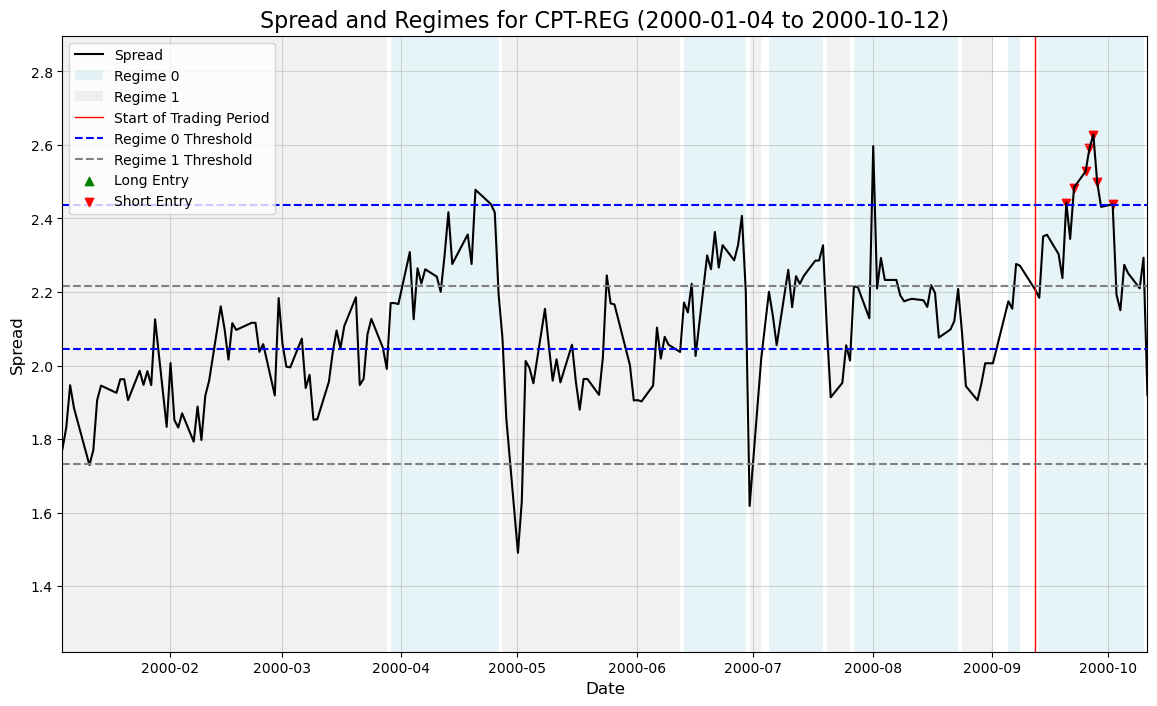

Entering short spread at spread 2.4429869651794416
Closing short spread at spread 2.3443236351013184
Entering short spread at spread 2.4841723442077637
Closing short spread at spread 2.431568622589113
Entering short spread at spread 2.4385128021240234
Closing short spread at spread 2.192563056945801
Results for CPT-REG: Cumulative Returns=0.397217
---Processing pair: EQR & REG---
Fitting HMM...
Transition probabilities: p_11=0.9370, p_22=0.8857
Calculating regime statistics...
Regime Means: {0: -0.0036877341892408598, 1: -0.23501947830463277}
Regime Stds: {0: 0.09183540790944408, 1: 0.1182411376601475}
---Trading period: 2000-09-12 00:00:00+00:00 to 2000-10-12 00:00:00+00:00---
Generating trading signals...
Entering short spread at spread 0.19192075729370028
Closing short spread at spread 0.12591075897216797
Entering short spread at spread 0.20333003997802734
Closing short spread at spread 0.07846879959106445
Results for EQR-REG: Cumulative Returns=0.190871
---Processing pair: BXP & RE

Model is not converging.  Current: 87.26661058825644 is not greater than 87.26891894804315. Delta is -0.002308359786709957


Transition probabilities: p_11=0.9934, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: -23.855419324024727, 1: -19.6526451587677}
Regime Stds: {0: 1.022243830444082, 1: 1.3390624769276593}
---Trading period: 2004-02-24 00:00:00+00:00 to 2004-03-25 00:00:00+00:00---
Generating trading signals...
Entering short spread at spread -18.619789123535156
Closing short spread at spread -19.075451850891113
Entering short spread at spread -16.56873893737793
Closing short spread at spread -17.107648849487305
Entering short spread at spread -15.64953327178955
Closing short spread at spread -14.565558433532715
Results for AXON-MS: Cumulative Returns=-0.089402
---Processing pair: WYNN & BXP---
Fitting HMM...
Transition probabilities: p_11=0.9807, p_22=0.9851
Calculating regime statistics...
Regime Means: {0: -7.75754333459414, 1: -4.247889574836282}
Regime Stds: {0: 0.40498240771004285, 1: 1.2846537138499303}
---Trading period: 2004-02-24 00:00:00+00:00 to 2004-03-25 00:00:00+00:00---
G

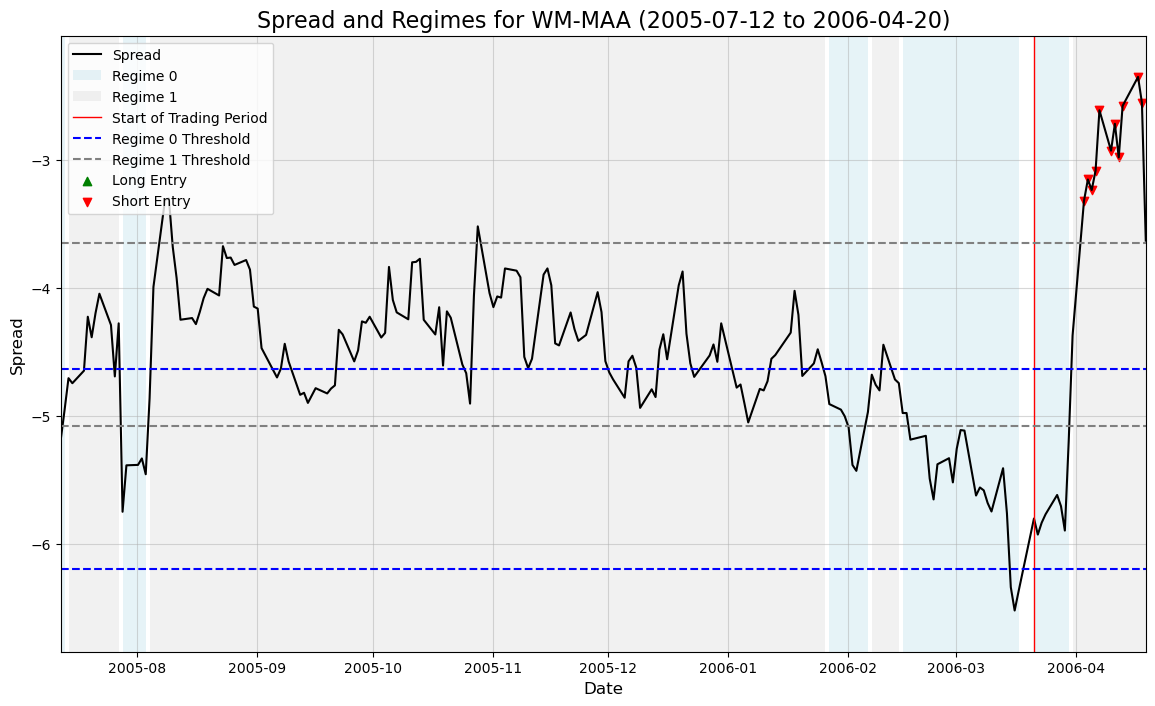

Entering short spread at spread -3.321563720703125
Closing short spread at spread -3.6332263946533203
Results for WM-MAA: Cumulative Returns=0.311663
---Processing pair: BEN & IT---
Fitting HMM...
Transition probabilities: p_11=0.9121, p_22=0.9400
Calculating regime statistics...
Regime Means: {0: 3.966302002177519, 1: 4.53893180120559}
Regime Stds: {0: 0.22302947214474947, 1: 0.24120212488559167}
---Trading period: 2006-03-21 00:00:00+00:00 to 2006-04-20 00:00:00+00:00---
Generating trading signals...
Results for BEN-IT: Cumulative Returns=0.000000
---------------------------Formation period: 2005-11-15 00:00:00+00:00 to 2006-07-24 00:00:00+00:00---------------------------
---Processing pair: GOOGL & GOOG---
Fitting HMM...
Transition probabilities: p_11=1.0000, p_22=0.0000
Calculating regime statistics...
Regime Means: {0: 0.04690466986762157}
Regime Stds: {0: 0.003510915964319701}
---Trading period: 2006-07-25 00:00:00+00:00 to 2006-08-24 00:00:00+00:00---
Generating trading signals.

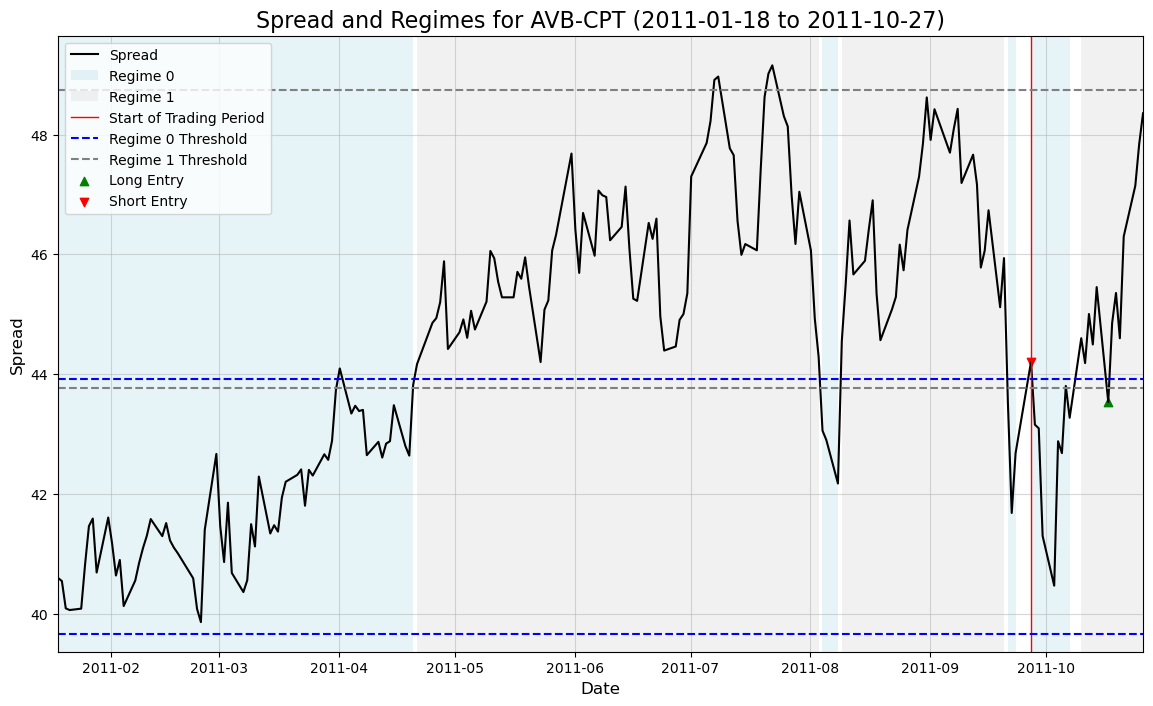

Entering short spread at spread 44.2073860168457
Closing short spread at spread 43.15574645996094
Entering long spread at spread 43.53329849243164
Closing long spread at spread 44.8531494140625
Results for AVB-CPT: Cumulative Returns=2.371490
---Processing pair: IVZ & NTRS---
Fitting HMM...
Transition probabilities: p_11=0.9929, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: -20.31285528455462, 1: -15.724391179926256}
Regime Stds: {0: 1.3084556484153365, 1: 0.5405430629578089}
---Trading period: 2011-09-27 00:00:00+00:00 to 2011-10-27 00:00:00+00:00---
Generating trading signals...
Entering short spread at spread -15.599879264831543
Closing short spread at spread -15.436168670654297
Entering long spread at spread -16.82298469543457
Closing long spread at spread -17.039109230041504
Results for IVZ-NTRS: Cumulative Returns=-0.379835
---Processing pair: MMM & IEX---
Fitting HMM...
Transition probabilities: p_11=0.9209, p_22=0.9517
Calculating regime statistics...
Regime Me

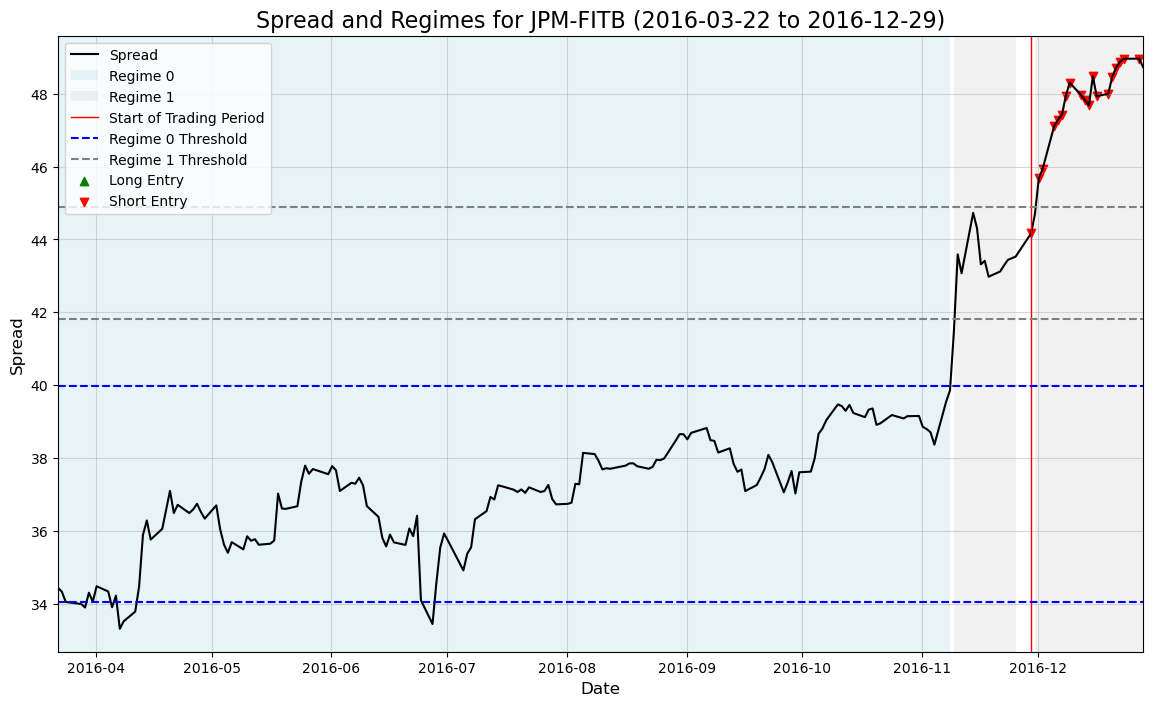

Entering short spread at spread 44.16478729248047
Closing short spread at spread 44.69255065917969
Entering short spread at spread 45.67538261413574
Closing short spread at spread 48.731149673461914
Results for JPM-FITB: Cumulative Returns=-3.583530
---Processing pair: PWR & CSX---
Fitting HMM...
Transition probabilities: p_11=0.9923, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 15.66018314579971, 1: 19.3016886822013}
Regime Stds: {0: 0.9480007398740302, 1: 1.287980697010783}
---Trading period: 2016-11-29 00:00:00+00:00 to 2016-12-29 00:00:00+00:00---
Generating trading signals...
Entering short spread at spread 21.364697456359863
Closing short spread at spread 22.873106956481934
Results for PWR-CSX: Cumulative Returns=-1.508410
---Processing pair: JPM & RJF---
Fitting HMM...
Transition probabilities: p_11=0.9586, p_22=0.9719
Calculating regime statistics...
Regime Means: {0: 20.14200414930071, 1: 19.08592903007895}
Regime Stds: {0: 0.706206134504839, 1: 0.36694574248

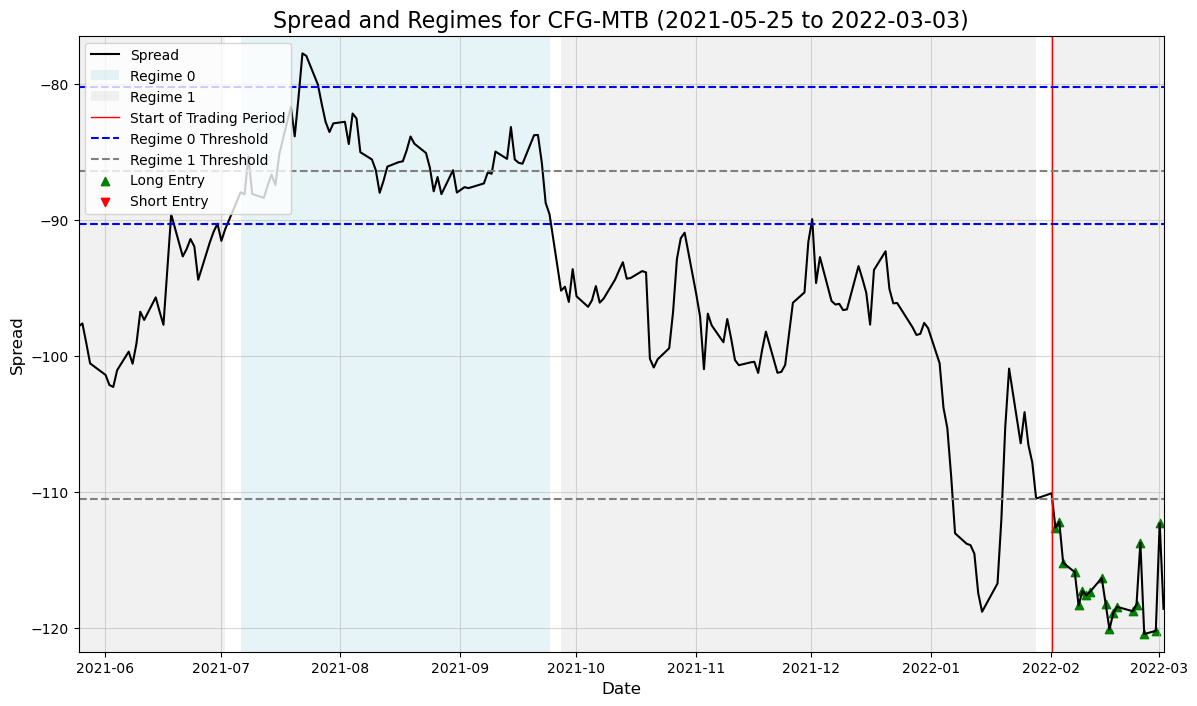

Entering long spread at spread -112.61982727050781
Closing long spread at spread -118.58904266357422
Results for CFG-MTB: Cumulative Returns=-5.969215
---Processing pair: MSI & WM---
Fitting HMM...
Transition probabilities: p_11=0.8692, p_22=0.0185
Calculating regime statistics...
Regime Means: {0: 83.58295709687161}
Regime Stds: {0: 9.228125344919611}
---Trading period: 2022-02-01 00:00:00+00:00 to 2022-03-03 00:00:00+00:00---
Generating trading signals...
Results for MSI-WM: Cumulative Returns=0.000000
---Processing pair: ORLY & MAA---
Fitting HMM...
Transition probabilities: p_11=0.9808, p_22=0.9843
Calculating regime statistics...
Regime Means: {0: 423.034185500372, 1: 472.8448769064511}
Regime Stds: {0: 21.54845435931526, 1: 14.26650359699716}
---Trading period: 2022-02-01 00:00:00+00:00 to 2022-03-03 00:00:00+00:00---
Generating trading signals...
Entering short spread at spread 471.54017639160156
Closing short spread at spread 480.84425354003906
Entering long spread at spread 44

pair          formation_period            trading_period  \
0      (CPT, REG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2000-10-12)   
1      (EQR, REG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2000-10-12)   
2      (BXP, REG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2000-10-12)   
3       (BK, AJG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2000-10-12)   
4       (AJG, EG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2000-10-12)   
...           ...                       ...                       ...   
1370  (DXCM, REG)  (2024-02-27, 2024-11-04)  (2024-11-05, 2024-12-05)   
1371   (ICE, KIM)  (2024-02-27, 2024-11-04)  (2024-11-05, 2024-12-05)   
1372   (HWM, SRE)  (2024-02-27, 2024-11-04)  (2024-11-05, 2024-12-05)   
1373   (MMM, PNW)  (2024-02-27, 2024-11-04)  (2024-11-05, 2024-12-05)   
1374    (MCO, MO)  (2024-02-27, 2024-11-04)  (2024-11-05, 2024-12-05)   

      cumulative_returns  
0               0.397217  
1               0.190871  
2               0.548814  
3               2.404180  
4               2.012115  
...                  ...  
1370           -0.519997  
1371            6.122793  
1372            8.630646  
1373           -0.230843  
1374            1.158108  

[1375 rows x 4 columns]

In [ ]:
# THIS MODEL FITS TO DATA THAT FINDS TOP 20 COINTEGRATED PAIRS ACROSS 1 YEAR + 6 MONTH SHIFT + 1 MONTH TRADE (so 5 month gap between trading periods)
all_results = pairs_trading_pipeline_coint(price_df)
cumulative_df = pd.DataFrame(all_results)

# Save results to a CSV for further analysis
cumulative_df.to_csv("results/coint_hmm/2000_2024_1mo_top20.csv", index=False)
print("\nDetailed results saved to '2000_2024_1mo_top20.csv'.")

cumulative_df

Starting pairs trading pipeline...
---------------------------Formation period: 2000-01-04 00:00:00+00:00 to 2000-09-11 00:00:00+00:00---------------------------
---Processing pair: CPT & REG---
Fitting HMM...
Transition probabilities: p_11=0.9267, p_22=0.9446
Calculating regime statistics...
Regime Means: {0: 2.2401254106970394, 1: 1.974446796235584}
Regime Stds: {0: 0.0996636939391727, 1: 0.1232885680853414}
---Trading period: 2000-09-12 00:00:00+00:00 to 2001-03-11 00:00:00+00:00---
Generating trading signals...


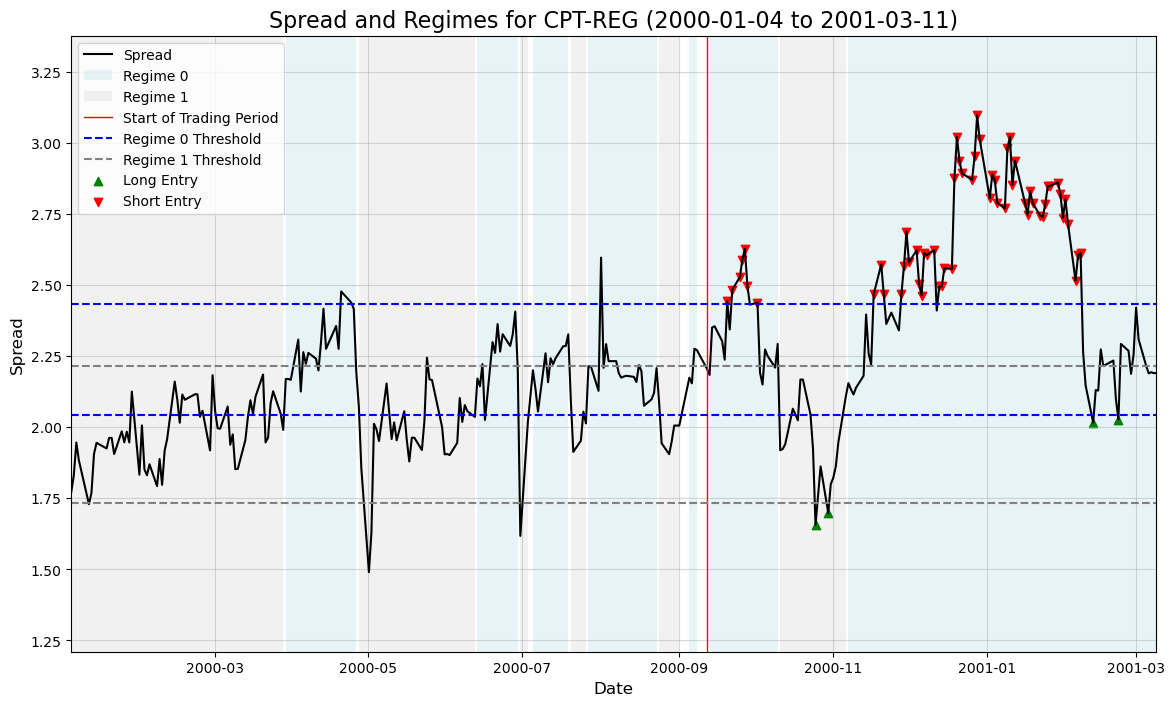

Entering short spread at spread 2.4429869651794416
Closing short spread at spread 2.3443236351013184
Entering short spread at spread 2.4841723442077637
Closing short spread at spread 2.431568622589113
Entering short spread at spread 2.4385128021240234
Closing short spread at spread 2.192563056945801
Entering long spread at spread 1.656761646270752
Closing long spread at spread 1.7580900192260742
Entering long spread at spread 1.698333740234375
Closing long spread at spread 1.8002381324768066
Entering short spread at spread 2.46821928024292
Closing short spread at spread 2.363640308380127
Entering short spread at spread 2.4692749977111834
Closing short spread at spread 2.4109621047973633
Entering short spread at spread 2.496096611022949
Closing short spread at spread 2.2652511596679688
Entering long spread at spread 2.016733169555664
Closing long spread at spread 2.1312007904052734
Entering long spread at spread 2.027444839477539
Closing long spread at spread 2.2933874130249023
Results 

Model is not converging.  Current: 87.26661058825644 is not greater than 87.26891894804315. Delta is -0.002308359786709957


Transition probabilities: p_11=0.8783, p_22=0.8732
Calculating regime statistics...
Regime Means: {0: -8.722856754480405, 1: -9.232929633645451}
Regime Stds: {0: 0.1439909553387531, 1: 0.2384342961315262}
---Trading period: 2004-06-29 00:00:00+00:00 to 2004-12-26 00:00:00+00:00---
Generating trading signals...
Entering long spread at spread -9.202035903930664
Closing long spread at spread -9.240338325500492
Entering short spread at spread -8.09079265594482
Closing short spread at spread -8.479963302612305
Entering short spread at spread -8.400304794311523
Closing short spread at spread -8.491503715515137
Entering short spread at spread -8.065647125244139
Closing short spread at spread -6.090197563171385
Results for VLO-EL: Cumulative Returns=-1.533382
---Processing pair: SRE & IRM---
Fitting HMM...
Transition probabilities: p_11=0.8892, p_22=0.9314
Calculating regime statistics...
Regime Means: {0: 0.8008969391093534, 1: 0.5208312562368449}
Regime Stds: {0: 0.09878540712208185, 1: 0.10

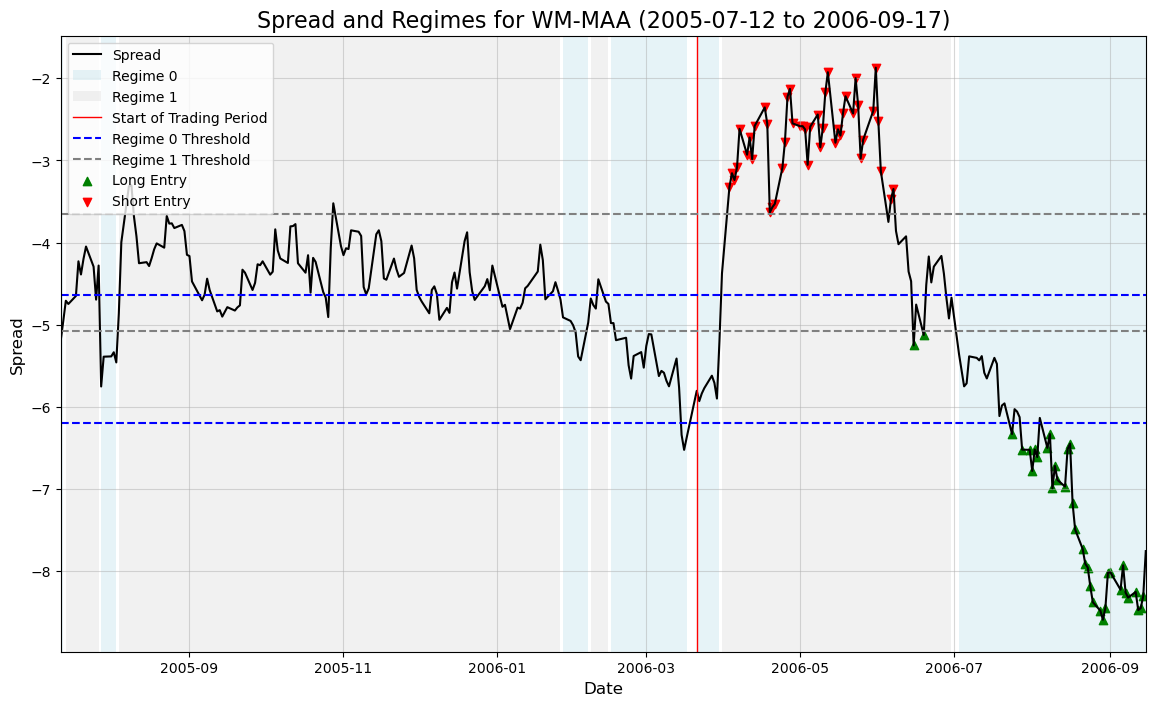

Entering short spread at spread -3.321563720703125
Closing short spread at spread -3.7478771209716832
Entering short spread at spread -3.4740314483642543
Closing short spread at spread -3.8575916290283203
Entering long spread at spread -5.2515258789062464
Closing long spread at spread -4.754680633544922
Entering long spread at spread -5.124284744262695
Closing long spread at spread -4.514736175537109
Entering long spread at spread -6.330221176147461
Closing long spread at spread -6.027721405029297
Entering long spread at spread -6.520526885986328
Closing long spread at spread -6.134525299072266
Entering long spread at spread -6.499019622802734
Closing long spread at spread -7.755659103393551
Results for WM-MAA: Cumulative Returns=1.348129
---Processing pair: BEN & IT---
Fitting HMM...
Transition probabilities: p_11=0.9121, p_22=0.9400
Calculating regime statistics...
Regime Means: {0: 3.966302002177519, 1: 4.53893180120559}
Regime Stds: {0: 0.22302947214474947, 1: 0.24120212488559167}


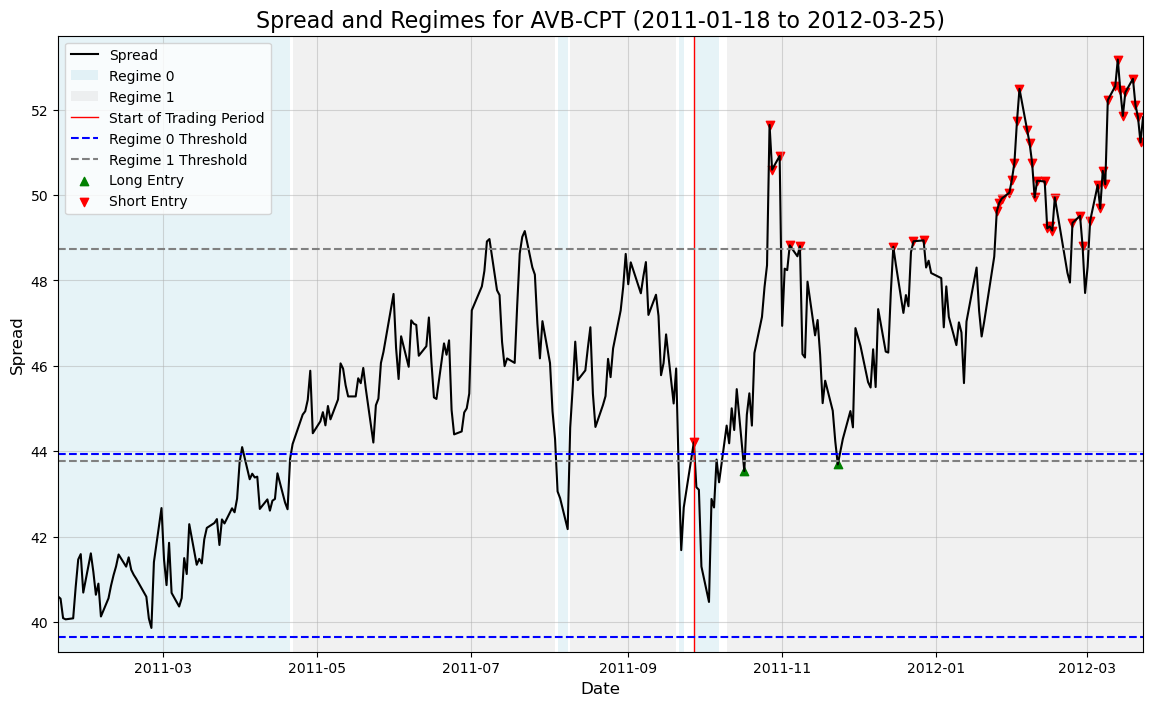

Entering short spread at spread 44.2073860168457
Closing short spread at spread 43.15574645996094
Entering long spread at spread 43.53329849243164
Closing long spread at spread 44.8531494140625
Entering short spread at spread 51.64200210571289
Closing short spread at spread 46.93504333496094
Entering short spread at spread 48.82041931152344
Closing short spread at spread 48.56496810913086
Entering short spread at spread 48.800048828125
Closing short spread at spread 46.27349090576172
Entering long spread at spread 43.689453125
Closing long spread at spread 44.285987854003906
Entering short spread at spread 48.78693771362305
Closing short spread at spread 48.374000549316406
Entering short spread at spread 48.91657638549805
Closing short spread at spread 48.30171203613281
Entering short spread at spread 49.61887741088867
Closing short spread at spread 48.534263610839844
Entering short spread at spread 49.346935272216804
Closing short spread at spread 47.7049674987793
Entering short sprea

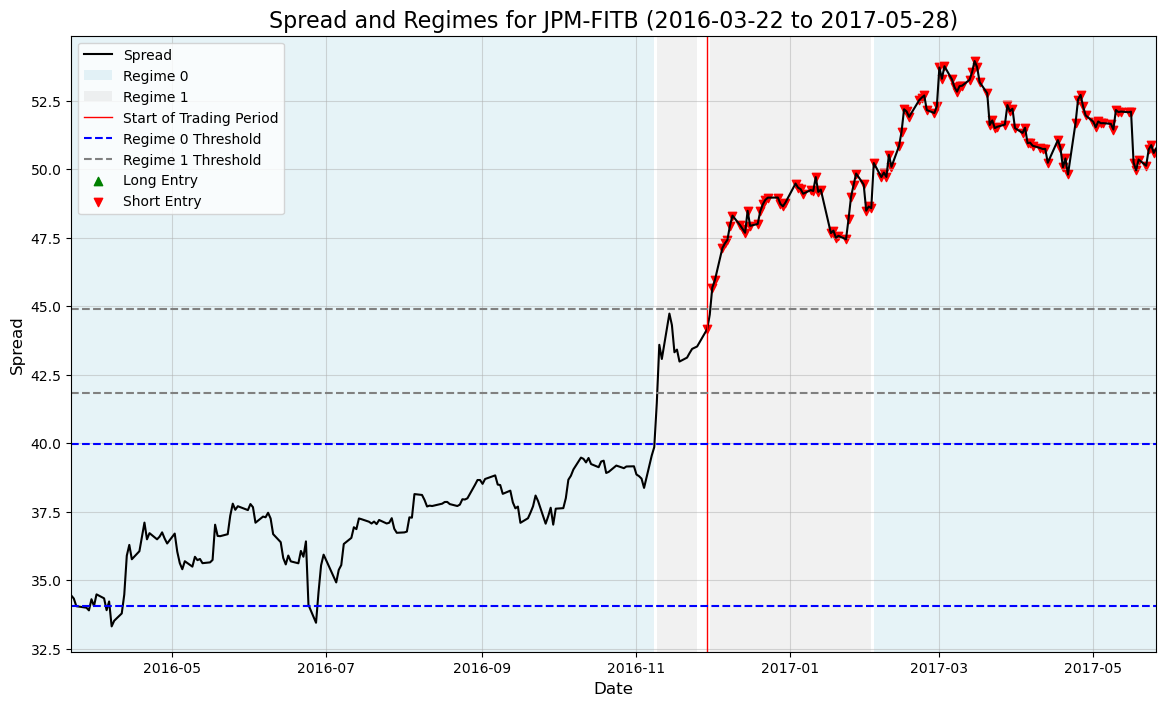

Entering short spread at spread 44.16478729248047
Closing short spread at spread 44.69255065917969
Entering short spread at spread 45.67538261413574
Closing short spread at spread 50.761606216430664
Results for JPM-FITB: Cumulative Returns=-5.613987
---Processing pair: PWR & CSX---
Fitting HMM...
Transition probabilities: p_11=0.9923, p_22=1.0000
Calculating regime statistics...
Regime Means: {0: 15.66018314579971, 1: 19.3016886822013}
Regime Stds: {0: 0.9480007398740302, 1: 1.287980697010783}
---Trading period: 2016-11-29 00:00:00+00:00 to 2017-05-28 00:00:00+00:00---
Generating trading signals...
Entering short spread at spread 21.364697456359863
Closing short spread at spread 20.229522705078125
Entering short spread at spread 22.764127731323242
Closing short spread at spread 21.656317710876465
Entering short spread at spread 21.938488960266113
Closing short spread at spread 21.53438377380371
Entering short spread at spread 21.965288162231452
Closing short spread at spread 21.7659978

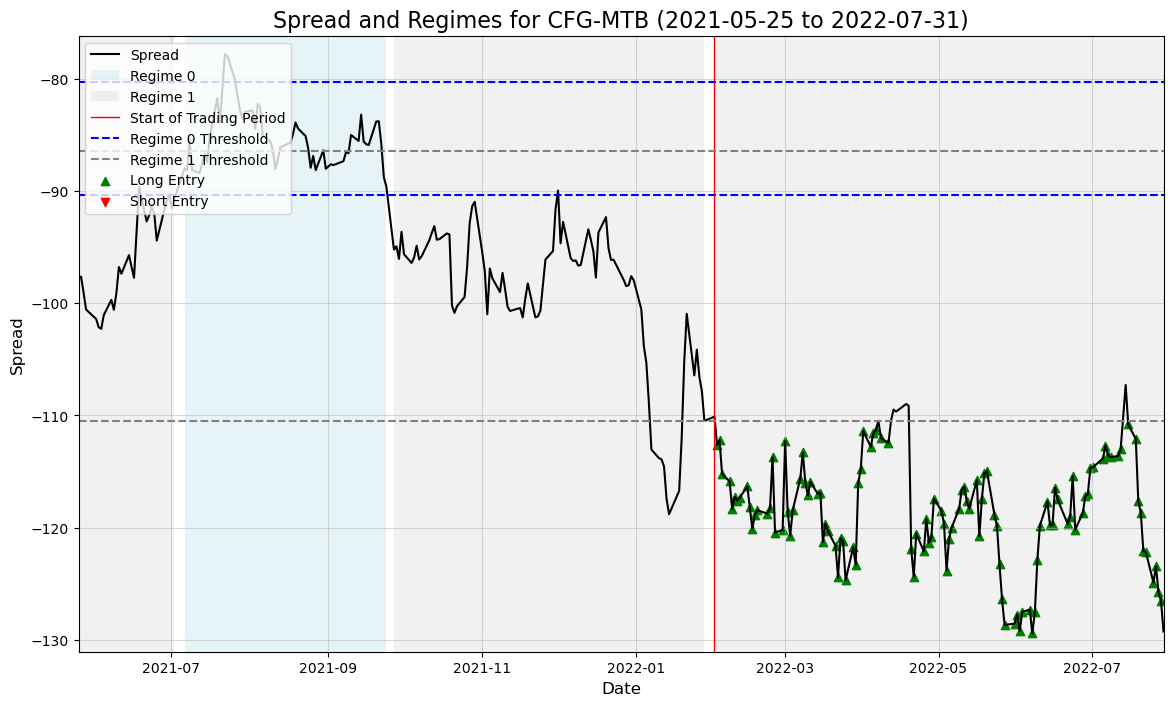

Entering long spread at spread -112.61982727050781
Closing long spread at spread -110.47690963745117
Entering long spread at spread -112.01515579223633
Closing long spread at spread -110.468994140625
Entering long spread at spread -121.93206405639648
Closing long spread at spread -110.14856719970703
Entering long spread at spread -110.80013656616211
Closing long spread at spread -129.2615966796875
Results for CFG-MTB: Cumulative Returns=-2.988884
---Processing pair: MSI & WM---
Fitting HMM...
Transition probabilities: p_11=0.8692, p_22=0.0185
Calculating regime statistics...
Regime Means: {0: 83.58295709687161}
Regime Stds: {0: 9.228125344919611}
---Trading period: 2022-02-01 00:00:00+00:00 to 2022-07-31 00:00:00+00:00---
Generating trading signals...
Entering long spread at spread 64.98004150390625
Closing long spread at spread 65.84780883789062
Entering long spread at spread 64.88050842285156
Closing long spread at spread 69.9927978515625
Entering long spread at spread 55.53758239746

pair          formation_period            trading_period  \
0      (CPT, REG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2001-03-11)   
1      (EQR, REG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2001-03-11)   
2      (BXP, REG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2001-03-11)   
3       (BK, AJG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2001-03-11)   
4       (AJG, EG)  (2000-01-04, 2000-09-11)  (2000-09-12, 2001-03-11)   
...           ...                       ...                       ...   
1370  (DXCM, REG)  (2024-02-27, 2024-11-04)  (2024-11-05, 2025-05-04)   
1371   (ICE, KIM)  (2024-02-27, 2024-11-04)  (2024-11-05, 2025-05-04)   
1372   (HWM, SRE)  (2024-02-27, 2024-11-04)  (2024-11-05, 2025-05-04)   
1373   (MMM, PNW)  (2024-02-27, 2024-11-04)  (2024-11-05, 2025-05-04)   
1374    (MCO, MO)  (2024-02-27, 2024-11-04)  (2024-11-05, 2025-05-04)   

      cumulative_returns  
0               1.374597  
1               1.902317  
2               1.411101  
3               6.024442  
4              -9.105423  
...                  ...  
1370            1.530006  
1371            5.812778  
1372            9.130646  
1373           -0.230843  
1374            1.158108  

[1375 rows x 4 columns]

In [130]:
# THIS MODEL FITS TO DATA THAT FINDS COINTEGRATED PAIRS ACROSS 1 YEAR + 6 MONTH SHIFT + 6 MONTH TRADE (so no gap between trading periods)
all_results = pairs_trading_pipeline_coint(price_df, trading_window=30*6)

# Calculate and report overall cumulative results
print("\nPipeline completed. Reporting cumulative results...\n")
cumulative_df = pd.DataFrame(all_results)

# Calculate aggregate metrics
total_cumulative_returns = cumulative_df["cumulative_returns"].sum()
average_return_per_pair = cumulative_df["cumulative_returns"].mean()
total_pairs_evaluated = len(cumulative_df["pair"].unique())
total_windows_evaluated = len(cumulative_df)

# Print summary
print("Cumulative Results Summary:")
print(f"  Total Cumulative Returns: {total_cumulative_returns:.6f}")
print(f"  Average Return per Pair: {average_return_per_pair:.6f}")
print(f"  Total Pairs Evaluated: {total_pairs_evaluated}")
print(f"  Total Windows Evaluated: {total_windows_evaluated}")

# Save results to a CSV for further analysis
cumulative_df.to_csv("results/coint_hmm/2000_2024_6mo.csv", index=False)
print("\nDetailed results saved to '2000_2024_6mo.csv'.")

cumulative_df